<a href="https://colab.research.google.com/github/niteesh19mt0250/Retail-sales-Prediction-Regression-Project/blob/main/Retail_Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Pridiction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


In [ ]:
min(max(False,-3,-4), 2,7)

False

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/niteesh19mt0250/Retail-sales-Prediction-Regression-Project/blob/main/Sample_ML_Submission_Template.ipynb

# **Problem Statement**


**Rossmann operates over 3000 drug stores in 7 European countries currently, Rossmann store manager are tasked with predicting their daily sale for upto six weeks in advance. Store promotions, competition, school and state holidays seasonality, and locality. With thousand of individual managers predicting sales based their unique circumstances, the accuracy of the result can be quite varied. You can provided with historical sales data, for 1115 Rossmann stores. The task to be forecast the "sales" column for the test set. Note that some store in the dataset ware tamporarily close to refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing missingo library which helps us to visualize the missing values
import missingno as msn

from datetime import datetime as dt
# code to see the execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

# Import  VIF factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 18.1 s (started: 2023-06-06 14:50:36 +00:00)


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.74 s (started: 2023-06-06 14:50:54 +00:00)


In [ ]:
file_path1 = '/content/drive/MyDrive/AlmaBetter Project1/store (1).csv'

time: 606 µs (started: 2023-06-06 14:50:58 +00:00)


In [ ]:
file_path2 = '/content/drive/MyDrive/AlmaBetter Project1/Rossmann Stores Data (1).csv'

time: 645 µs (started: 2023-06-06 14:50:58 +00:00)


In [ ]:
store = pd.read_csv(file_path1)

time: 20.5 ms (started: 2023-06-06 14:50:58 +00:00)


In [ ]:
rossmann_store = pd.read_csv(file_path2)

time: 854 ms (started: 2023-06-06 14:50:58 +00:00)


<ipython-input-104-883ed80aaf7a>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_store = pd.read_csv(file_path2)


### Dataset First View

In [ ]:
rossmann_store.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

time: 17.2 ms (started: 2023-06-06 14:50:59 +00:00)


In [ ]:
# Dataset First Look
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

time: 16.7 ms (started: 2023-06-06 14:50:59 +00:00)


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of rows are {rossmann_store.shape[0]} and columns are {rossmann_store.shape[1]} present in the Rossmann stores dateset.')
print(f'Number of rows are {store.shape[0]} and columns are {store.shape[1]} present in the store dateset.')

Number of rows are 1017209 and columns are 9 present in the Rossmann stores dateset.
Number of rows are 1115 and columns are 10 present in the store dateset.
time: 2.75 ms (started: 2023-06-06 14:50:59 +00:00)


### Dataset Information

In [ ]:
# Dataset Info
print('-'*80)
print(rossmann_store.info())
print('-'*80)
print(store.info())

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------ 

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Number of duplicate vale in store datasets = ',store.duplicated().sum(),'\n','Number of duplicate value in Rossmann store datasets = ',rossmann_store.duplicated().sum())

Number of duplicate vale in store datasets =  0 
 Number of duplicate value in Rossmann store datasets =  0
time: 279 ms (started: 2023-06-06 14:50:59 +00:00)


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count of Rossmann store dataset
rossmann_store.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

time: 294 ms (started: 2023-06-06 14:51:00 +00:00)


In [ ]:
# Missing Values/Null Values Count of store dataset
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

time: 10.7 ms (started: 2023-06-06 14:51:00 +00:00)


<Axes: >

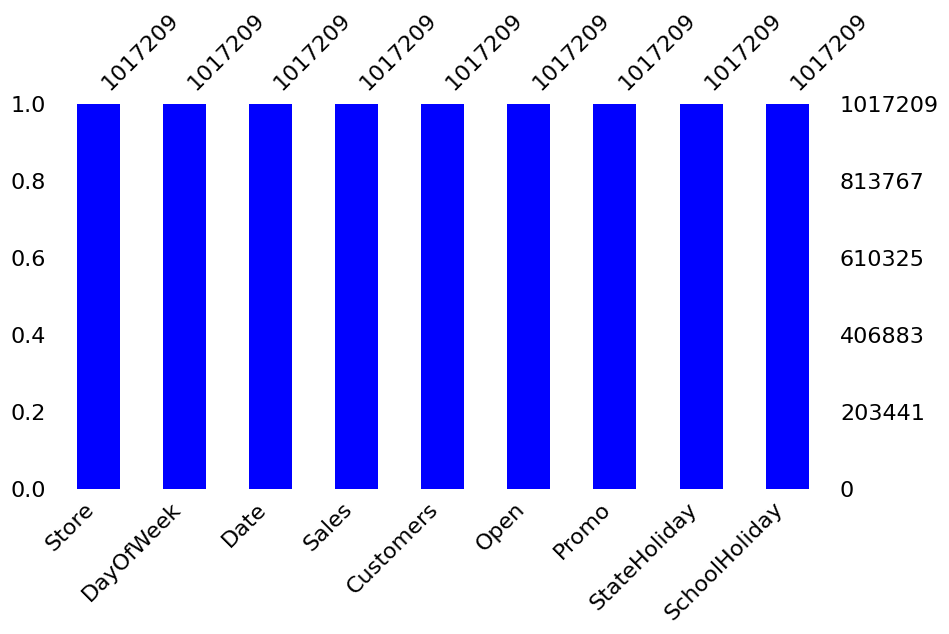

time: 1.61 s (started: 2023-06-06 14:51:00 +00:00)


In [ ]:
# Visualizing the missing values of Rossmann store dataset
msn.bar(rossmann_store,figsize = (10,5),color = 'blue')

<Axes: >

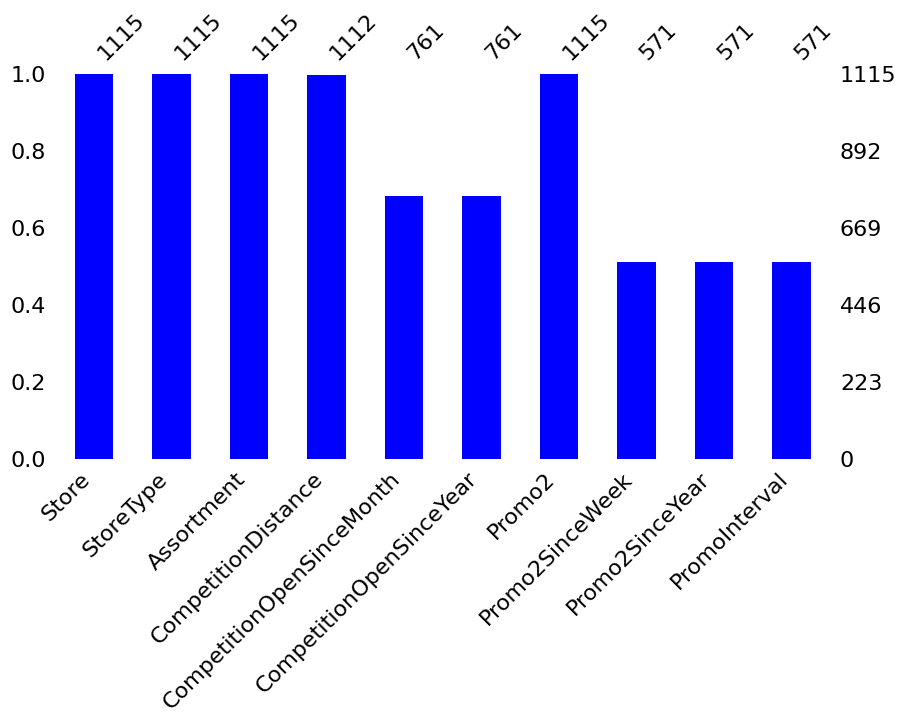

time: 2.38 s (started: 2023-06-06 14:51:02 +00:00)


In [ ]:
# Visualizing the missing values of store dataset
msn.bar(store,figsize=(10,5), color = 'blue')

### What did you know about your dataset?

We have to got the following points about our dataset:
1. **'Rossmann dataset'** is having **1017209 rows and 9 columns** and does not have any null value.
2. **'Stores dataset'** is having **1115 rows and 10 columns**. It contains null values in total six features which is CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval. 
3. There are **no duplicate** values present in both the datasets.
4. There are total 4 **categorical features** in 'Rossmann' dataset namely Open, Promo, StateHoliday and SchoolHoliday and 'Stores' contain categorical features namely StoreType, Assortment, Promo2, PromoInterval.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print('-'*80)
print('Columns of the Rossmann Store dataset',rossmann_store.columns)
print('\n')
print('-'*80)
print('Columns of the store dataset',store.columns)

--------------------------------------------------------------------------------
Columns of the Rossmann Store dataset Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


--------------------------------------------------------------------------------
Columns of the store dataset Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
time: 18.8 ms (started: 2023-06-06 14:53:06 +00:00)


In [ ]:
# Rossmann Store Dataset Describe
rossmann_store.describe(include = 'all')

Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            5            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       855087            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

time: 758 ms (started: 2023-06-06 14:53:08 +00:00)


In [ ]:
#Store Dataset Describe
store.describe(include='all')

Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique         NaN         4          3                  NaN   
top            NaN         a          a                  NaN   
freq           NaN       602        593                  NaN   
mean     558.00000       NaN        NaN          5404.901079   
std      322.01708       NaN        NaN          7663.174720   
min        1.00000       NaN        NaN            20.000000   
25%      279.50000       NaN        NaN           717.500000   
50%      558.00000       NaN        NaN          2325.000000   
75%      836.50000       NaN        NaN          6882.500000   
max     1115.00000       NaN        NaN         75860.000000   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Promo2  \
count                  761.000000                761.000000  1115.000000   
unique                        NaN                       NaN          NaN   
top                           NaN                       NaN          NaN   
freq                          NaN                       NaN          NaN   
mean                     7.224704               2008.668857     0.512108   
std                      3.212348                  6.195983     0.500078   
min                      1.000000               1900.000000     0.000000   
25%                      4.000000               2006.000000     0.000000   
50%                      8.000000               2010.000000     1.000000   
75%                     10.000000               2013.000000     1.000000   
max                     12.000000               2015.000000     1.000000   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
count        571.000000       571.000000              571  
unique              NaN              NaN                3  
top                 NaN              NaN  Jan,Apr,Jul,Oct  
freq                NaN              NaN              335  
mean          23.595447      2011.763573              NaN  
std           14.141984         1.674935              NaN  
min            1.000000      2009.000000              NaN  
25%           13.000000      2011.000000              NaN  
50%           22.000000      2012.000000              NaN  
75%           37.000000      2013.000000              NaN  
max           50.000000      2015.000000              NaN

time: 62.5 ms (started: 2023-06-06 14:53:09 +00:00)


### Variables Description 

**Rossmann Stores Data.csv** - historical data including Sales

**Store.csv** - supplemental information about the stores

**Data fields**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday.

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable of Rossman Store Dataset.
for col in rossmann_store.columns.tolist():
  print('Number of unique value in',col,'is',rossmann_store[col].unique(),'.')

Number of unique value in Store is [   1    2    3 ... 1113 1114 1115] .
Number of unique value in DayOfWeek is [5 4 3 2 1 7 6] .
Number of unique value in Date is ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '201

In [ ]:
# Check Unique Values for each variable of Store Dataset.
for col in store.columns.tolist():
  print('Number of unique value in',col,'is',store[col].unique(),'.')

Number of unique value in Store is [   1    2    3 ... 1113 1114 1115] .
Number of unique value in StoreType is ['c' 'a' 'd' 'b'] .
Number of unique value in Assortment is ['a' 'c' 'b'] .
Number of unique value in CompetitionDistance is [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.

## 3. ***Data Wrangling***

### Data Wrangling Code

**Null Value Treatment**

 ##### a). Handling null values from **CompetitionDistance** feature.

In [ ]:
# fetching the observations which contains null values in CompetitionDistance feature
store[store["CompetitionDistance"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

time: 17.5 ms (started: 2023-06-06 14:53:27 +00:00)


<Axes: xlabel='CompetitionDistance'>

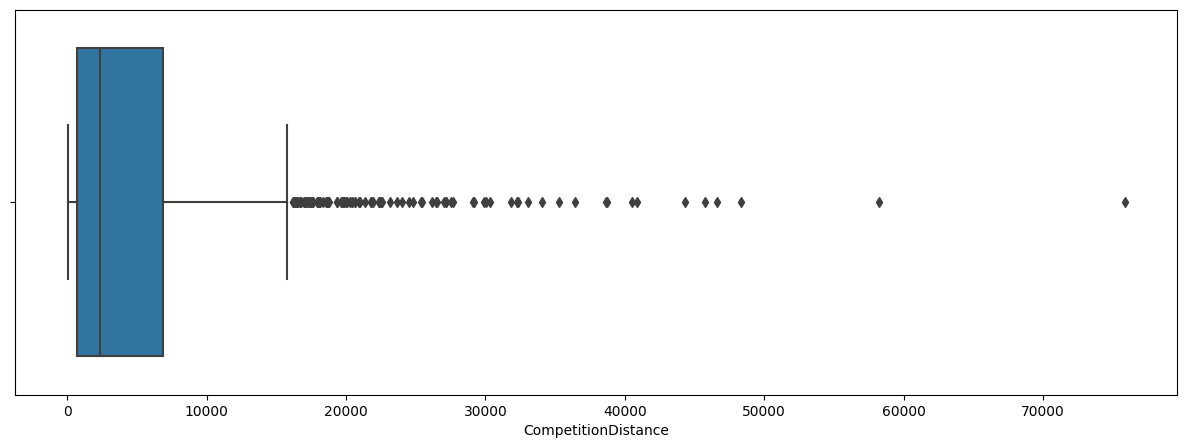

time: 205 ms (started: 2023-06-06 14:53:29 +00:00)


In [ ]:
# plotting box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= store["CompetitionDistance"])

In order to fill the null values of CompetitionDistance we have 4 options:
1. Zero(0) >> Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.
2. Mean >> Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. Median >> To get good results replacing with median can be a better choice.
4. Mode >> Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the median.

In [ ]:
# filling null values
store["CompetitionDistance"].fillna(store["CompetitionDistance"].median(), inplace=True)

time: 3.2 ms (started: 2023-06-06 14:53:29 +00:00)


In [ ]:
# rechecking if we have any further null values in CompetitionDistance feature
store[store["CompetitionDistance"].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

time: 7.75 ms (started: 2023-06-06 14:53:29 +00:00)


In [ ]:
# rechecking if we have any null values
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
time: 16.3 ms (started: 2023-06-06 14:53:29 +00:00)


Hurray!!  In the store dataset, they have not any further null values in CompetitionDistance feature.

##### b). Handling null values from **CompetitionOpenSinceMonth and CompetitionOpenSinceYear** feature.

In [ ]:
# fetching the observations which contains null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature
store[store["CompetitionOpenSinceMonth"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

time: 21.8 ms (started: 2023-06-06 14:53:29 +00:00)


<Axes: >

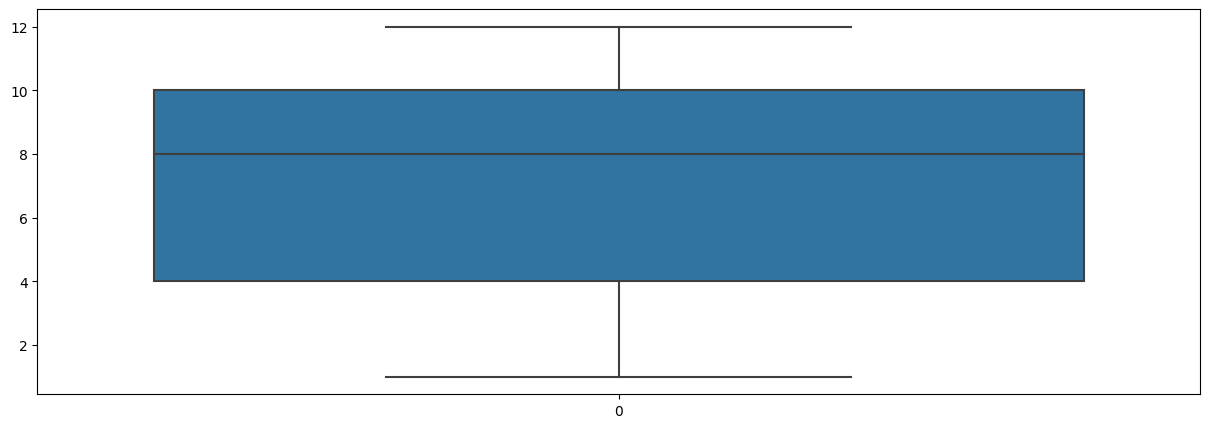

time: 193 ms (started: 2023-06-06 14:53:29 +00:00)


In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(store["CompetitionOpenSinceMonth"])

<Axes: >

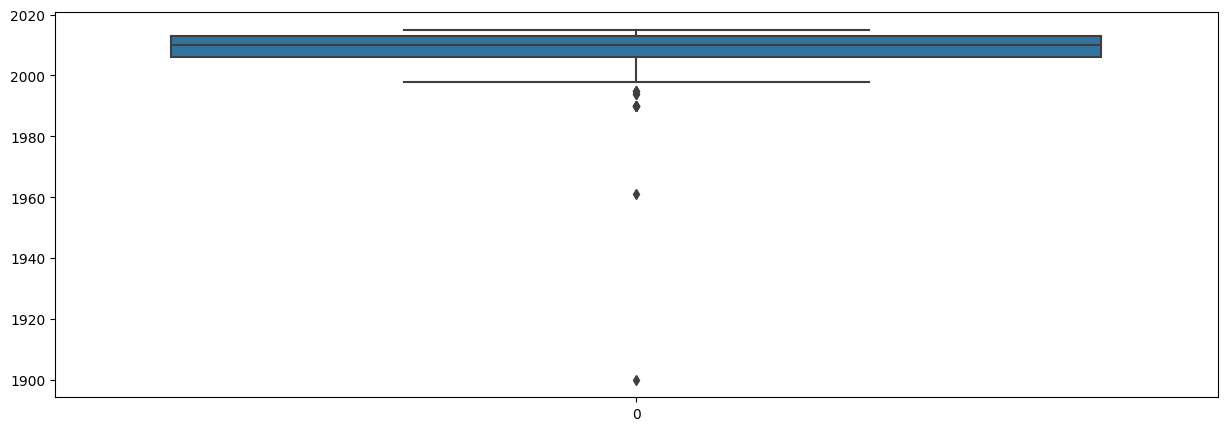

time: 189 ms (started: 2023-06-06 14:53:30 +00:00)


In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(store["CompetitionOpenSinceYear"])

Filling null values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear with Mode.

In [ ]:
# filling null values of CompetitionOpenSinceMonth
store["CompetitionOpenSinceMonth"].fillna(store["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

time: 2.82 ms (started: 2023-06-06 14:53:30 +00:00)


In [ ]:
# filling null values of CompetitionOpenSinceYear
store["CompetitionOpenSinceYear"].fillna(store["CompetitionOpenSinceYear"].mode()[0], inplace=True)

time: 2.56 ms (started: 2023-06-06 14:53:30 +00:00)


In [ ]:
# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
time: 12.9 ms (started: 2023-06-06 14:53:30 +00:00)


##### c). Handling null values from **Promo2SinceWeek, Promo2SinceYear and PromoInterval** feature.

Since corresponding value where Promo2 is 0 for features Promo2SinceWeek, Promo2SinceYear and PromoInterval having null values. So, we are replacing null values with 0.

In [ ]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0. 
store["Promo2SinceWeek"].fillna(0, inplace=True)
store["Promo2SinceYear"].fillna(0, inplace=True)
store["PromoInterval"].fillna(0, inplace=True)

time: 3.84 ms (started: 2023-06-06 14:53:30 +00:00)


In [ ]:
# rechecking if our features contains more null values
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
time: 14.9 ms (started: 2023-06-06 14:53:30 +00:00)


Congratulations we have achieved our first milestone by cleaning up all the null/missing values from both the datasets.

#### 2. Merging datasets

In [ ]:
# checking shape of dataset using left join
df_left= pd.merge(rossmann_store, store, on='Store', how= 'left')
print(df_left.shape)
print(f'Total number of null values obtained from left join: {df_left.isna().sum().sum()}')

# checking shape of dataset using right join
df_right= pd.merge(rossmann_store, store, on='Store', how= 'right')
print(df_right.shape)
print(f'Total number of null values obtained from right join: {df_right.isna().sum().sum()}')


# checking shape of dataset using inner join
df_inner= pd.merge(rossmann_store, store, on='Store', how= 'inner')
print(df_inner.shape)
print(f'Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}')

# checking shape of dataset using outer join
df_outer= pd.merge(rossmann_store, store, on='Store', how= 'outer')
print(df_outer.shape)
print(f'Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}')

(1017209, 18)
Total number of null values obtained from left join: 0
(1017209, 18)
Total number of null values obtained from right join: 0
(1017209, 18)
Total number of null values obtained from inner join: 0
(1017209, 18)
Total number of null values obtained from outer join: 0
time: 6.7 s (started: 2023-06-06 14:53:30 +00:00)


Since, we are obtaining the same shape and 0 null values from all the joins therefore we can use any of the join and it won't affact the results.

We are following the inner join for our further analysis.

In [ ]:
#using inner join for our further analysis
df= pd.merge(rossmann_store, store, on='Store', how= 'inner')
print(df.shape)

(1017209, 18)
time: 320 ms (started: 2023-06-06 14:53:37 +00:00)


In [ ]:
#checking info of our final merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#### 3. Typecasting

In [ ]:
# Checking dtypes of all the variables of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y/%m/%d")
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

time: 217 ms (started: 2023-06-06 14:53:39 +00:00)


In [ ]:
# Verifying the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In order to visualize each chart properly we will do data visualization in a structured way following ' UBM ' rule: 

*   Univariate Analysis
*   Bivariate Analysis

*   Multivariate Analysis

## Univariate Analysis

#### Chart - 1

<Axes: title={'center': 'percentage of School Holiday'}, ylabel='SchoolHoliday'>

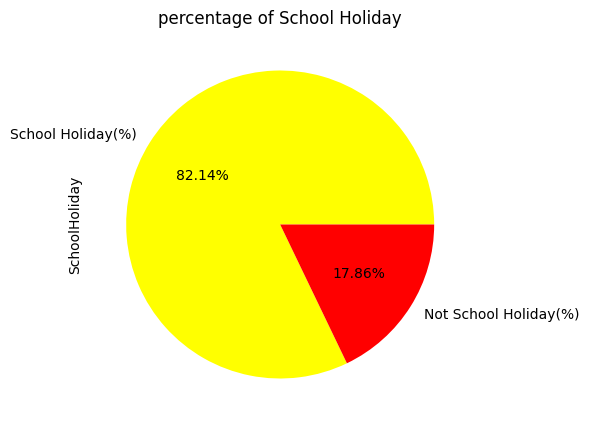

time: 203 ms (started: 2023-06-05 20:48:33 +00:00)


In [ ]:
# Chart - 1 visualization code
df['SchoolHoliday'].value_counts().plot(kind='pie',
                              figsize=(10,5),
                               autopct="%1.2f%%",
                               startangle= 0,
                               shadow=False,
                               labels=['School Holiday(%)','Not School Holiday(%)'],
                               colors=['yellow','red'],
                               explode=[0,0],
                               title = 'percentage of School Holiday'
                              )


<Axes: title={'center': 'Percentage of Promoted stores'}, ylabel='Promo'>

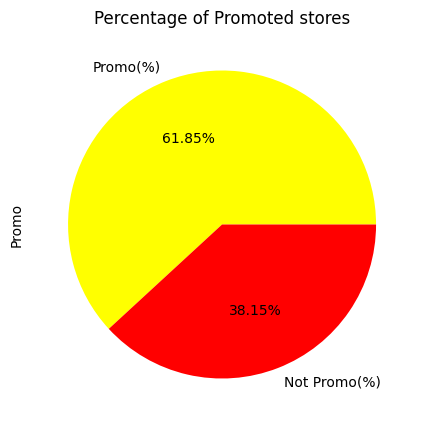

time: 151 ms (started: 2023-06-05 20:48:38 +00:00)


In [ ]:
df['Promo'].value_counts().plot(kind='pie',
                              figsize=(10,5),
                               autopct="%1.2f%%",
                               startangle= 0,
                               shadow=False,
                               labels=['Promo(%)','Not Promo(%)'],
                               colors=['yellow','red'],
                               explode=[0,0],
                               title = 'Percentage of Promoted stores'
                              )

<Axes: title={'center': 'percentage of Store type'}, ylabel='StoreType'>

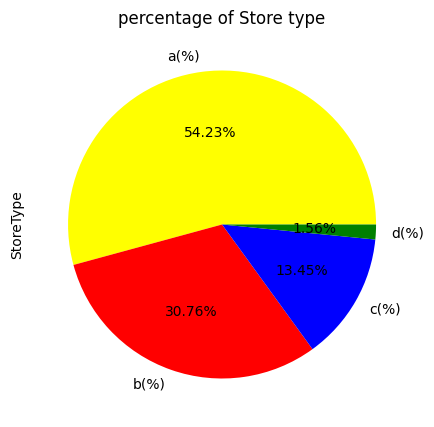

time: 219 ms (started: 2023-06-05 20:48:38 +00:00)


In [ ]:
df['StoreType'].value_counts().plot(kind='pie',
                              figsize=(10,5),
                               autopct="%1.2f%%",
                               startangle= 0,
                               shadow=False,
                               labels=['a(%)','b(%)','c(%)','d(%)'],
                               colors=['yellow','red','blue','green'],
                               explode=[0,0,0,0],
                               title = 'percentage of Store type'
                              )

<Axes: title={'center': 'percentage of Assortment'}, ylabel='Assortment'>

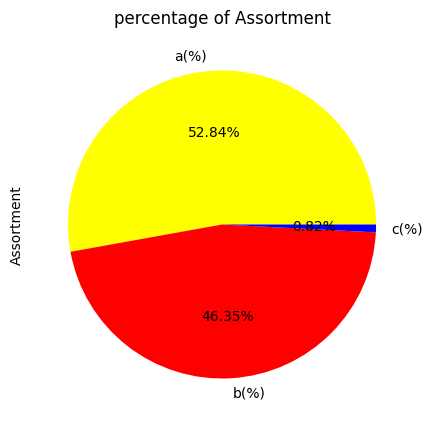

time: 237 ms (started: 2023-06-05 20:48:39 +00:00)


In [ ]:
df['Assortment'].value_counts().plot(kind='pie',
                              figsize=(10,5),
                               autopct="%1.2f%%",
                               startangle= 0,
                               shadow=False,
                               labels=['a(%)','b(%)','c(%)'],
                               colors=['yellow','red','blue'],
                               explode=[0,0,0],
                               title = 'percentage of Assortment'
                              )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

<ipython-input-312-a61f6d669d34>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Sales"], color="Yellow", shade = True)
<ipython-input-312-a61f6d669d34>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["CompetitionDistance"], color="Red", shade = True)
<ipython-input-312-a61f6d669d34>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Customers"], color="Blue", shade = True)
<ipython-input-312-a61f6d669d34>:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Promo2SinceWeek'],color = '

Text(0.5, 1.0, 'Density distribution of Promo2SinceWeek')

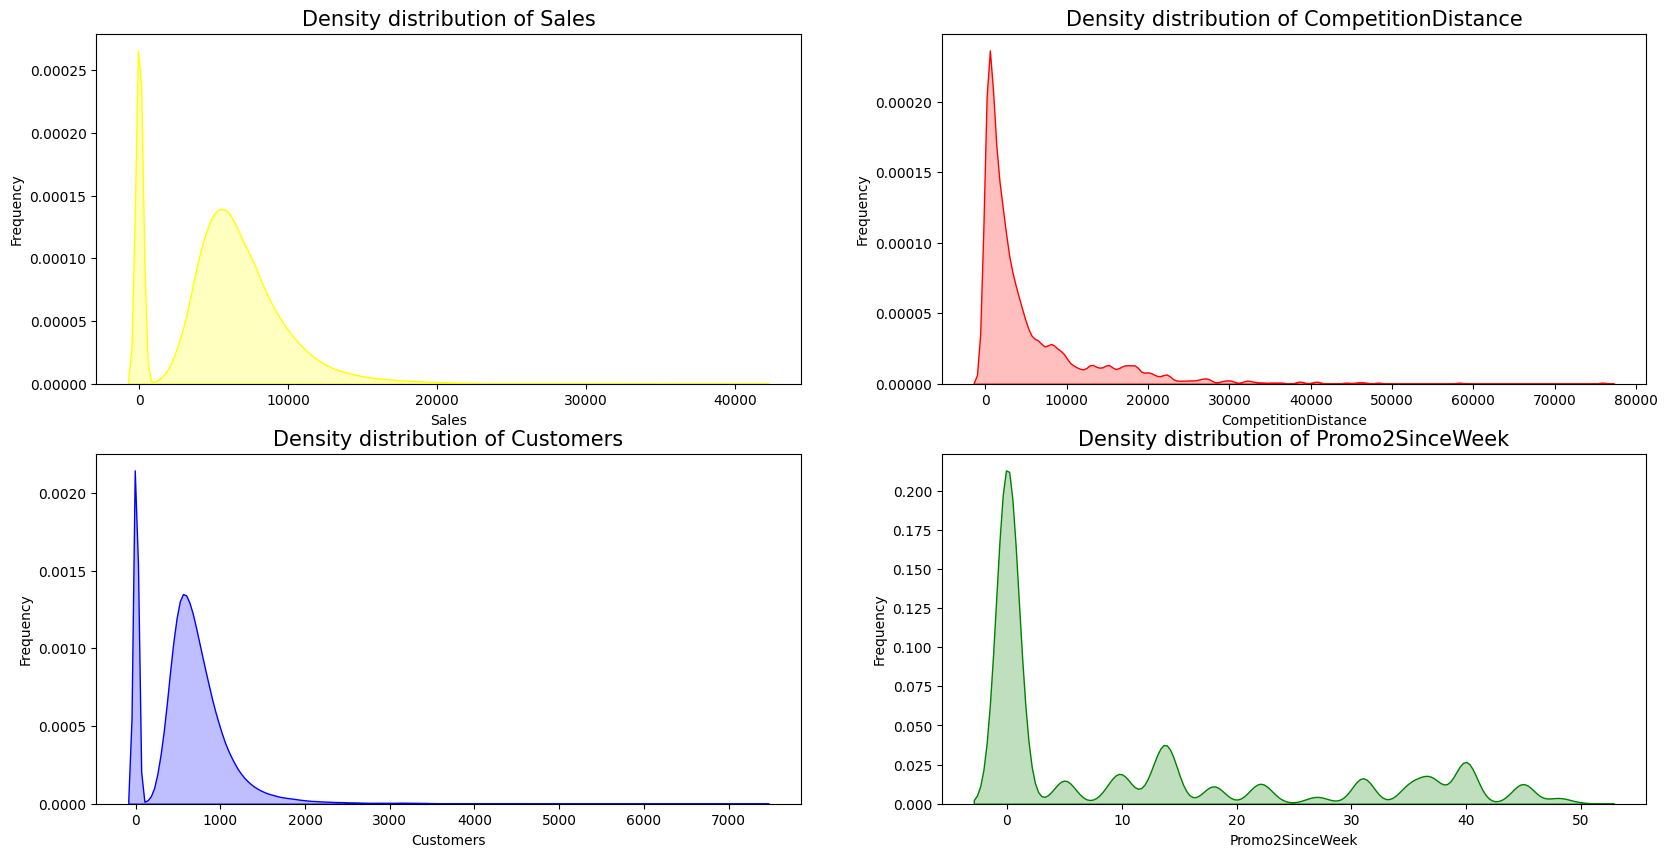

time: 22 s (started: 2023-06-05 20:48:39 +00:00)


In [ ]:
# Chart - 2 visualization code
#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], color="Yellow", shade = True)
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], color="Red", shade = True)
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Blue", shade = True)
plt.title('Density distribution of Customers',size = 15)

# Fourth Plot(Promo2SinceWeek vs Frequency)
plt.subplot(2,2,4)
plt.xlabel('Promo2SinceWeek')
plt.ylabel('Frequency')
sns.kdeplot(df['Promo2SinceWeek'],color = 'Green', shade = True)
plt.title('Density distribution of Promo2SinceWeek',size = 15)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

time: 22 s (started: 2023-06-05 20:48:39 +00:00)


#### Chart - 3

<function matplotlib.pyplot.show(close=None, block=None)>

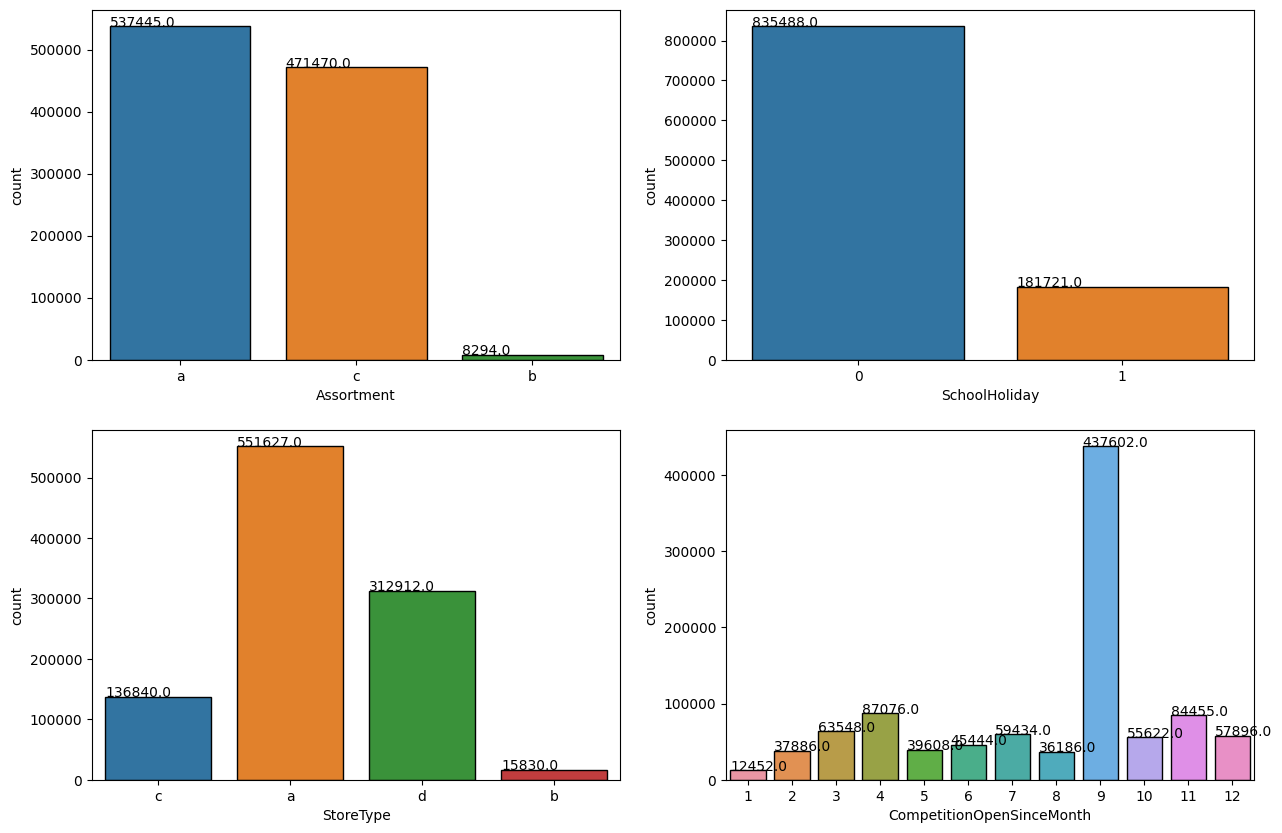

time: 2.16 s (started: 2023-06-05 20:49:01 +00:00)


In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
ax = sns.countplot(x = 'Assortment', data = df, edgecolor = 'black')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()))
plt.subplot(2,2,2)
ax = sns.countplot(x = 'SchoolHoliday', data = df, edgecolor = 'black')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.subplot(2,2,3)
ax = sns.countplot(x = 'StoreType', data = df, edgecolor = 'black')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.subplot(2,2,4)
ax = sns.countplot(x = 'CompetitionOpenSinceMonth', data = df, edgecolor = 'black')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.show

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

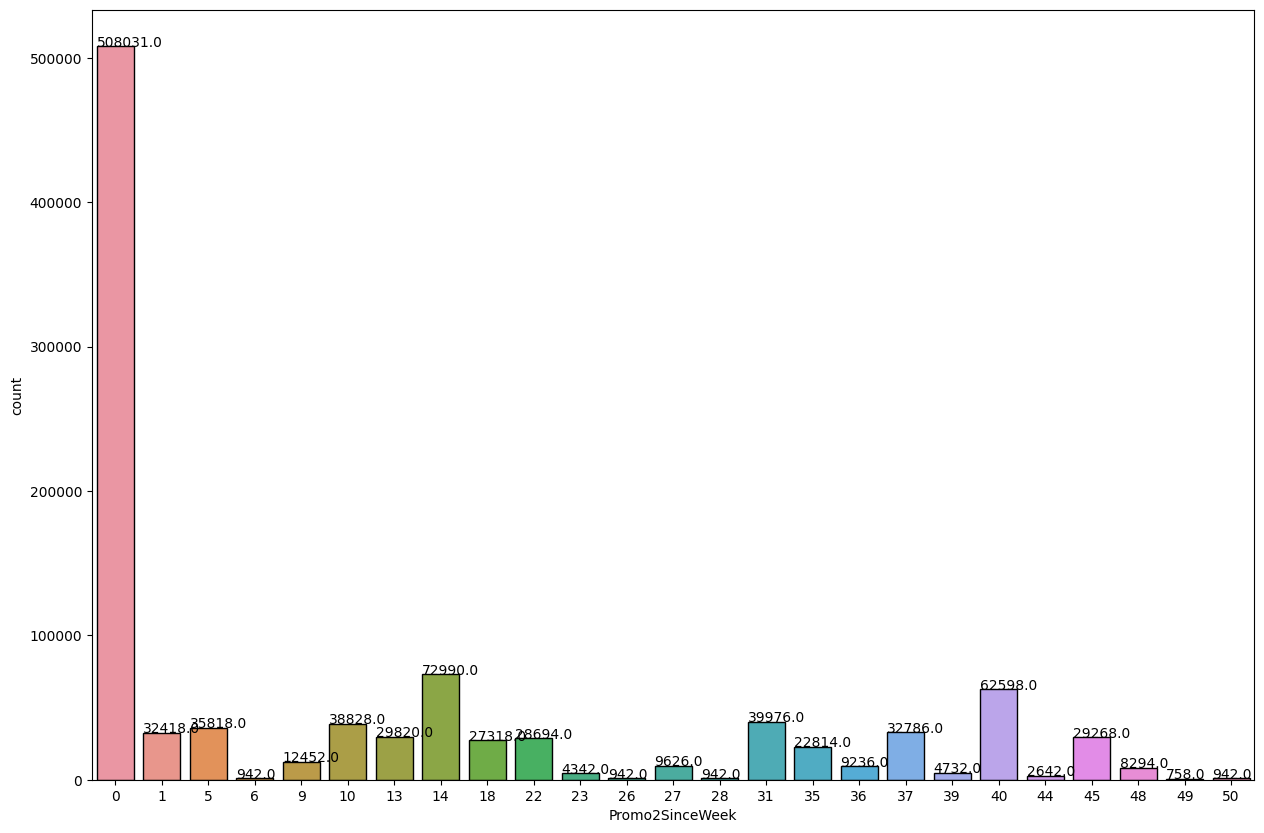

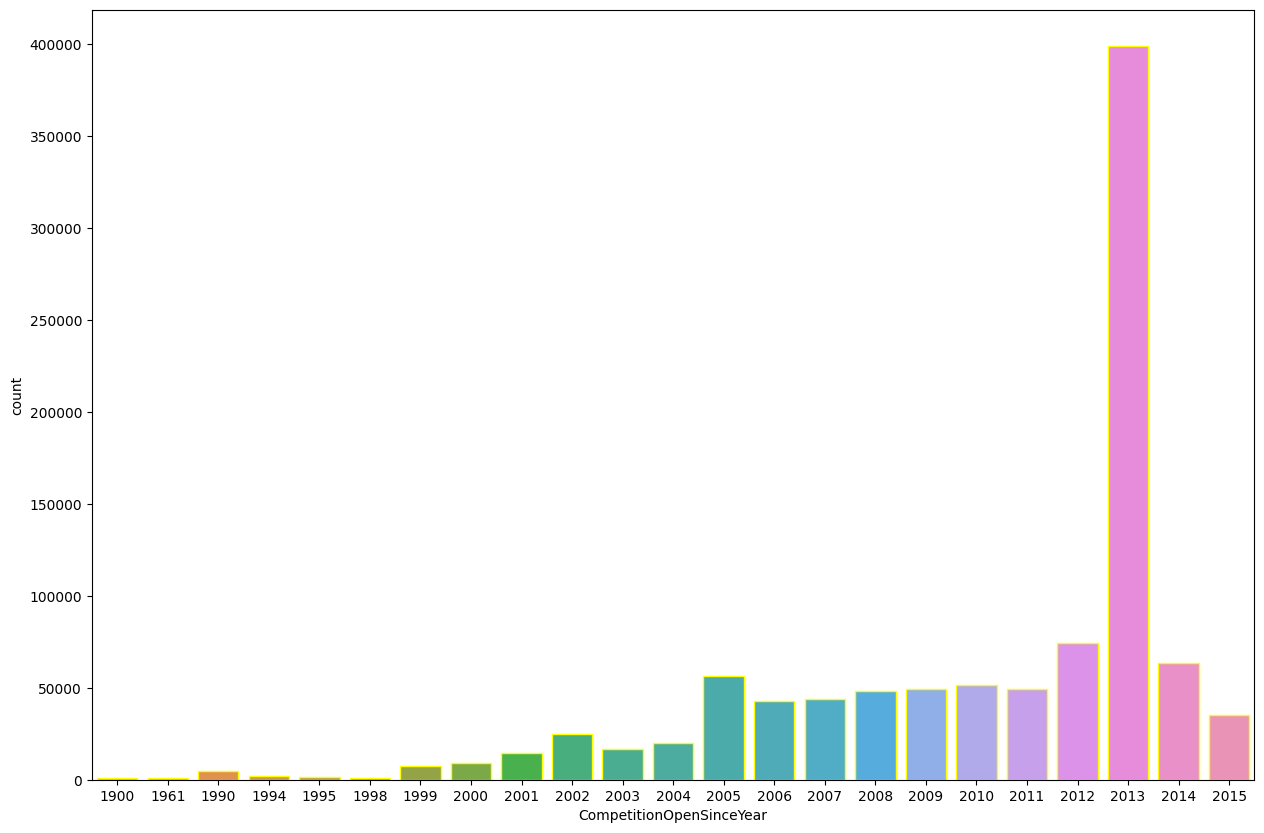

time: 1.84 s (started: 2023-06-05 20:49:03 +00:00)


In [ ]:
# Chart - 4 visualization code
plt.figure(figsize = (15,10))
ax = sns.countplot(x = 'Promo2SinceWeek', data = df, edgecolor = 'black')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()))

plt.figure(figsize = (15,10))
x = sns.countplot(x = 'CompetitionOpenSinceYear',data = df,edgecolor = 'yellow')
for i in x.patches:
  x.annotate(str(p.get_height()), (p.get_x() , p.get_height()))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## Bivariate Analysis

#### Chart - 1

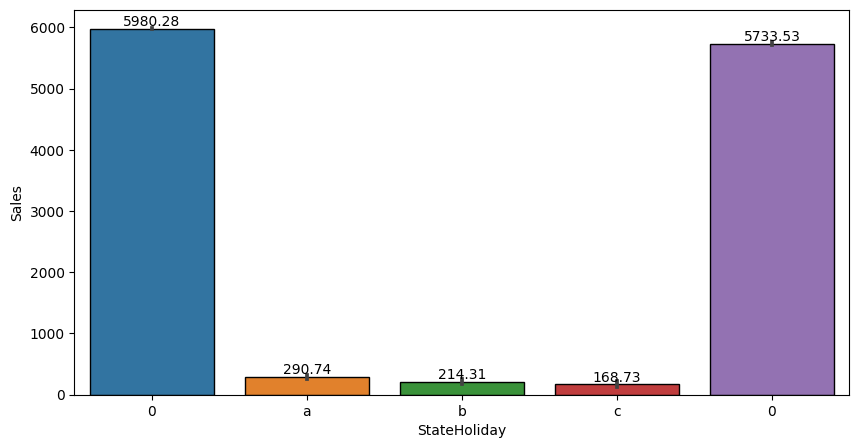

time: 34.6 s (started: 2023-06-05 20:49:31 +00:00)


In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
chart1 = sns.barplot(x = df['StateHoliday'],y = df['Sales'],edgecolor = 'black')
for p in chart1.patches:
    chart1.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha = 'center',va = 'center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

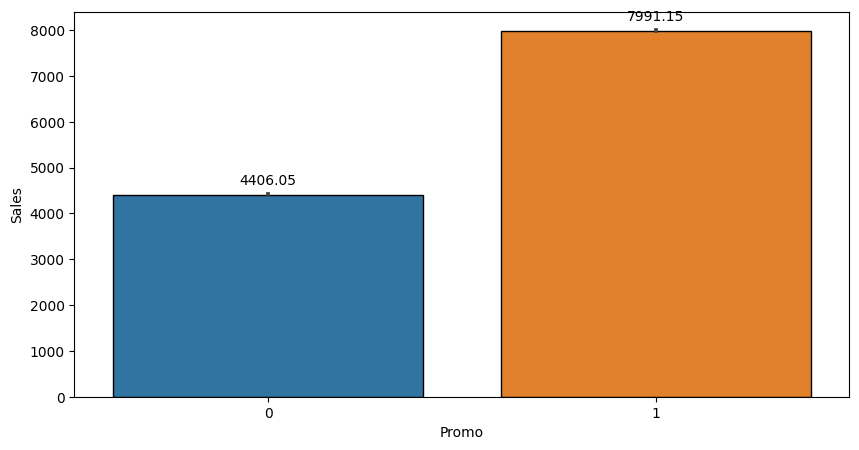

time: 31 s (started: 2023-06-05 20:50:15 +00:00)


In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
chart2 = sns.barplot(x= df['Promo'],y=df['Sales'],edgecolor='black')
for p in chart2.patches:
  chart2.annotate(format(p.get_height(),'.2f'),
                  (p.get_x() + p.get_width()/2,
                   p.get_height()),
                  ha = 'center',va = 'center',
                  size = 10, xytext = (0, 10),
                  textcoords='offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

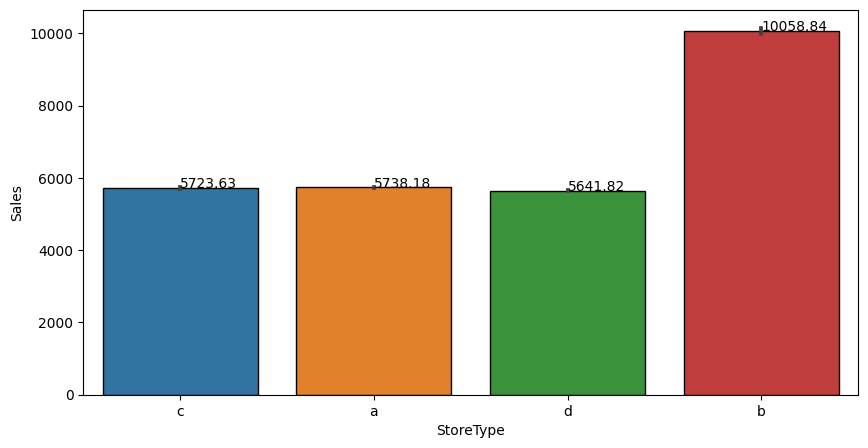

time: 28.3 s (started: 2023-06-05 20:50:58 +00:00)


In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
chart3 = sns.barplot(x=df['StoreType'],y=df['Sales'],edgecolor='black')
for p in chart3.patches:
    chart3.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

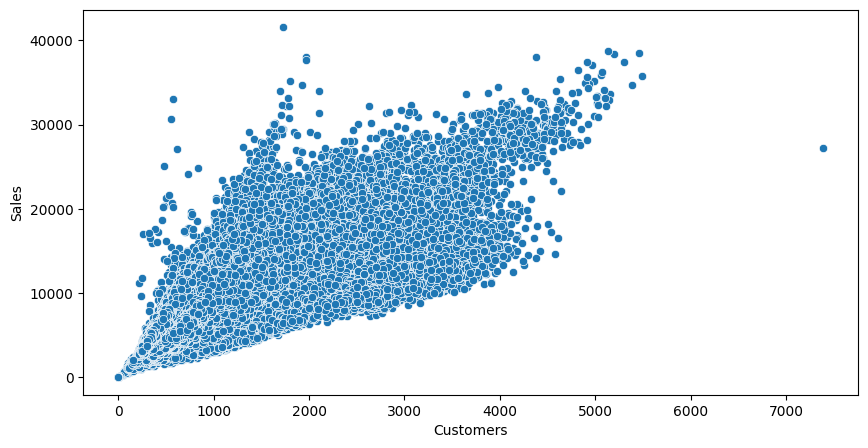

time: 2.37 s (started: 2023-06-05 20:51:38 +00:00)


In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Customers', y = 'Sales', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

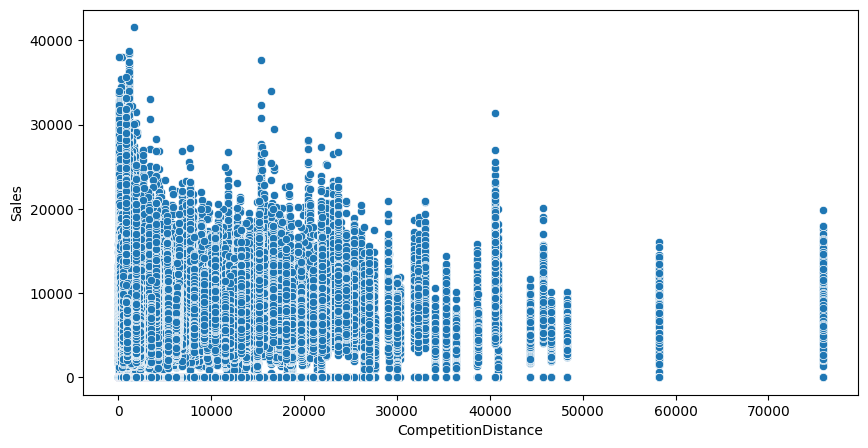

time: 4.1 s (started: 2023-06-05 20:51:47 +00:00)


In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10,5))
sns.scatterplot(x='CompetitionDistance',y='Sales',data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

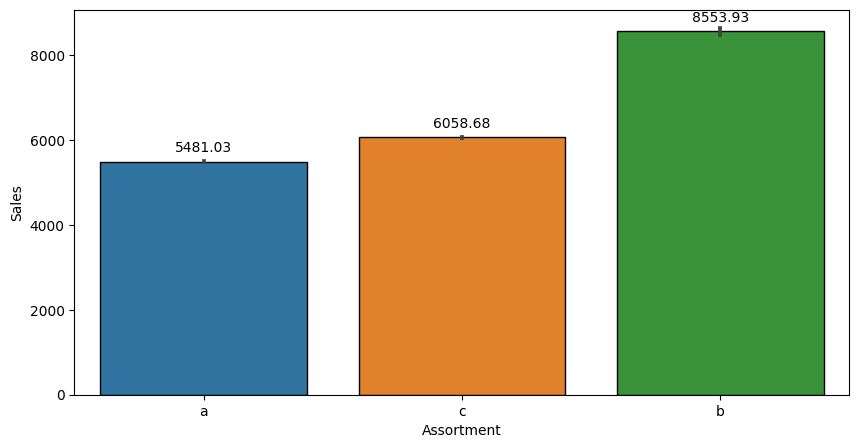

time: 28.3 s (started: 2023-06-05 20:51:58 +00:00)


In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
plots = sns.barplot(x= df['Assortment'],y=df['Sales'],edgecolor='black')
for p in plots.patches:
  plots.annotate(format(p.get_height(),'.2f'),
                 (p.get_x() + p.get_width()/2,p.get_height()),
                  ha='center', va='center',
                   size=10, xytext=(0, 10),
                   textcoords='offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

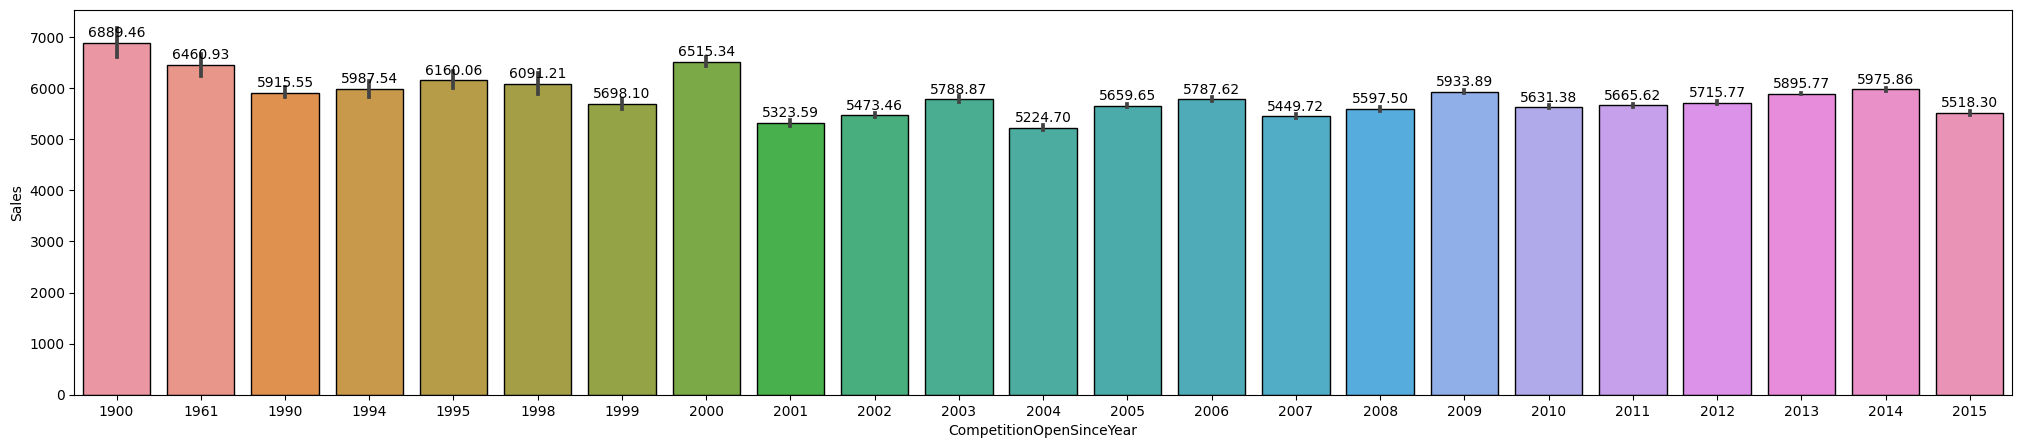

time: 20.9 s (started: 2023-06-05 20:52:35 +00:00)


In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(25,5))
plots = sns.barplot(x= df['CompetitionOpenSinceYear'],y= df['Sales'],edgecolor= 'black')
for p in plots.patches:
  plots.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()),ha = 'center', va = 'center',
                  size = 10, xytext = (0,7),
                  textcoords= 'offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

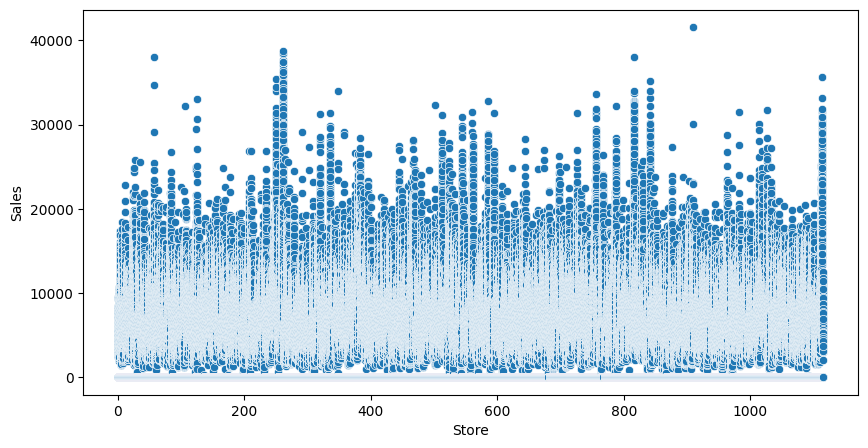

time: 2.36 s (started: 2023-06-05 20:53:05 +00:00)


In [ ]:
# Chart - 8 visualization code
plt.figure(figsize= (10,5))
sns.scatterplot(x = 'Store',y= 'Sales', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

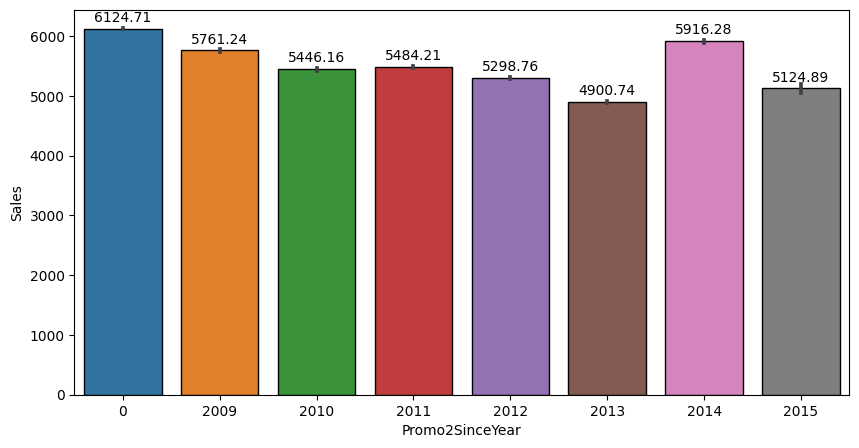

time: 21.6 s (started: 2023-06-05 20:53:24 +00:00)


In [ ]:
# Chart - 9 visualization code
plt.figure(figsize= (10,5))
plots = sns.barplot(x = df['Promo2SinceYear'],y = df['Sales'], edgecolor = 'black')
for p in plots.patches:
  plots.annotate(format(p.get_height(),'0.2f'),
                 (p.get_x()  + p.get_width()/2,
                  p.get_height()),ha = 'center',va = 'center',
                size = 10, xytext = (0,8),
                textcoords= 'offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

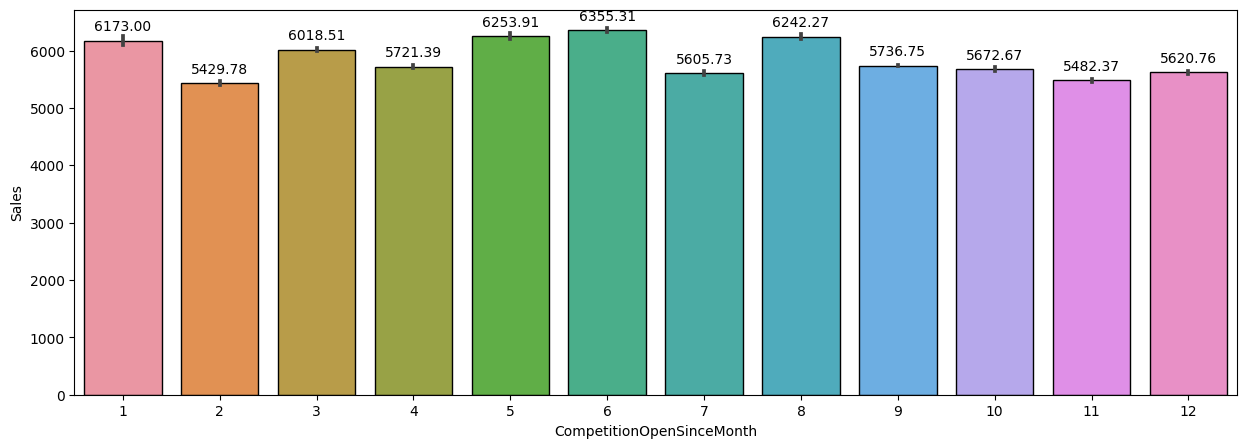

time: 33.5 s (started: 2023-06-05 20:53:58 +00:00)


In [ ]:
# # Chart - 10 visualization code
plt.figure(figsize=(15,5))
plots = sns.barplot(x = df['CompetitionOpenSinceMonth'],y = df['Sales'],edgecolor = 'black')
for p in plots.patches:
  plots.annotate(format(p.get_height(),'.2f'),
                        (p.get_x() + p.get_width()/2,
                         p.get_height()),ha = 'center',va='center',
                        size = 10, xytext= (0,10),
                        textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

#### Chart - 11

In [ ]:
from datetime import date as dt
df['Year'] = df['Date'].dt.year

time: 111 ms (started: 2023-06-05 20:54:44 +00:00)


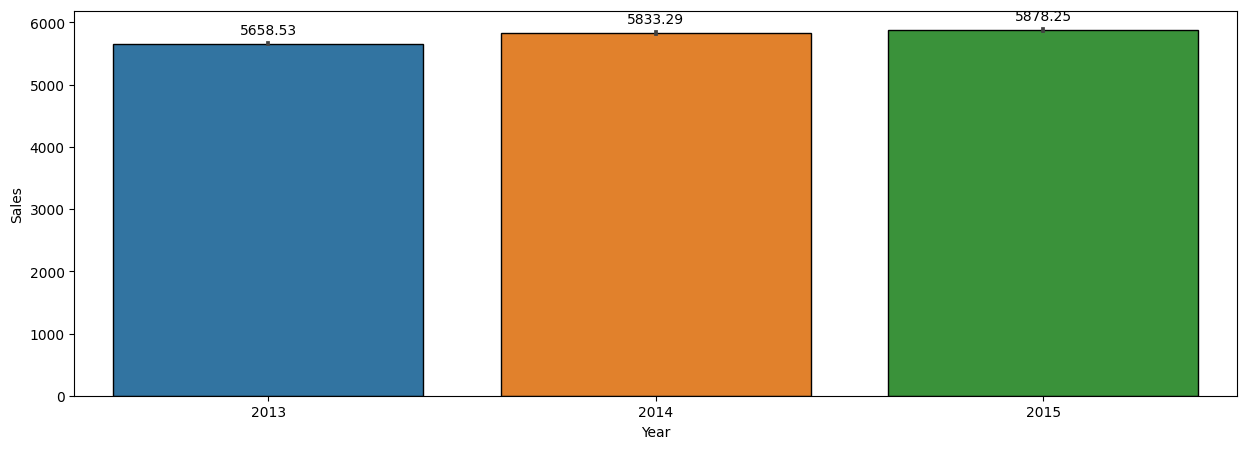

time: 28 s (started: 2023-06-05 20:54:49 +00:00)


In [ ]:
# # Chart - 11 visualization code
plt.figure(figsize= (15,5))
plots = sns.barplot(x= df['Year'],y= df['Sales'],edgecolor= 'black')
for p in plots.patches:
  plots.annotate(format(p.get_height(),'.2f'),
                 (p.get_x()+p.get_width()/2,
                  p.get_height()),ha= 'center',va= 'center',
                 size= 10,xytext = (0,10),
                 textcoords= 'offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

#### Chart - 12

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

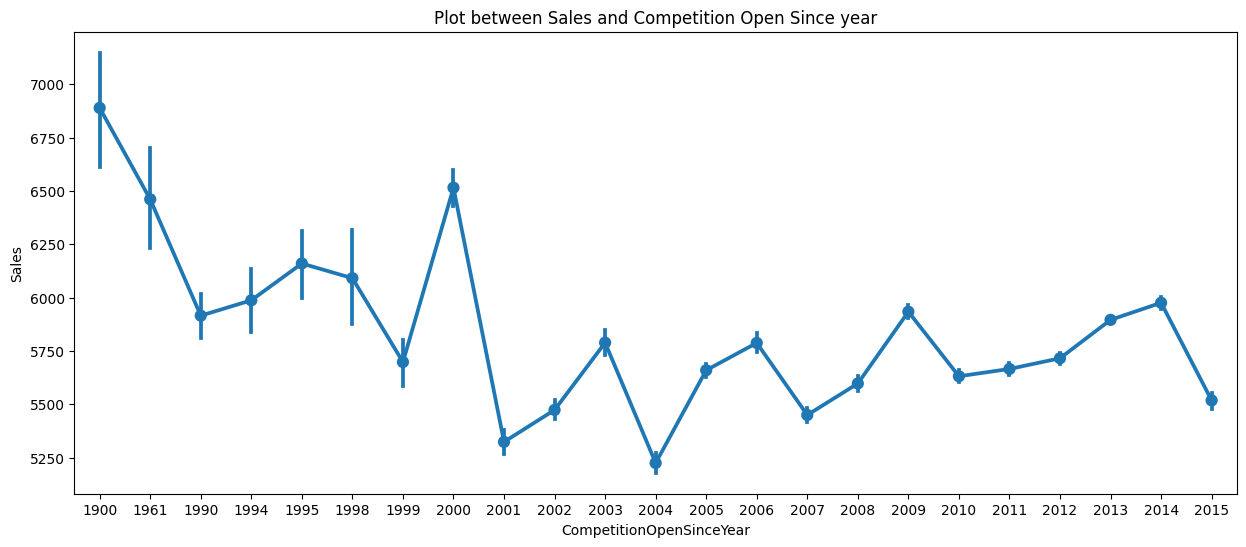

time: 21.9 s (started: 2023-06-05 20:55:29 +00:00)


In [ ]:
# # Chart - 12 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

## Multivariate Analysis

#### Chart - 1 - Correlation Heatmap

<ipython-input-189-32c73a207c47>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,fmt='0.1f',annot_kws={'size':10},vmax =1,cmap= plt.cm.CMRmap)


Text(0.5, 1.0, 'Correlation Heatmap for Retail Sales Pridiction')

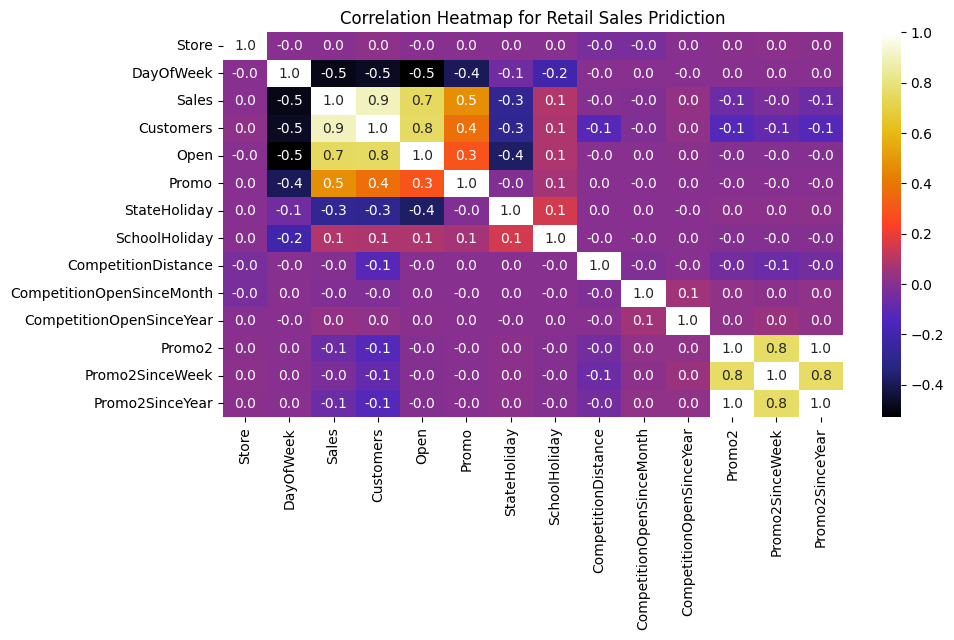

time: 1.91 s (started: 2023-06-06 08:30:44 +00:00)


In [ ]:
# Correlation Heatmap visualization code
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(),annot = True,fmt='0.1f',annot_kws={'size':10},vmax =1,cmap= plt.cm.CMRmap)
plt.title('Correlation Heatmap for Retail Sales Pridiction')

##### 1. Why did you pick the specific chart?

It can give multiple visual aids in a single frame and various insights related to the data can be gained in one single look.

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

We can infer that some features like Cutomers, promo and SchoolHoliday are positively correlated with Sales. While others like DayofWeek, CompetitionDistance and promo2 are negatively correlated with Sales.Even we can state the correlation within any two independent features with the help of this chart(heatmap)

#### Chart - 2 - Pair Plot 

In [ ]:
c = ['Open','Promo','StateHoliday','StoreType','Assortment','Promo2','Promo2SinceWeek','Sales']

time: 366 µs (started: 2023-06-06 10:14:25 +00:00)


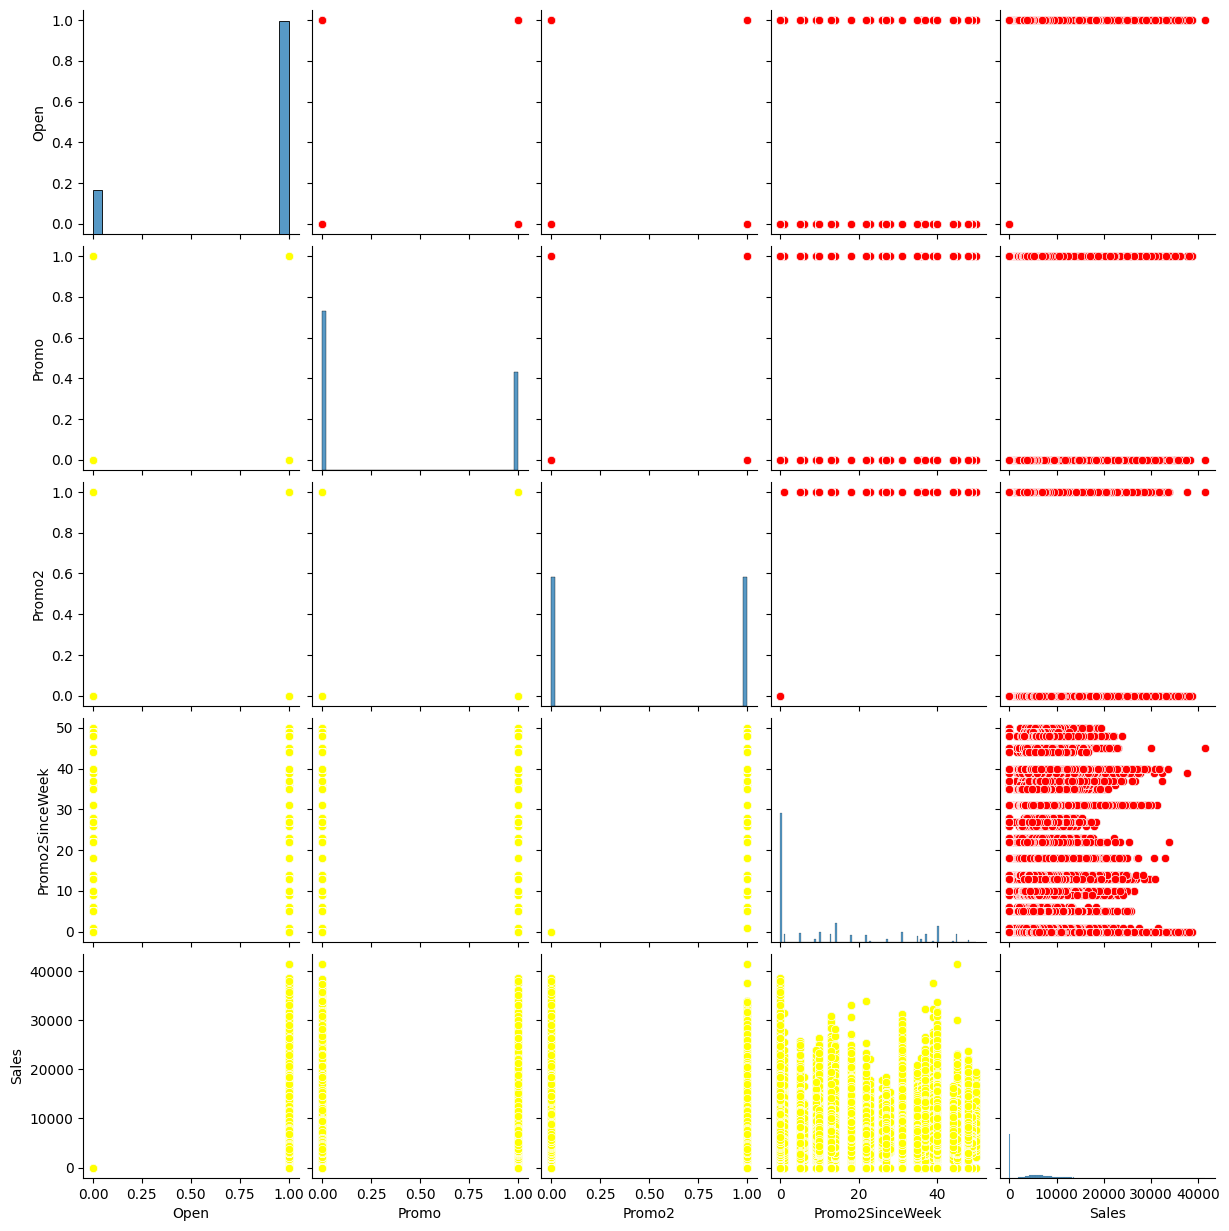

time: 2min 7s (started: 2023-06-06 10:20:00 +00:00)


In [ ]:
# Pair Plot visualization code
df1 = df[c]
plots = sns.pairplot(df1)
plots.map_upper(sns.scatterplot,color= 'red')
plots.map_lower(sns.scatterplot, color= 'yellow')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

time: 586 ms (started: 2023-06-06 14:53:49 +00:00)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

#### Univiarte Outliers treatment

In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

* Here 3 types of the data present in the dataset, so we can devided into data into three category:
1. Numeric data
2. Contineous columns dataset
3. Categrecal columns dataset

In [ ]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_features= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_features: ",continous_features)

Numeric_features:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
Categorical_features:  ['Date', 'StoreType', 'Assortment', 'PromoInterval']
Continous_features:  ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
time: 2.05 ms (started: 2023-06-06 14:53:53 +00:00)


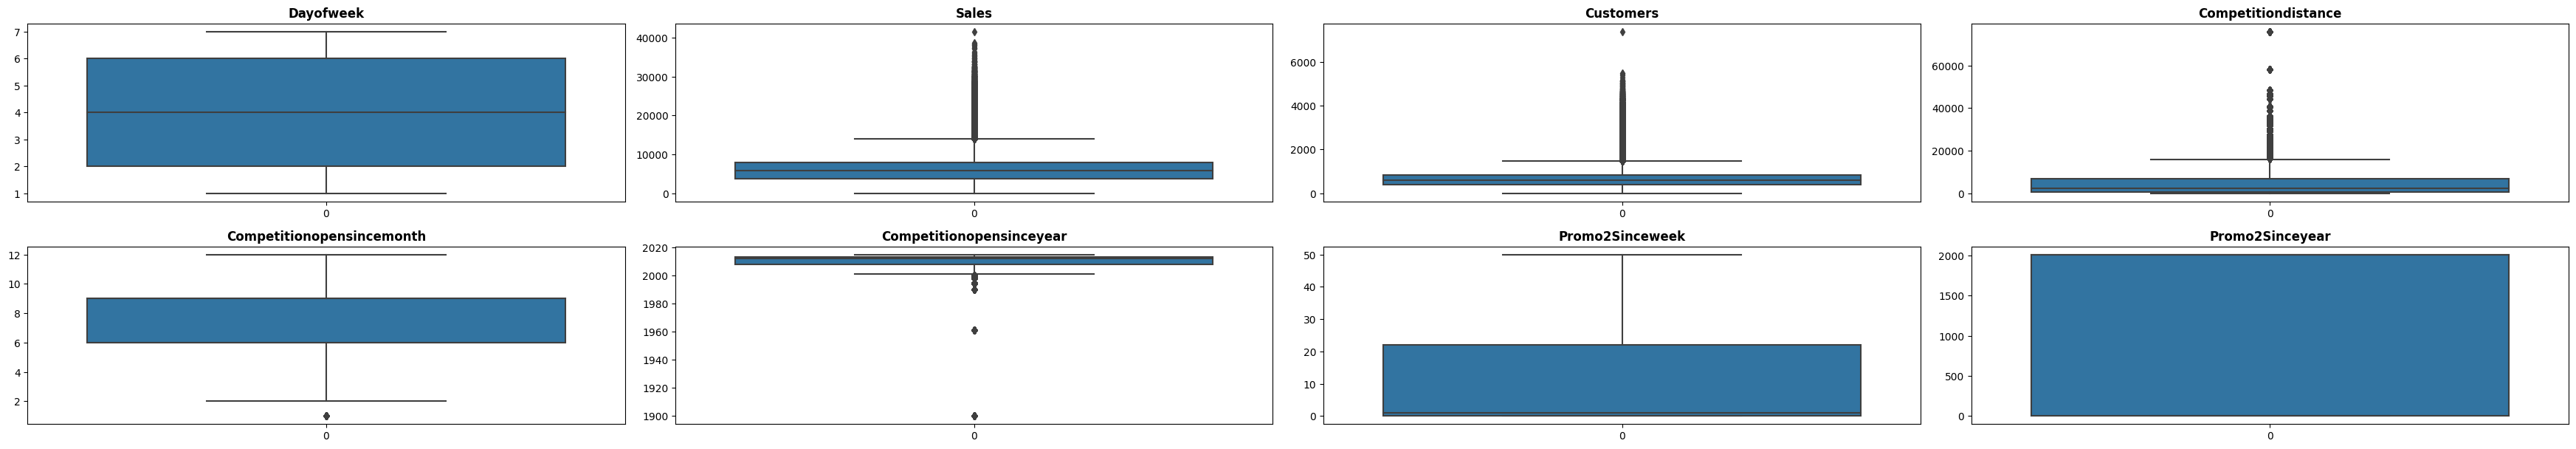

time: 3.34 s (started: 2023-06-06 14:53:53 +00:00)


In [ ]:
# Check outliers by using boxplot Outliers of continous features
plt.figure(figsize= (35,15))
for index,column in enumerate(continous_features):
  plt.subplot(5,4,index+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight= 'bold')
  plt.tight_layout()

In [ ]:
# # Check outliers by using boxplot Outliers of categorical features in valid

time: 420 µs (started: 2023-06-06 14:53:56 +00:00)


In [ ]:
# Handling Outliers & Outlier treatments
def detect_outlier(data):
  data = sorted(data)
  q1 = np.percentile(data,25)
  q2 = np.percentile(data,50)
  q3 = np.percentile(data,75)
  print(f'q1:{q1},\n,q2:{q2},\n,q3:{q3}')
  #  iqr = Inter quartile range
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  print(f'Lower Bound:{lower_bound},\n,Upper Bound:{upper_bound},\n,iqr:{iqr}')
  outliers = [i for i in data if i < lower_bound or i > upper_bound]
  length_of_outliers = len(outliers)
  print('Length of outliers:',length_of_outliers)
  percentage_of_outliers = length_of_outliers*100/len(data)
  print('Percentage of outliers:',round(percentage_of_outliers,2))

time: 7.98 ms (started: 2023-06-06 14:53:56 +00:00)


In [ ]:
# Calculation of inter quartile range, lower bound, upper bound, length of outliers and percentage of outliers of the contineous features dataset
for features in continous_features:
  print(features)
  detect_outlier(df[features])
  print('\n')

DayOfWeek
q1:2.0,
,q2:4.0,
,q3:6.0
Lower Bound:-4.0,
,Upper Bound:12.0,
,iqr:4.0
Length of outliers: 0
Percentage of outliers: 0.0


Sales
q1:3727.0,
,q2:5744.0,
,q3:7856.0
Lower Bound:-2466.5,
,Upper Bound:14049.5,
,iqr:4129.0
Length of outliers: 26694
Percentage of outliers: 2.62


Customers
q1:405.0,
,q2:609.0,
,q3:837.0
Lower Bound:-243.0,
,Upper Bound:1485.0,
,iqr:432.0
Length of outliers: 38095
Percentage of outliers: 3.75


CompetitionDistance
q1:710.0,
,q2:2325.0,
,q3:6880.0
Lower Bound:-8545.0,
,Upper Bound:16135.0,
,iqr:6170.0
Length of outliers: 99160
Percentage of outliers: 9.75


CompetitionOpenSinceMonth
q1:6.0,
,q2:9.0,
,q3:9.0
Lower Bound:1.5,
,Upper Bound:13.5,
,iqr:3.0
Length of outliers: 12452
Percentage of outliers: 1.22


CompetitionOpenSinceYear
q1:2008.0,
,q2:2012.0,
,q3:2013.0
Lower Bound:2000.5,
,Upper Bound:2020.5,
,iqr:5.0
Length of outliers: 27524
Percentage of outliers: 2.71


Promo2SinceWeek
q1:0.0,
,q2:1.0,
,q3:22.0
Lower Bound:-33.0,
,Upper Bound:55.0,
,

In [ ]:
# Define the treatment of the outliers
def outliers_iqr_treatment(data):
  # Calculation of first and third quartile
  q1 = np.percentile(data,25)
  q3 = np.percentile(data,75)
  # Defining the interquartile range(IQR)
  iqr = q3 - q1
  # Identify the outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = [i for i in data if i < lower_bound or i > upper_bound]
  # Treatment of the Outliers
  treated_data = [q1 if i < lower_bound else q3 if i > upper_bound else i for i in data]
  treated_data_int = [int(i) for i in treated_data]
  return treated_data_int

time: 807 µs (started: 2023-06-06 14:54:06 +00:00)


In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_features:
  df[feature]= outliers_iqr_treatment(df[feature])

time: 13.7 s (started: 2023-06-06 14:54:06 +00:00)


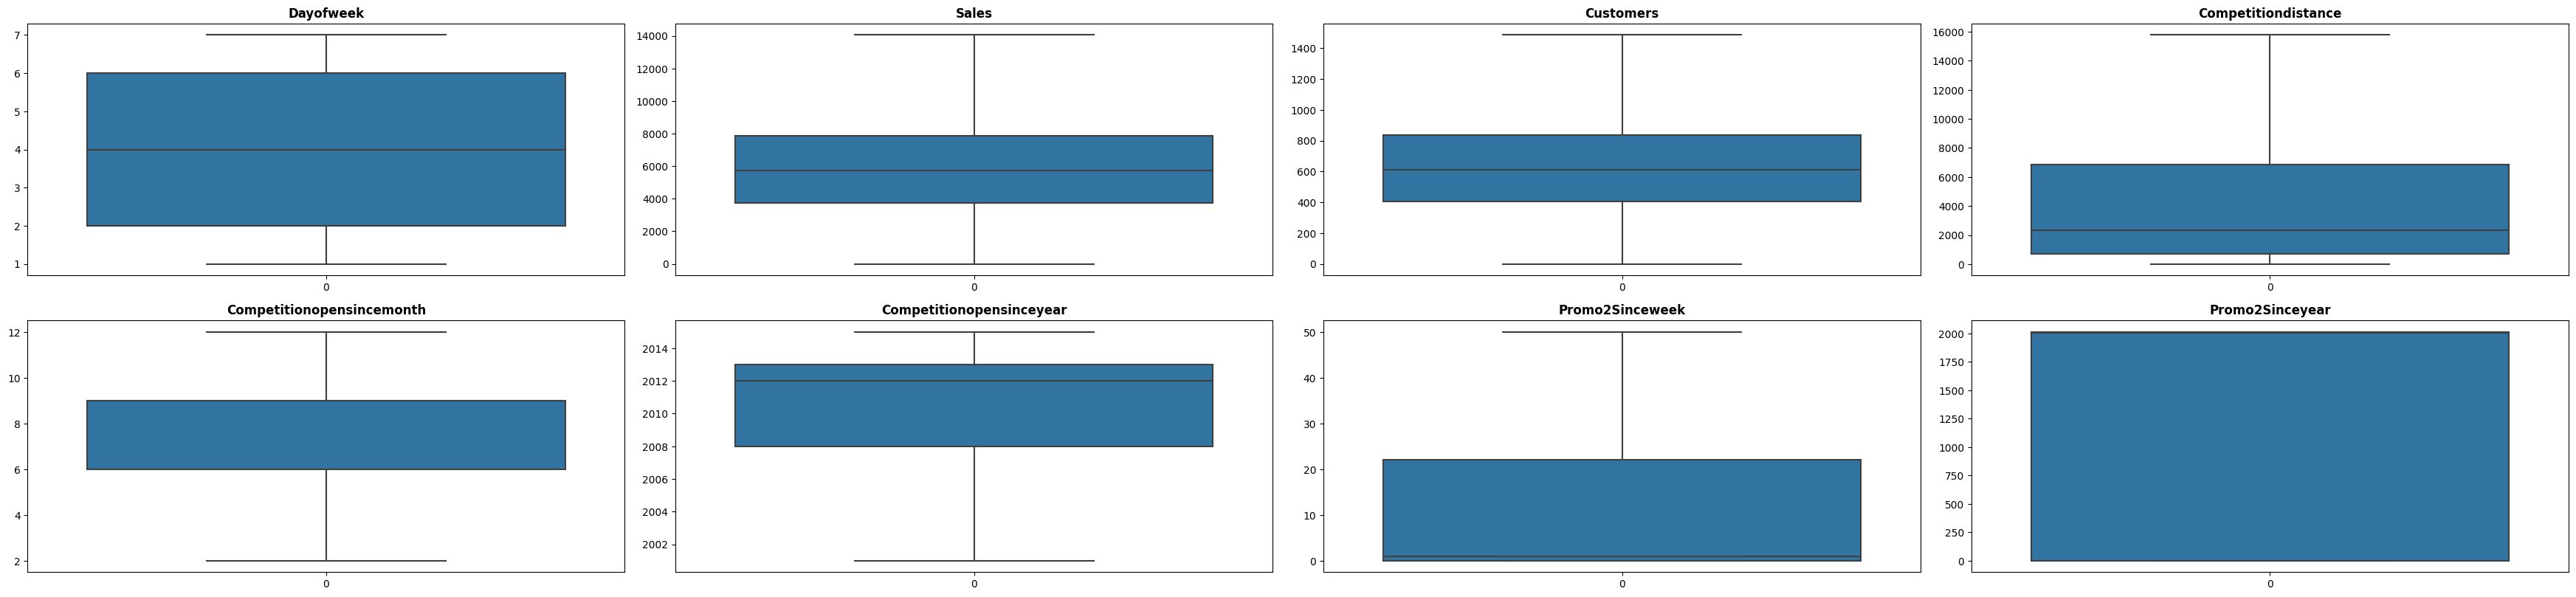

time: 2.51 s (started: 2023-06-06 14:54:20 +00:00)


In [ ]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize= (35,16))
for index,column in enumerate(continous_features):
  plt.subplot(4,4,index+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight = 'bold')
  plt.tight_layout()

In [ ]:
# Cheaking the outlier and percentage of outliers after treatment of the outliers
for i in continous_features:
  print(i)
  detect_outlier(df[i])
  print('\n')

DayOfWeek
q1:2.0,
,q2:4.0,
,q3:6.0
Lower Bound:-4.0,
,Upper Bound:12.0,
,iqr:4.0
Length of outliers: 0
Percentage of outliers: 0.0


Sales
q1:3727.0,
,q2:5744.0,
,q3:7856.0
Lower Bound:-2466.5,
,Upper Bound:14049.5,
,iqr:4129.0
Length of outliers: 0
Percentage of outliers: 0.0


Customers
q1:405.0,
,q2:609.0,
,q3:837.0
Lower Bound:-243.0,
,Upper Bound:1485.0,
,iqr:432.0
Length of outliers: 0
Percentage of outliers: 0.0


CompetitionDistance
q1:710.0,
,q2:2325.0,
,q3:6880.0
Lower Bound:-8545.0,
,Upper Bound:16135.0,
,iqr:6170.0
Length of outliers: 0
Percentage of outliers: 0.0


CompetitionOpenSinceMonth
q1:6.0,
,q2:9.0,
,q3:9.0
Lower Bound:1.5,
,Upper Bound:13.5,
,iqr:3.0
Length of outliers: 0
Percentage of outliers: 0.0


CompetitionOpenSinceYear
q1:2008.0,
,q2:2012.0,
,q3:2013.0
Lower Bound:2000.5,
,Upper Bound:2020.5,
,iqr:5.0
Length of outliers: 0
Percentage of outliers: 0.0


Promo2SinceWeek
q1:0.0,
,q2:1.0,
,q3:22.0
Lower Bound:-33.0,
,Upper Bound:55.0,
,iqr:22.0
Length of outlie

#### Bivariate Outlers treatment

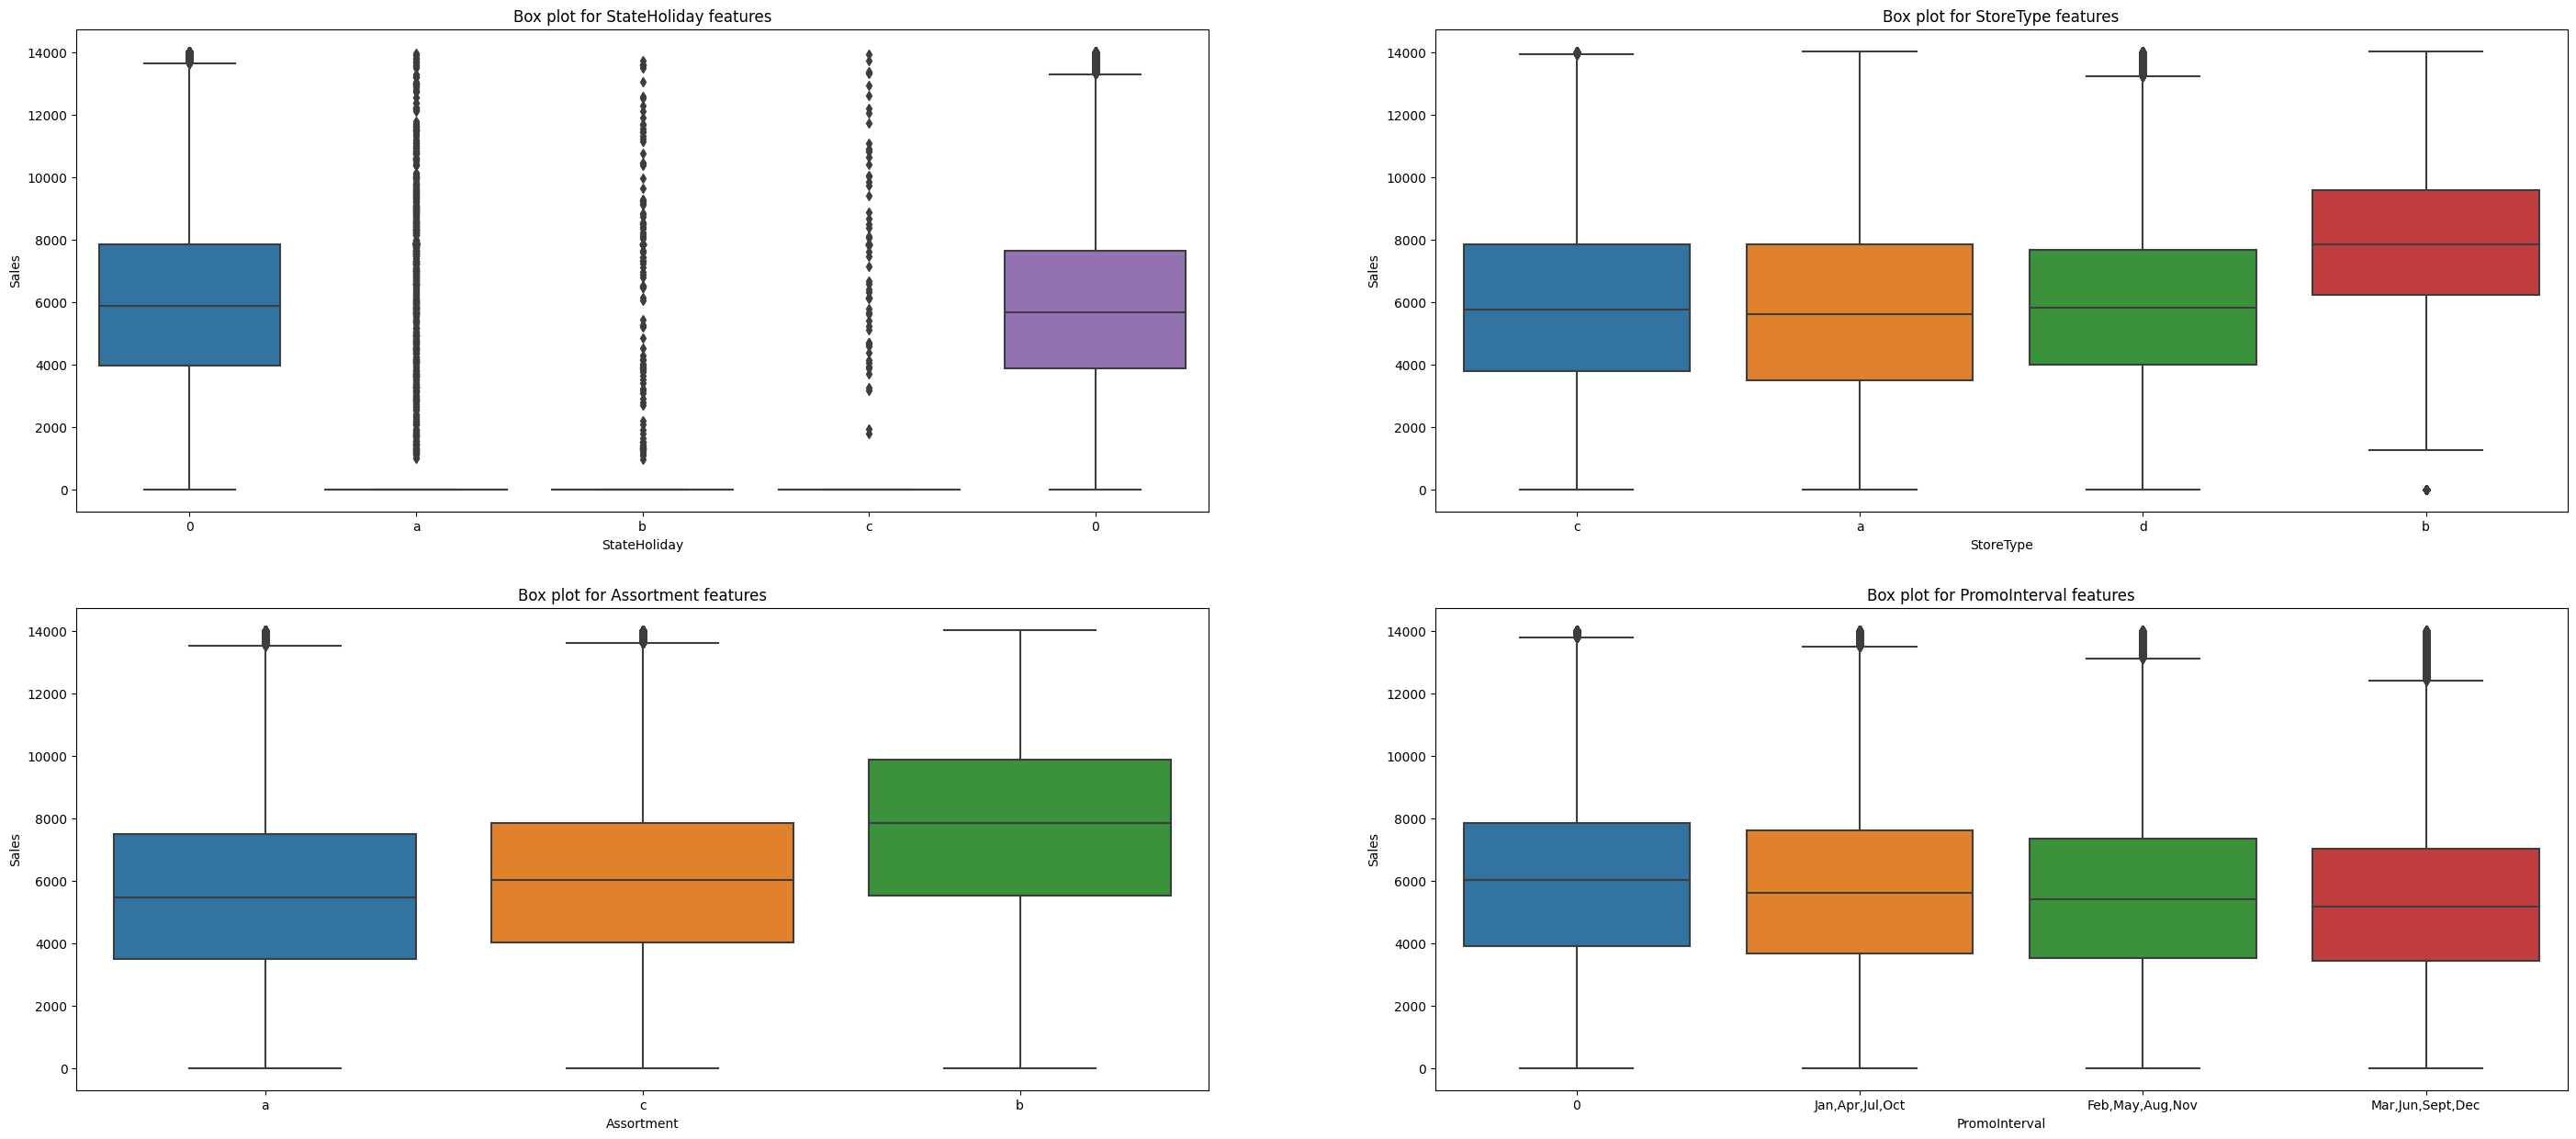

time: 3.3 s (started: 2023-06-06 14:54:45 +00:00)


In [ ]:
# Store the object data type into new list
object_datatype_features = ['StateHoliday','StoreType','Assortment','PromoInterval']
# Checking the outliers into each features
plt.figure(figsize = (35,15))
for index, column in enumerate(object_datatype_features):
  plt.subplot(2,2,index + 1)
  sns.boxplot(x = df[column],y = df['Sales'])
  plt.title(f'Box plot for {column} features')

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the category of object dtype features
for feature in object_datatype_features:
  print(f"Feature: {feature}")
  for index,column in enumerate(df[feature].unique().tolist()):
    print(f"{index+1}: Category: {column}")
    detect_outlier(df[df[feature]==column]["Sales"])
    print("\n")

Feature: StateHoliday
1: Category: 0
q1:3982.0,
,q2:5878.0,
,q3:7856.0
Lower Bound:-1829.0,
,Upper Bound:13667.0,
,iqr:3874.0
Length of outliers: 3112
Percentage of outliers: 0.36


2: Category: a
q1:0.0,
,q2:0.0,
,q3:0.0
Lower Bound:0.0,
,Upper Bound:0.0,
,iqr:0.0
Length of outliers: 694
Percentage of outliers: 3.43


3: Category: b
q1:0.0,
,q2:0.0,
,q3:0.0
Lower Bound:0.0,
,Upper Bound:0.0,
,iqr:0.0
Length of outliers: 145
Percentage of outliers: 2.17


4: Category: c
q1:0.0,
,q2:0.0,
,q3:0.0
Lower Bound:0.0,
,Upper Bound:0.0,
,iqr:0.0
Length of outliers: 71
Percentage of outliers: 1.73


5: Category: 0
q1:3874.0,
,q2:5674.0,
,q3:7650.25
Lower Bound:-1790.375,
,Upper Bound:13314.625,
,iqr:3776.25
Length of outliers: 773
Percentage of outliers: 0.59


Feature: StoreType
1: Category: c
q1:3789.0,
,q2:5766.0,
,q3:7849.0
Lower Bound:-2301.0,
,Upper Bound:13939.0,
,iqr:4060.0
Length of outliers: 124
Percentage of outliers: 0.09


2: Category: a
q1:3508.0,
,q2:5618.0,
,q3:7856.0
Lower Boun

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
# Create the object datatype list
object_datatype_features

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

time: 7.9 ms (started: 2023-06-06 14:55:10 +00:00)


In [ ]:
# Checking uniqe value of each object datatype which have to esential encoding of the categorical data
for i in object_datatype_features:
  print(i)
  print('The unique value are:',df[i].unique())
  print('The total number of unique value in',i,':',df[i].nunique())
  print('\n')

StateHoliday
The unique value are: ['0' 'a' 'b' 'c' 0]
The total number of unique value in StateHoliday : 5


StoreType
The unique value are: ['c' 'a' 'd' 'b']
The total number of unique value in StoreType : 4


Assortment
The unique value are: ['a' 'c' 'b']
The total number of unique value in Assortment : 3


PromoInterval
The unique value are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
The total number of unique value in PromoInterval : 4


time: 491 ms (started: 2023-06-06 14:55:10 +00:00)


In [ ]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

time: 712 ms (started: 2023-06-06 14:55:11 +00:00)


In [ ]:
# Checking uniqe value of each object datatype which have to esential encoding of the categorical data
for i in object_datatype_features:
  print(i)
  print('The unique value are:',df[i].unique())
  print('The total number of unique value in',i,':',df[i].nunique())
  print('\n')

StateHoliday
The unique value are: [0 1]
The total number of unique value in StateHoliday : 2


StoreType
The unique value are: ['c' 'a' 'd' 'b']
The total number of unique value in StoreType : 4


Assortment
The unique value are: ['a' 'c' 'b']
The total number of unique value in Assortment : 3


PromoInterval
The unique value are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
The total number of unique value in PromoInterval : 4


time: 412 ms (started: 2023-06-06 14:55:11 +00:00)


In [ ]:
# Create a copy of dataset to avoid the mistake in original dataset
dataset = df.copy()

time: 155 ms (started: 2023-06-06 14:55:12 +00:00)


In [ ]:
# Encode your categorical columns by dropping the first category
dataset= pd.get_dummies(df, dtype=int, drop_first=True)

time: 577 ms (started: 2023-06-06 14:55:12 +00:00)


In [ ]:
# code to see all the features
pd.set_option('display.max_columns', None)

time: 717 µs (started: 2023-06-06 14:55:13 +00:00)


In [ ]:
# let's see the dataset
dataset

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            1          4 2015-07-30   5020        546     1      1   
2            1          3 2015-07-29   4782        523     1      1   
3            1          2 2015-07-28   5011        560     1      1   
4            1          1 2015-07-27   6102        612     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1115          6 2013-01-05   4771        339     1      0   
1017205   1115          5 2013-01-04   4540        326     1      0   
1017206   1115          4 2013-01-03   4297        300     1      0   
1017207   1115          3 2013-01-02   3697        305     1      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  CompetitionDistance  \
0                   0              1                 1270   
1                   0              1                 1270   
2                   0              1                 1270   
3                   0              1                 1270   
4                   0              1                 1270   
...               ...            ...                  ...   
1017204             0              1                 5350   
1017205             0              1                 5350   
1017206             0              1                 5350   
1017207             0              1                 5350   
1017208             1              1                 5350   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                                9                      2008       0   
1                                9                      2008       0   
2                                9                      2008       0   
3                                9                      2008       0   
4                                9                      2008       0   
...                            ...                       ...     ...   
1017204                          9                      2013       1   
1017205                          9                      2013       1   
1017206                          9                      2013       1   
1017207                          9                      2013       1   
1017208                          9                      2013       1   

         Promo2SinceWeek  Promo2SinceYear  StoreType_b  StoreType_c  \
0                      0                0            0            1   
1                      0                0            0            1   
2                      0                0            0            1   
3                      0                0            0            1   
4                      0                0            0            1   
...                  ...              ...          ...          ...   
1017204               22             2012            0            0   
1017205               22             2012            0            0   
1017206               22             2012            0            0   
1017207               22             2012            0            0   
1017208               22             2012            0            0   

         StoreType_d  Assortment_b  Assortment_c  \
0                  0             0             0   
1                  0             0             0   
2                  0             0             0   
3                  0             0             0   
4                  0             0             0   
...              ...           ...           ...   
1017204            1             0             1   
1017205            1             0             1   
1017206            1             0             1   
1017207            1             0             1   
1017208            1             0             1   

         PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0      

time: 33.6 ms (started: 2023-06-06 14:55:13 +00:00)


In [ ]:
# Information of copy dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Checking the first five dataset to handle this
dataset.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   
2      1          3 2015-07-29   4782        523     1      1             0   
3      1          2 2015-07-28   5011        560     1      1             0   
4      1          1 2015-07-27   6102        612     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2008       0                0                0   
2                      2008       0                0                0   
3                      2008       0                0                0   
4                      2008       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

time: 20.1 ms (started: 2023-06-06 14:55:35 +00:00)


In [ ]:
# Extract the year, month, day, and week from Date features
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Week'] = dataset['Date'].dt.week
dataset['Day'] = dataset['Date'].dt.day

<ipython-input-162-8874c7eba903>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['Week'] = dataset['Date'].dt.week


time: 712 ms (started: 2023-06-06 14:55:40 +00:00)


We have to derive two feature from the dataset which is:\
1. **CompetitionDuration :** It gives the information about the duration of the two store competition and gives the CompetitionDuration in months from that dataset.
2. **PromoDuration :** It gives the information about the duration of the store which is involve in promotion and duration compling in months from that dataset.

In [ ]:
# Calculation of CompetitionDuration
dataset['CompetitionDuration'] = (dataset['Year'] - dataset['CompetitionOpenSinceYear'])*12 + (dataset['Month'] - dataset['CompetitionOpenSinceMonth'])
dataset["CompetitionDuration"] = dataset["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

time: 427 ms (started: 2023-06-06 14:55:40 +00:00)


In [ ]:
# Calculation of PromoDuration
dataset['PromoDuration'] = (dataset['Year'] - dataset['Promo2SinceYear'])*12 + (dataset['Week'] - dataset['Promo2SinceWeek'])*(7*12/365)
dataset['PromoDuration'] = dataset['PromoDuration'].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

time: 456 ms (started: 2023-06-06 14:55:41 +00:00)


In [ ]:
# After manipulation check the top 5 data
dataset.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   
2      1          3 2015-07-29   4782        523     1      1             0   
3      1          2 2015-07-28   5011        560     1      1             0   
4      1          1 2015-07-27   6102        612     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2008       0                0                0   
2                      2008       0                0                0   
3                      2008       0                0                0   
4                      2008       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Year  Month  Week  Day  \
0                               0  2015      7    31   31   
1                               0  2015      7    31   30   
2                               0  2015      7    31   29   
3                               0  2015      7    31   28   
4                               0  2015      7    31   27   

   CompetitionDuration  PromoDuration  
0                   82          24187  
1                   82          24187  
2                   82          24187  
3                   82          24187  
4                   82          24187

time: 19.6 ms (started: 2023-06-06 14:55:41 +00:00)


We have noticed that some of the observations in "Open" are 0 that means store are closed. This maybe due to store refurbishment. So there is very high possibility that our model create biasness towards zero sales(since store is closed there won't be any sale). We have mutually decided to drop those observations where store is closed so that we can tackle the real world senario without any biasness.

In [ ]:
# Drop the observation where store is closed
dataset.drop(dataset[((dataset.Open==1) | (dataset.Open ==0))].index)

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, StoreType_b, StoreType_c, StoreType_d, Assortment_b, Assortment_c, PromoInterval_Feb,May,Aug,Nov, PromoInterval_Jan,Apr,Jul,Oct, PromoInterval_Mar,Jun,Sept,Dec, Year, Month, Week, Day, CompetitionDuration, PromoDuration]
Index: []

time: 265 ms (started: 2023-06-06 14:55:41 +00:00)


Now we have the observations where "Open"=1 OR "Store is open". Its wont show any corelation with any other feature. So, its better to drop that feature here only.

In [ ]:
# Dropping Open feature from dataset
dataset.drop(columns = ['Open'], inplace = True)

time: 54.6 ms (started: 2023-06-06 14:55:42 +00:00)


In [ ]:
# After manipulation first view of the dataset:
dataset

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0            1          5 2015-07-31   5263        555      1             0   
1            1          4 2015-07-30   5020        546      1             0   
2            1          3 2015-07-29   4782        523      1             0   
3            1          2 2015-07-28   5011        560      1             0   
4            1          1 2015-07-27   6102        612      1             0   
...        ...        ...        ...    ...        ...    ...           ...   
1017204   1115          6 2013-01-05   4771        339      0             0   
1017205   1115          5 2013-01-04   4540        326      0             0   
1017206   1115          4 2013-01-03   4297        300      0             0   
1017207   1115          3 2013-01-02   3697        305      0             0   
1017208   1115          2 2013-01-01      0          0      0             1   

         SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0                    1                 1270                          9   
1                    1                 1270                          9   
2                    1                 1270                          9   
3                    1                 1270                          9   
4                    1                 1270                          9   
...                ...                  ...                        ...   
1017204              1                 5350                          9   
1017205              1                 5350                          9   
1017206              1                 5350                          9   
1017207              1                 5350                          9   
1017208              1                 5350                          9   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                            2008       0                0                0   
1                            2008       0                0                0   
2                            2008       0                0                0   
3                            2008       0                0                0   
4                            2008       0                0                0   
...                           ...     ...              ...              ...   
1017204                      2013       1               22             2012   
1017205                      2013       1               22             2012   
1017206                      2013       1               22             2012   
1017207                      2013       1               22             2012   
1017208                      2013       1               22             2012   

         StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0                  0            1            0             0             0   
1                  0            1            0             0             0   
2                  0            1            0             0             0   
3                  0            1            0             0             0   
4                  0            1            0             0             0   
...              ...          ...          ...           ...           ...   
1017204            0            0            1             0             1   
1017205            0            0            1             0             1   
1017206            0            0            1             0             1   
1017207            0            0            1             0             1   
1017208            0            0            1             0             1   

         PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                                    0                              0   
1                                    0                              0   
2                                    0                            

time: 20.9 ms (started: 2023-06-06 14:55:42 +00:00)


#### 2. Feature Selection

In [ ]:
# Find the dataset informanation 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 28 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Promo                           1017209 non-null  int64         
 6   StateHoliday                    1017209 non-null  int64         
 7   SchoolHoliday                   1017209 non-null  int64         
 8   CompetitionDistance             1017209 non-null  int64         
 9   CompetitionOpenSinceMonth       1017209 non-null  int64         
 10  CompetitionOpenSinceYear        1017209 no

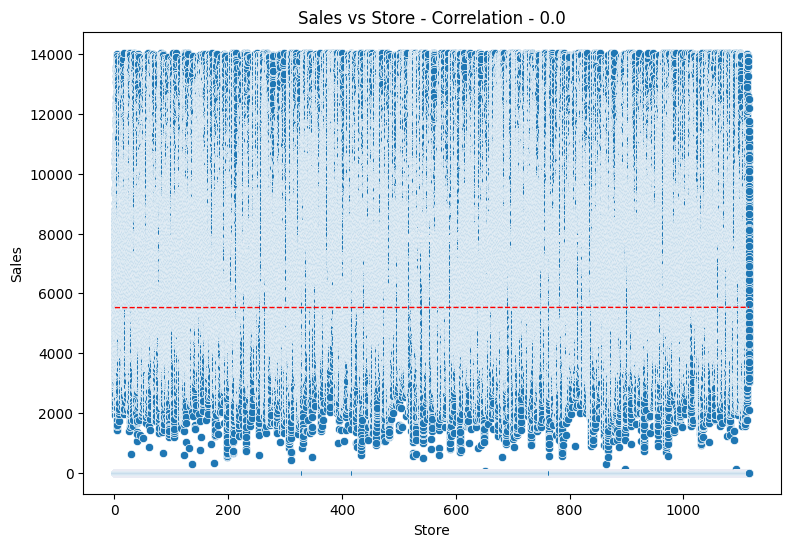

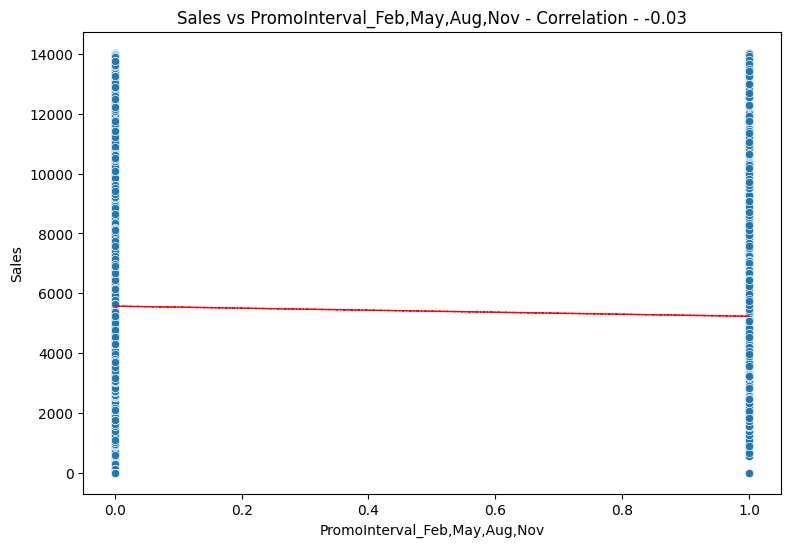

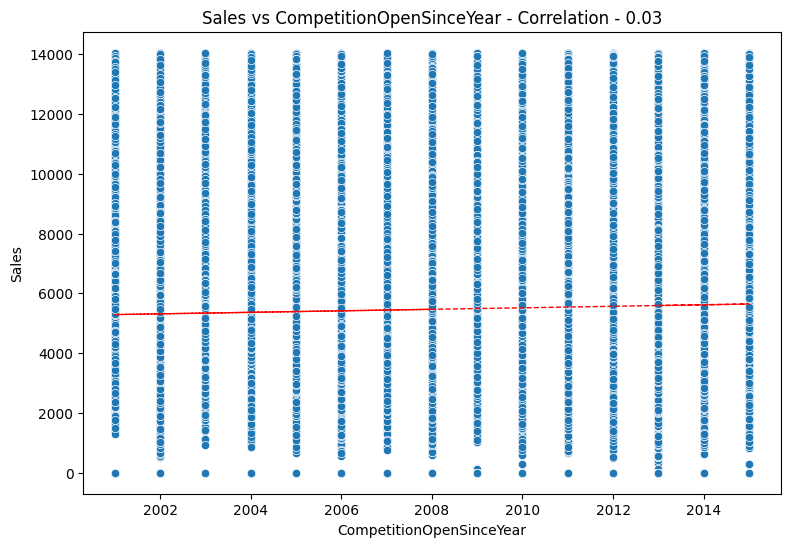

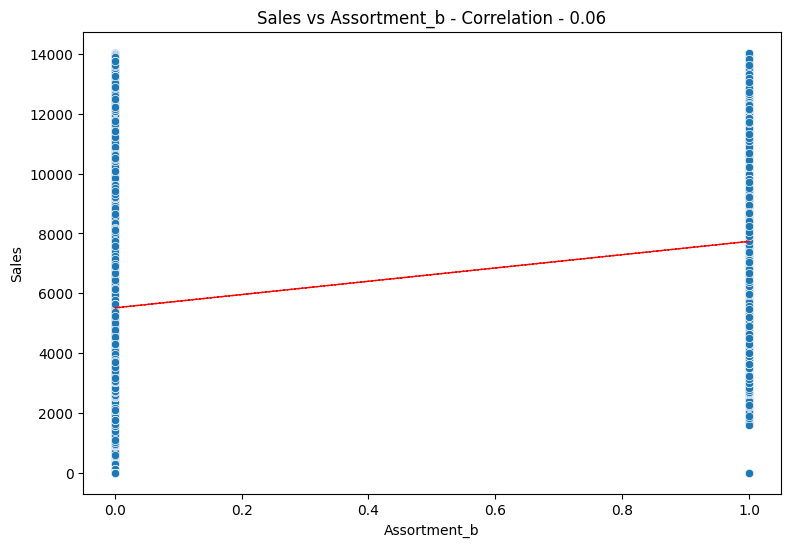

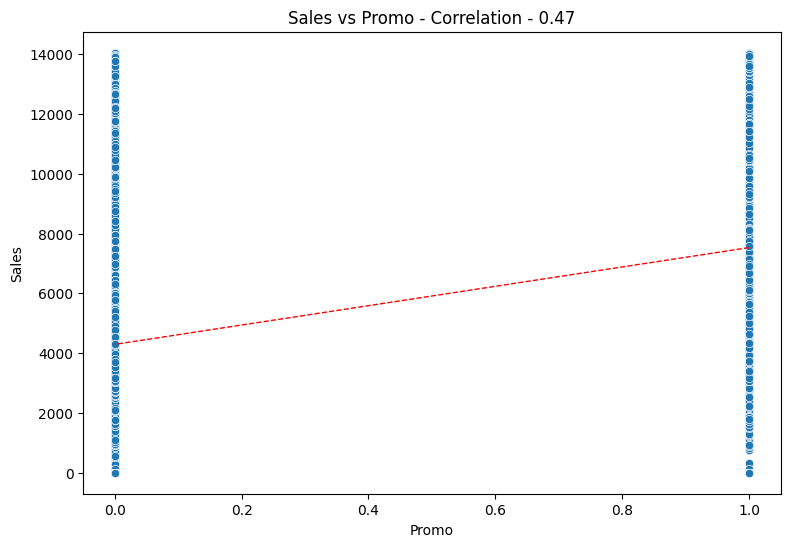

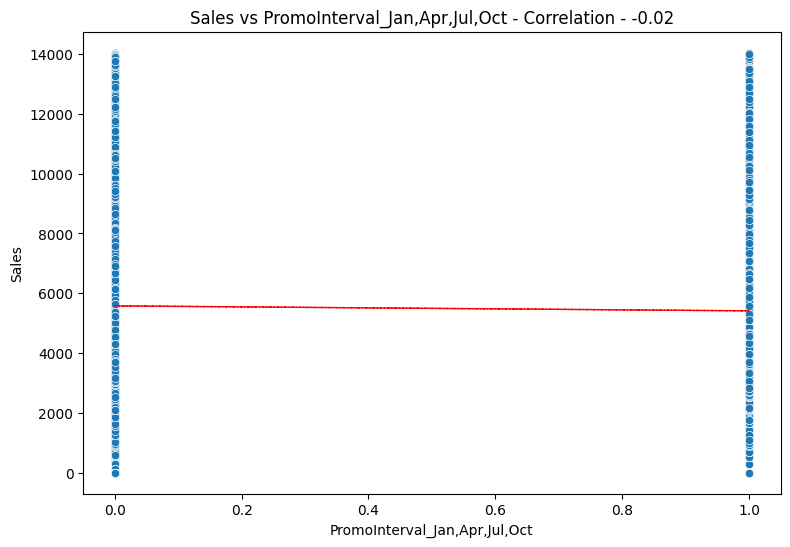

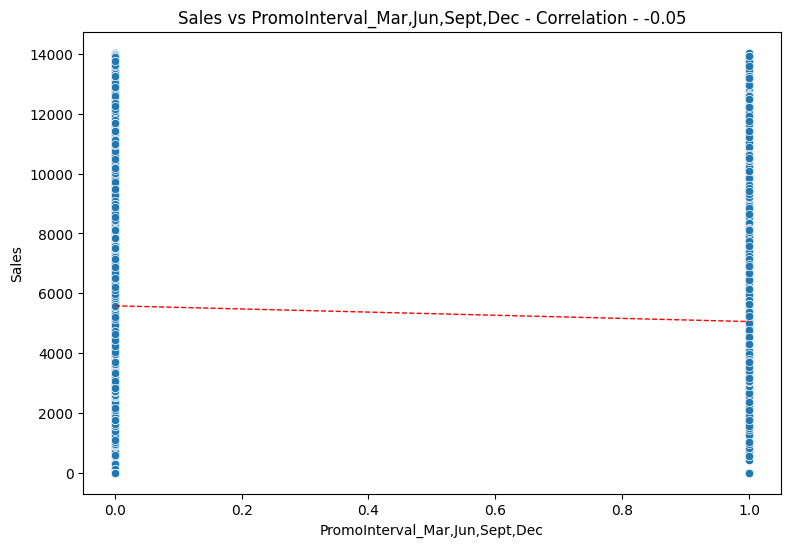

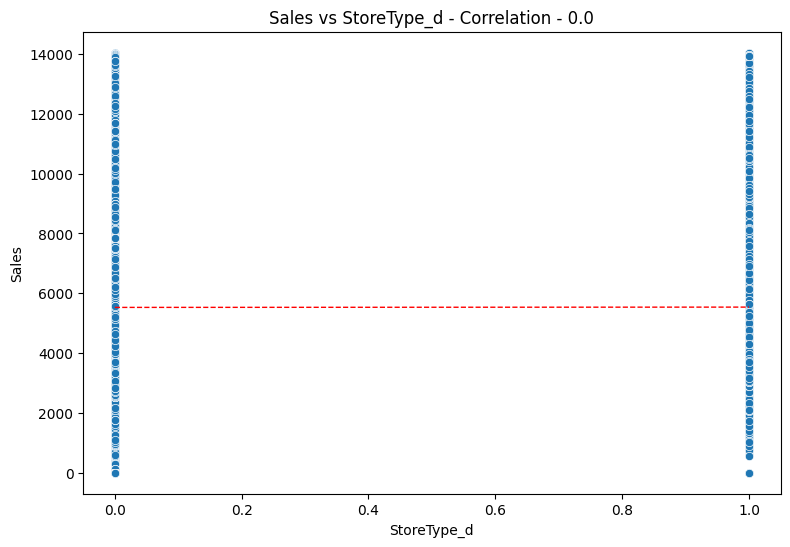

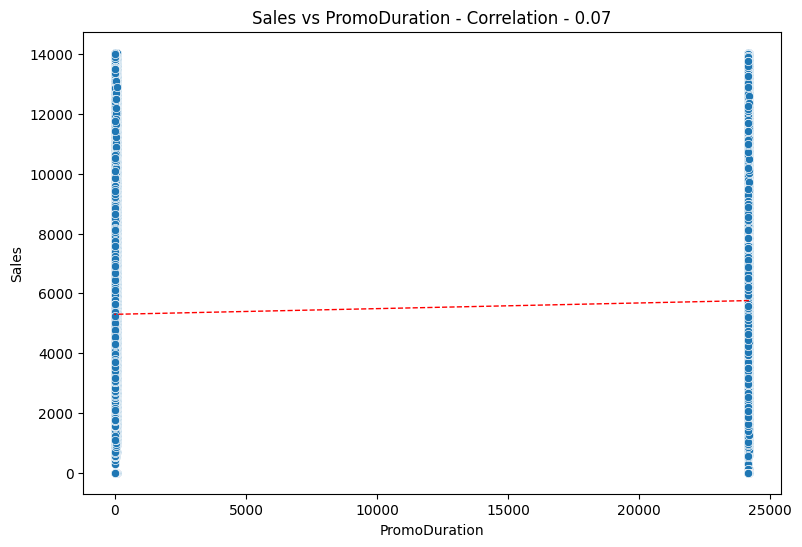

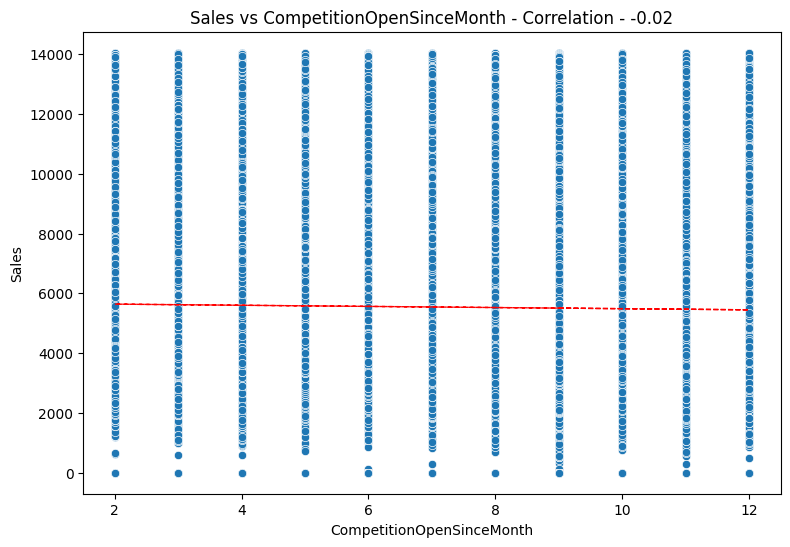

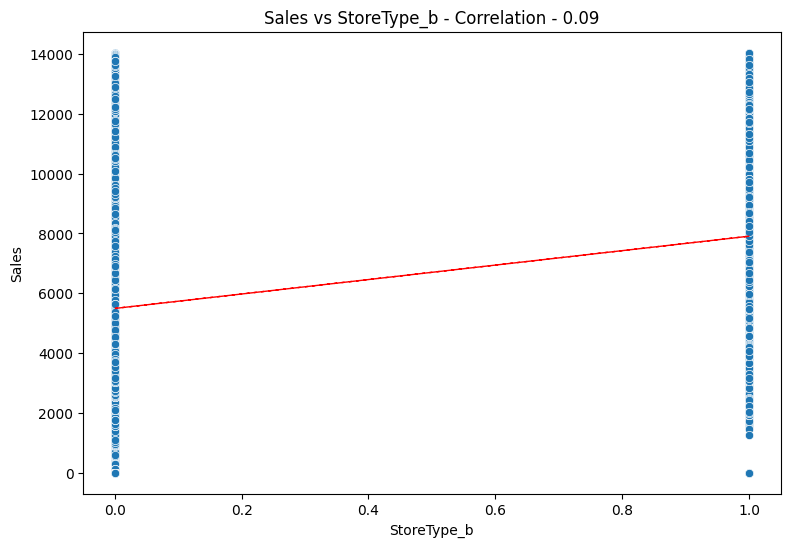

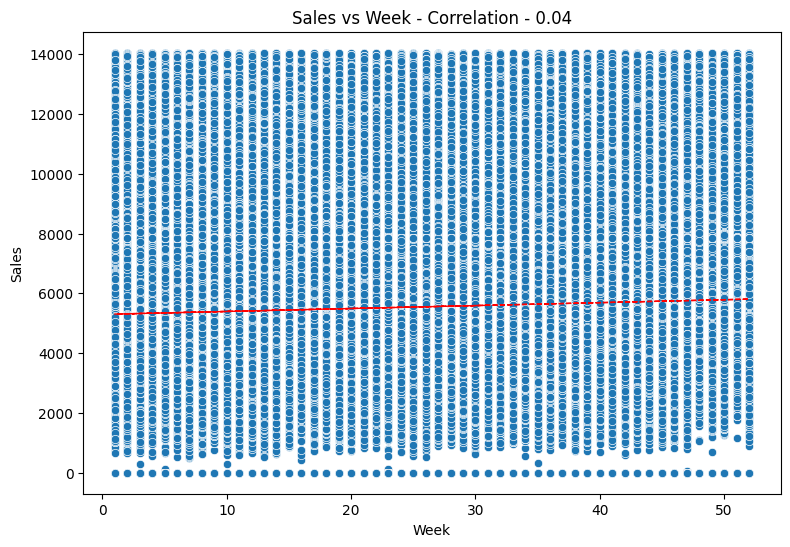

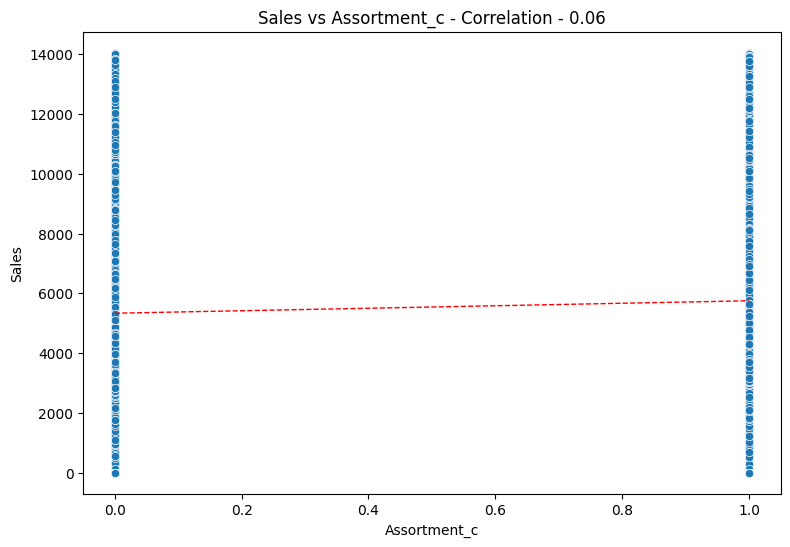

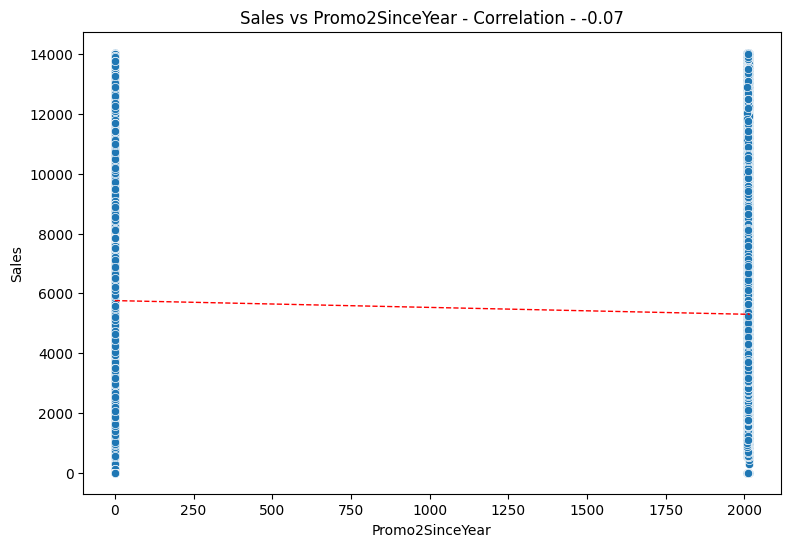

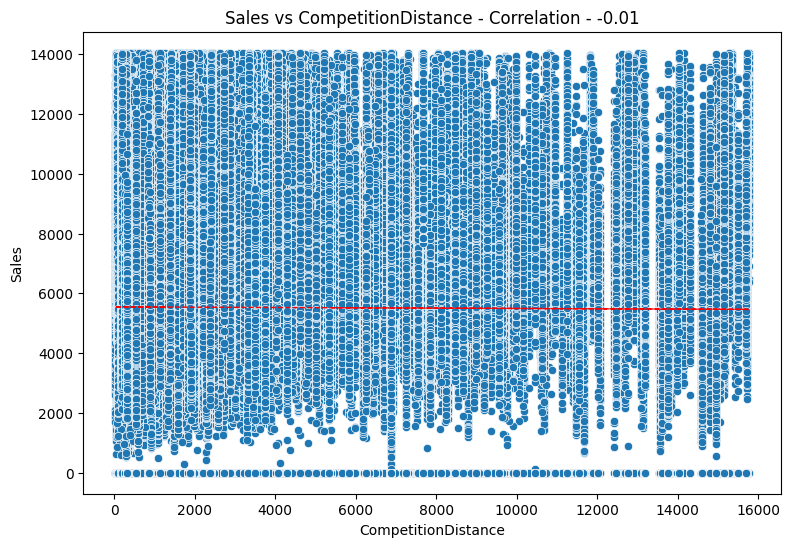

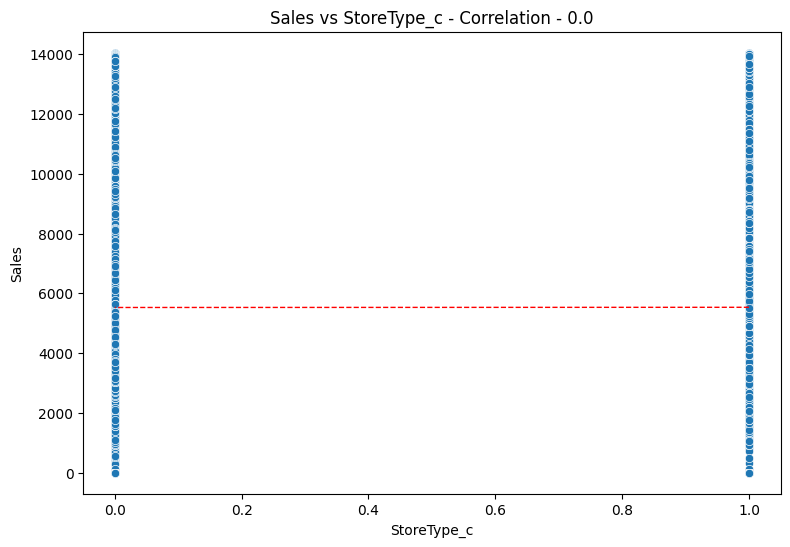

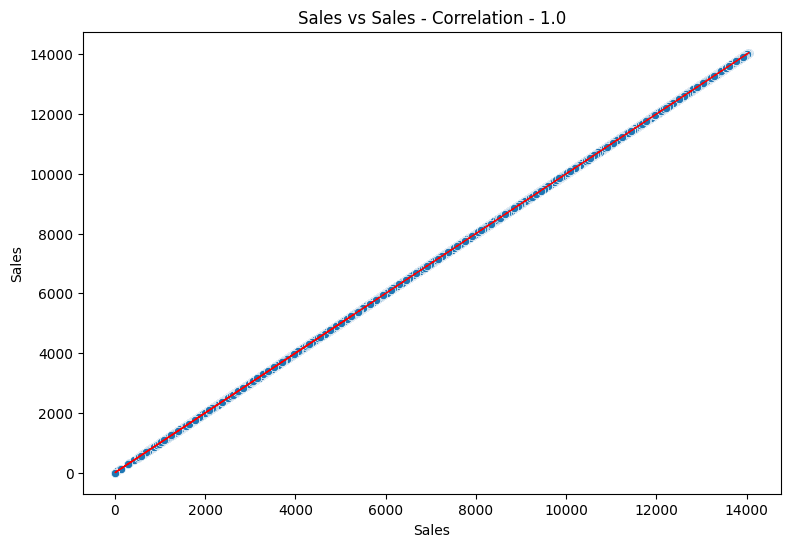

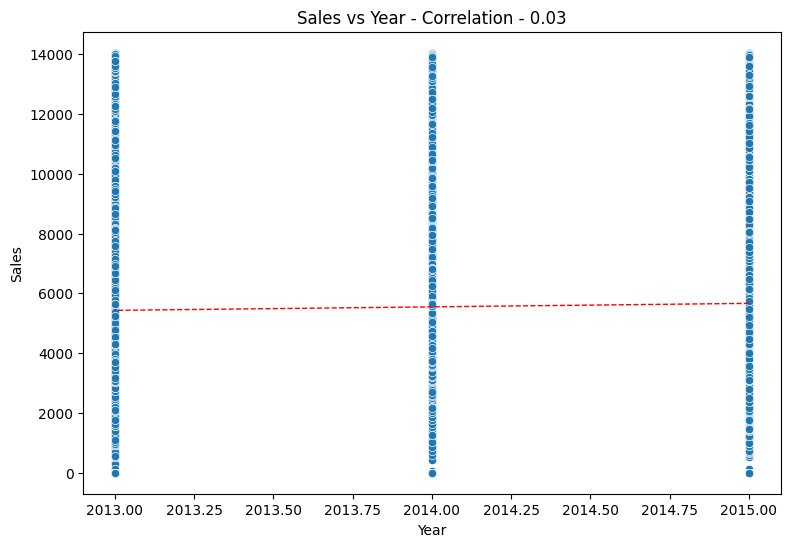

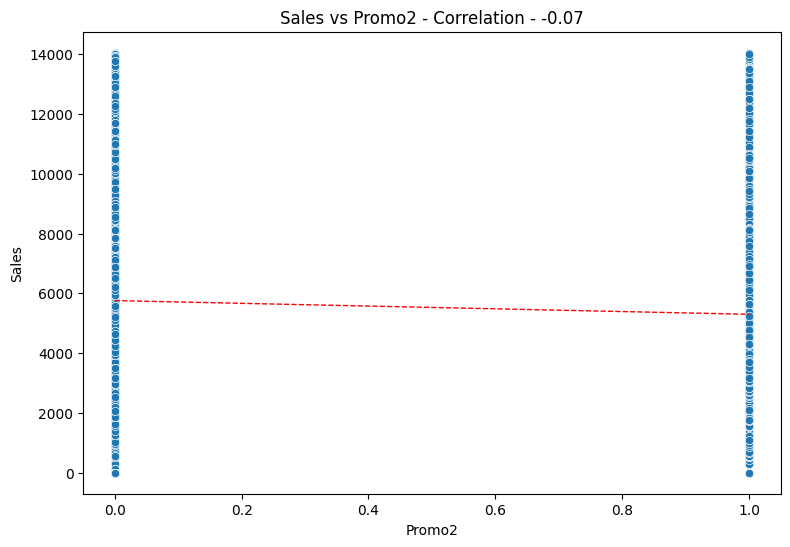

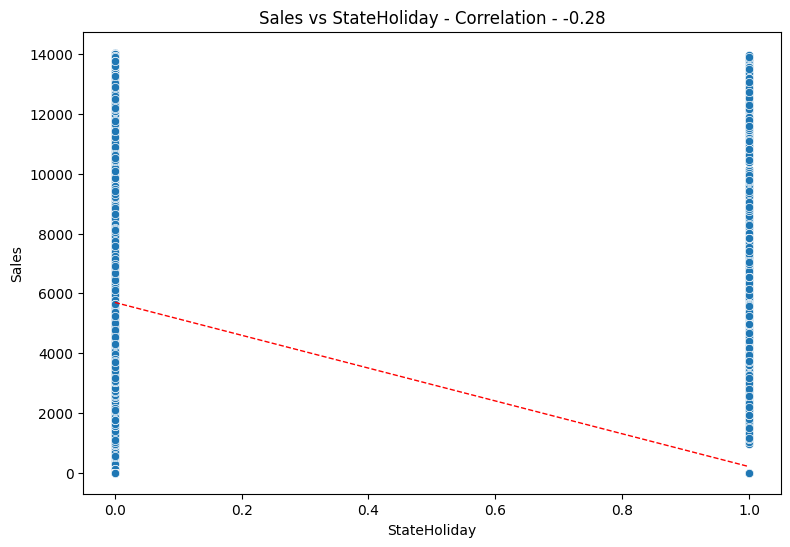

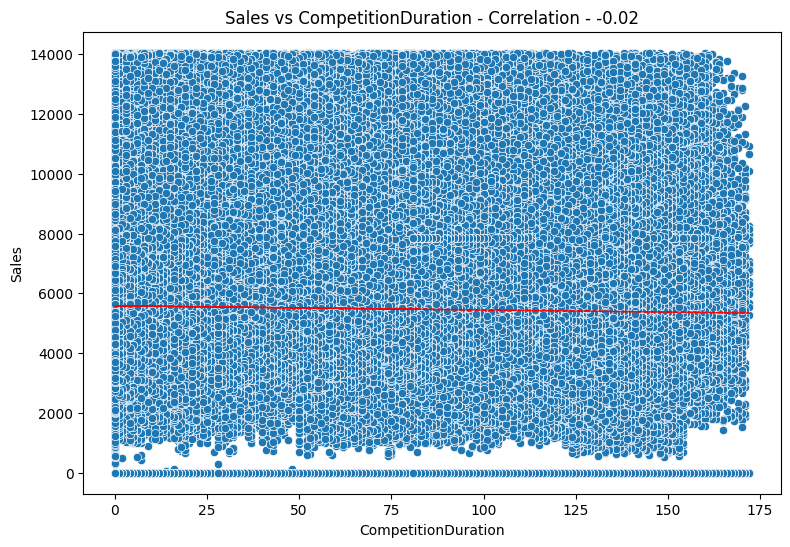

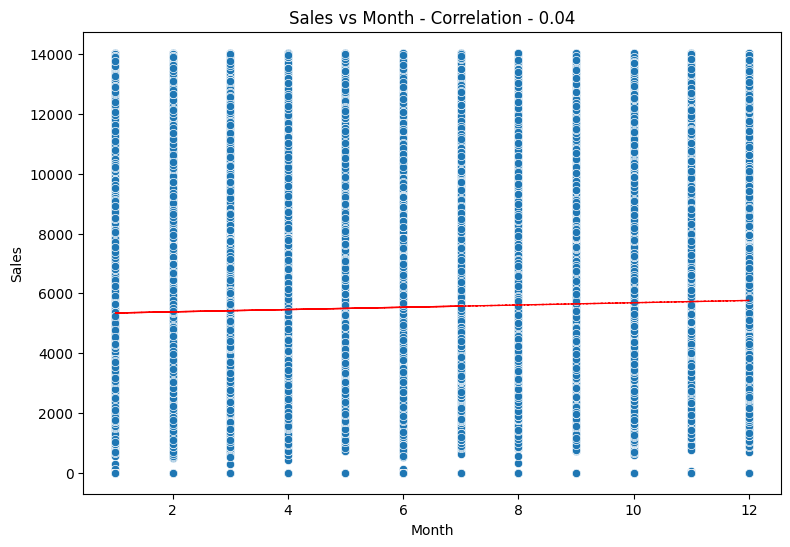

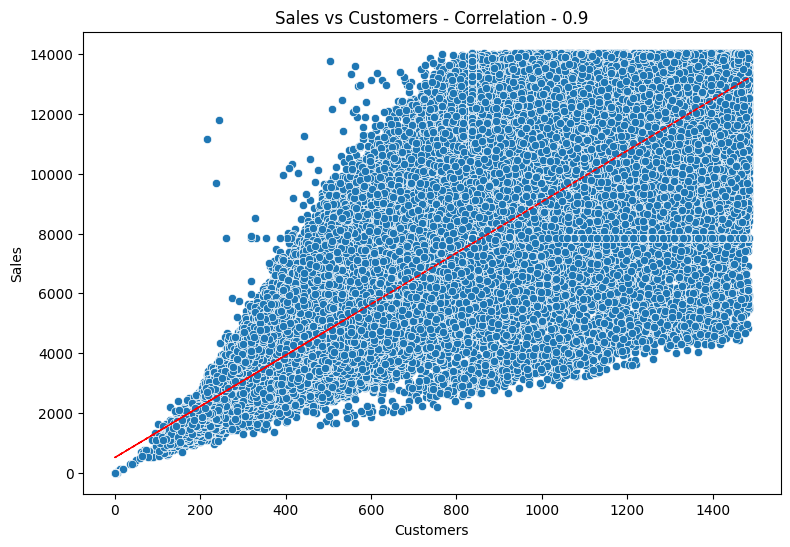

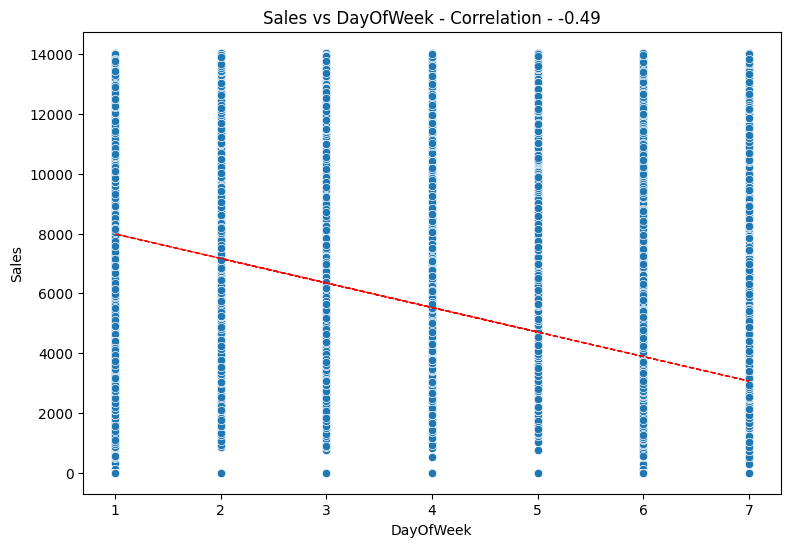

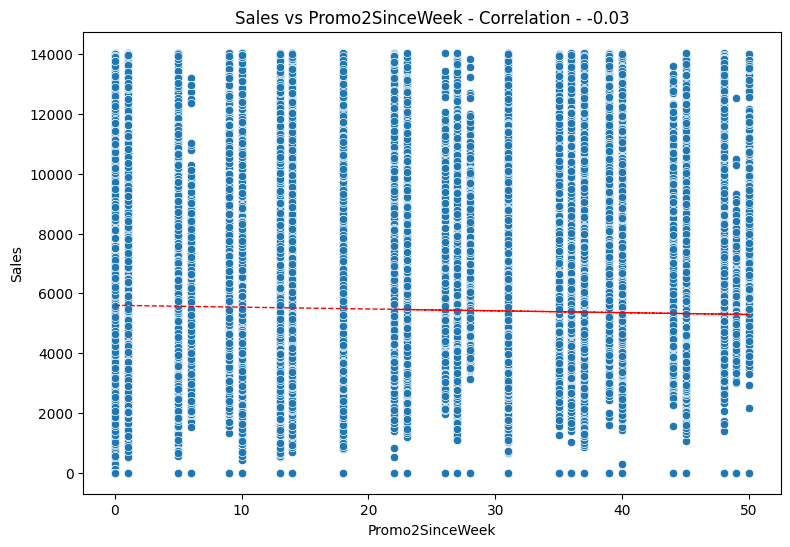

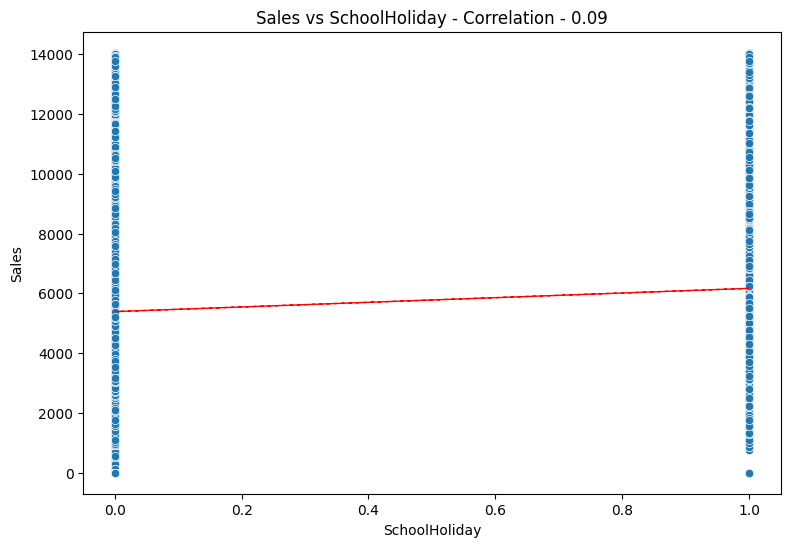

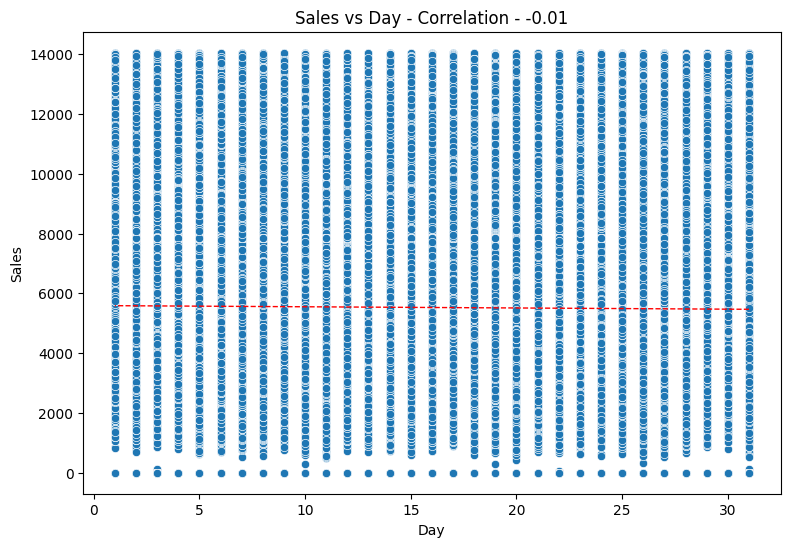

time: 1min 18s (started: 2023-06-06 14:55:51 +00:00)


In [ ]:
# Let's see how to relation between sales and other features
for col in list(set(dataset.columns.tolist()) - {'Date'}):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Sales']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.title('Sales vs '+col+' - Correlation - ' + str(round(correlation,2)))
    z = np.polyfit(dataset[col], dataset['Sales'], 1)
    y_hat = np.poly1d(z)(dataset[col])
    plt.plot(dataset[col], y_hat, "r--", lw=1)
    plt.show()

<ipython-input-171-a0f22a037027>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(round(dataset.corr(),2)), annot = True, cmap= plt.cm.CMRmap)


<Axes: >

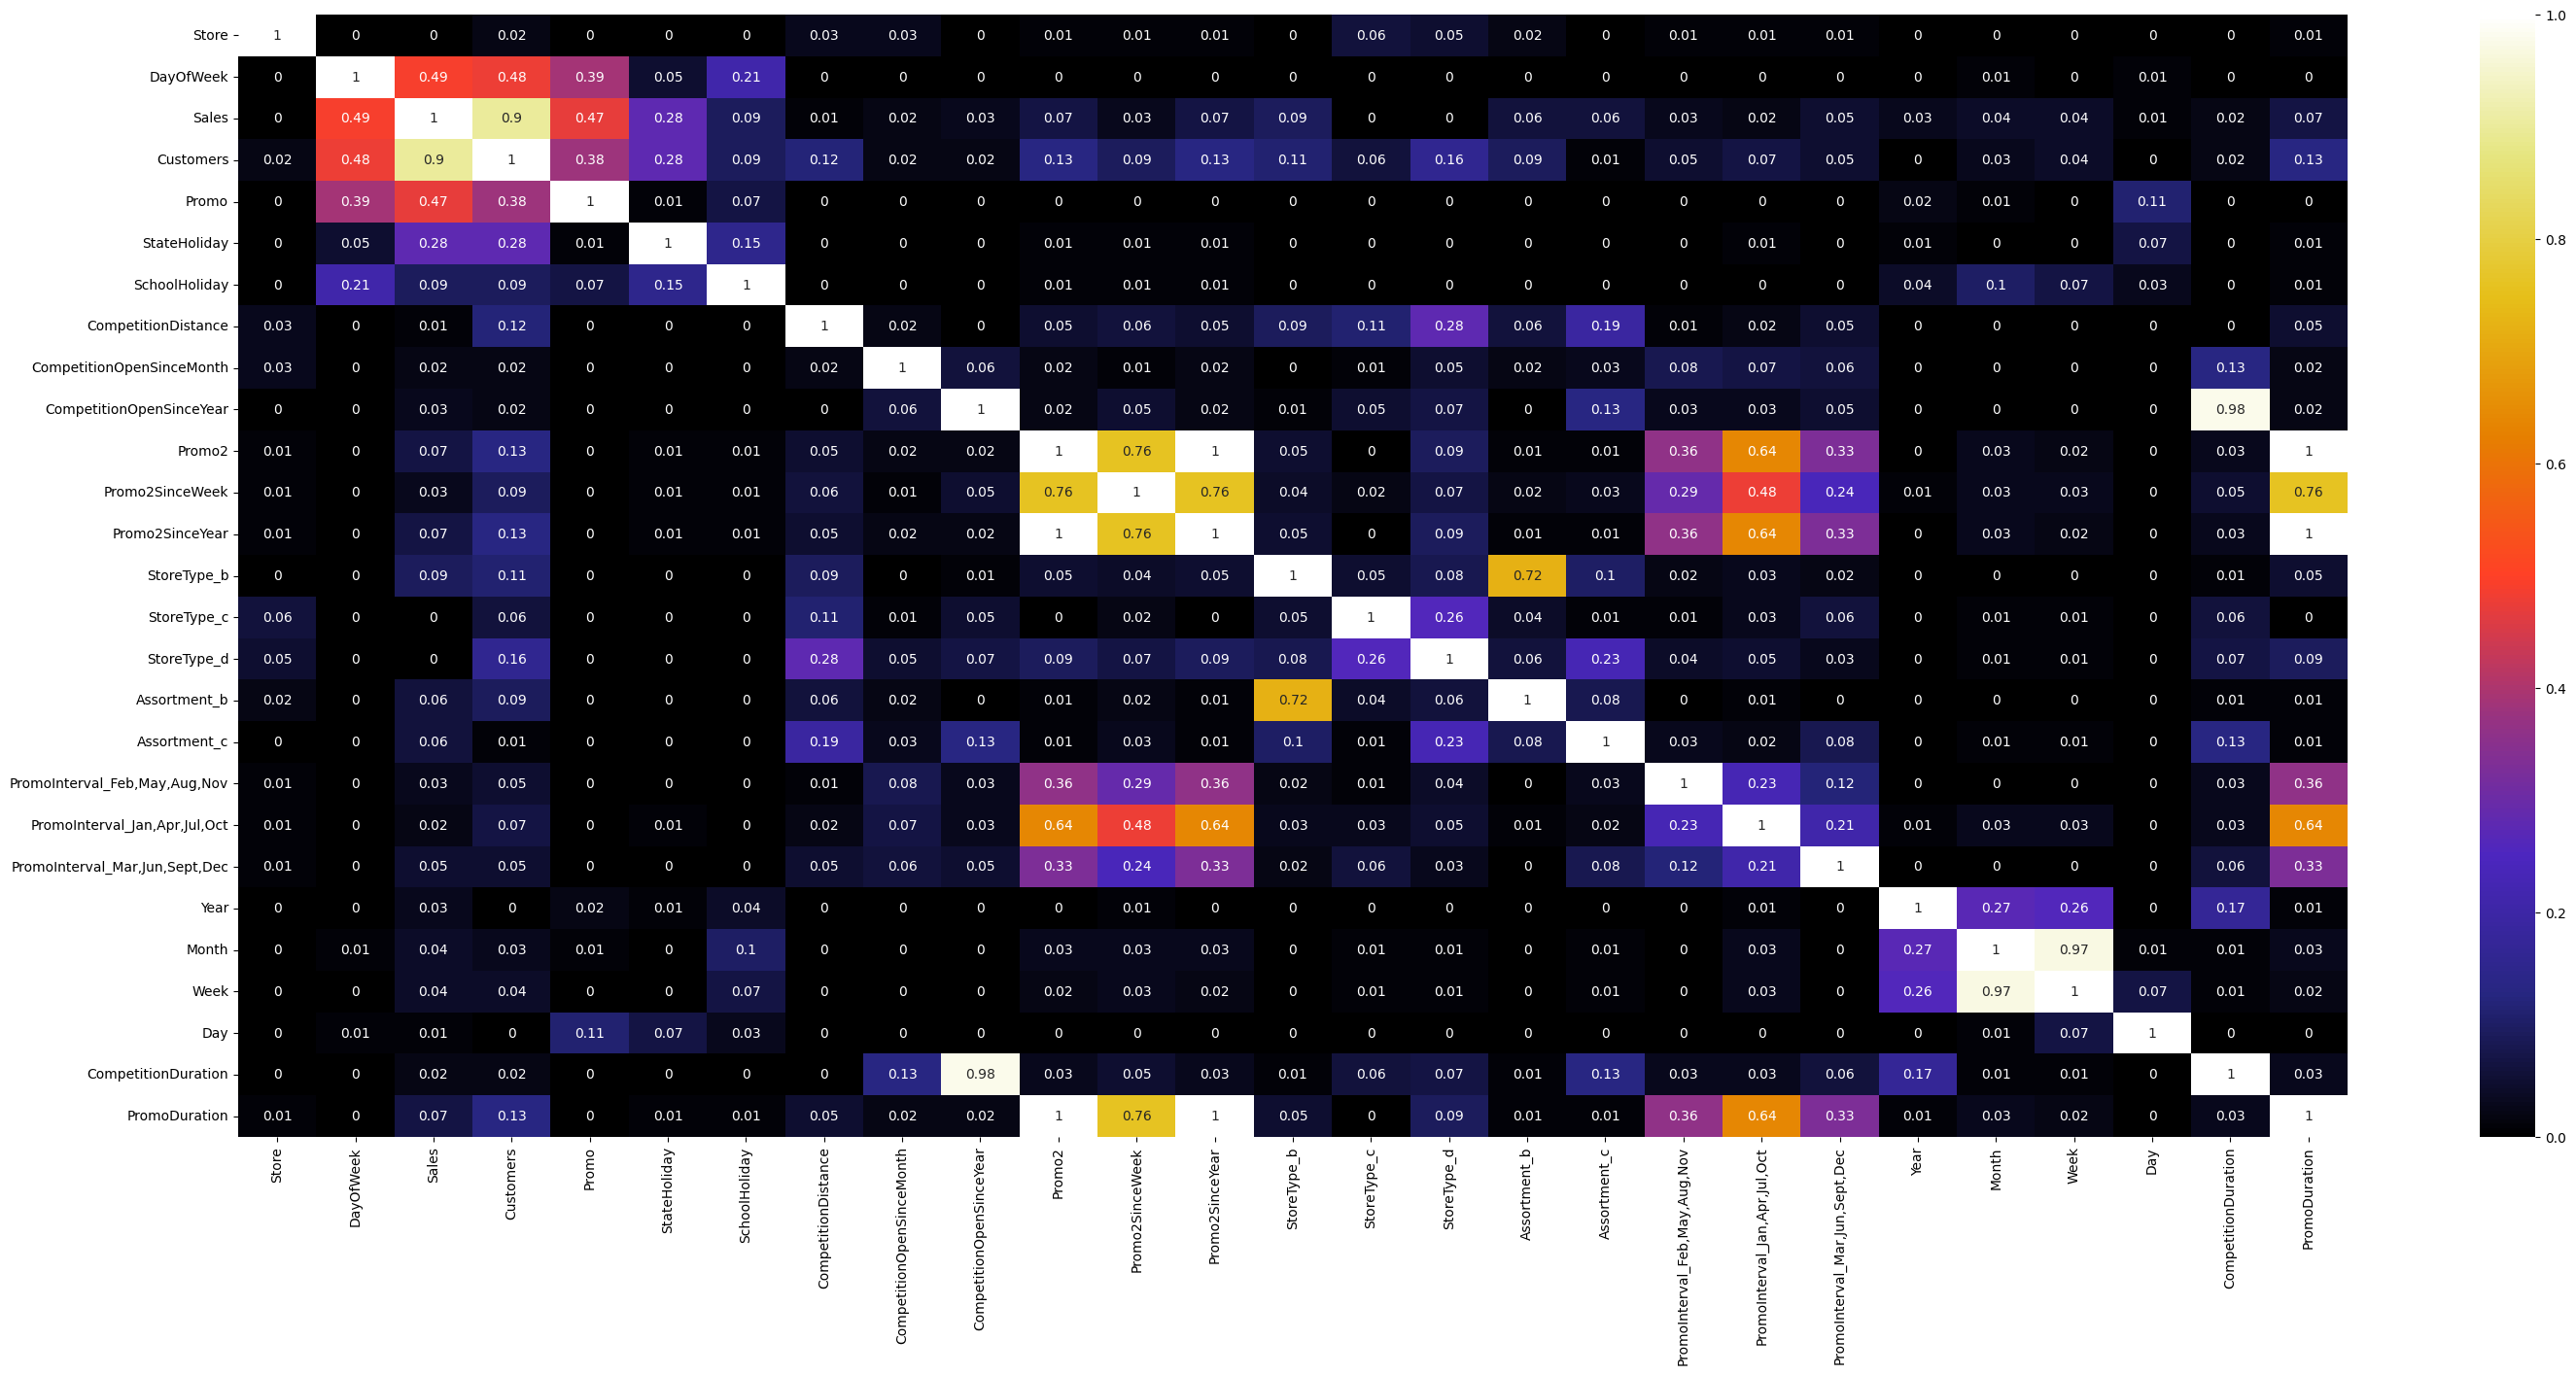

time: 5.81 s (started: 2023-06-06 14:57:10 +00:00)


In [ ]:
# Select your features wisely to avoid overfitting
plt.figure(figsize = (35,15))
sns.heatmap(abs(round(dataset.corr(),2)), annot = True, cmap= plt.cm.CMRmap)

In [ ]:
# Defining the function variance_inflation_factor
def vif_function(data):
  vif = pd.DataFrame()
  vif['var'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif

time: 963 µs (started: 2023-06-06 14:57:16 +00:00)


In [ ]:
# calculating the vif by excluding some features
vif_function(dataset[[i for i in dataset.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week"]]])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


var        VIF
0                        DayOfWeek   7.553255
1                        Customers   6.512568
2                            Promo   2.069717
3                     StateHoliday   1.229283
4                    SchoolHoliday   1.301592
5              CompetitionDistance   2.297458
6                           Promo2        inf
7                      StoreType_b   2.160154
8                      StoreType_c   1.269225
9                      StoreType_d   1.811382
10                    Assortment_b   2.105316
11                    Assortment_c   2.088133
12   PromoInterval_Feb,May,Aug,Nov        inf
13   PromoInterval_Jan,Apr,Jul,Oct        inf
14  PromoInterval_Mar,Jun,Sept,Dec        inf
15                             Day   4.278817
16             CompetitionDuration   1.935565
17                   PromoDuration  14.224978

time: 1min 10s (started: 2023-06-06 14:57:16 +00:00)


In [ ]:
# calculating the vif by excluding some features
vif_function(dataset[[i for i in dataset.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct"]]])

var        VIF
0                        DayOfWeek   7.553255
1                        Customers   6.512568
2                            Promo   2.069717
3                     StateHoliday   1.229283
4                    SchoolHoliday   1.301592
5              CompetitionDistance   2.297458
6                           Promo2  14.033461
7                      StoreType_b   2.160154
8                      StoreType_c   1.269225
9                      StoreType_d   1.811382
10                    Assortment_b   2.105316
11                    Assortment_c   2.088133
12   PromoInterval_Feb,May,Aug,Nov   1.407796
13  PromoInterval_Mar,Jun,Sept,Dec   1.352997
14                             Day   4.278817
15             CompetitionDuration   1.935565
16                   PromoDuration  14.224978

time: 1min 21s (started: 2023-06-06 14:58:26 +00:00)


In [ ]:
# calculating the vif by excluding some features
vif_function(dataset[[i for i in dataset.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b"]]])

var        VIF
0                        DayOfWeek   7.552950
1                        Customers   6.511099
2                            Promo   2.069688
3                     StateHoliday   1.229221
4                    SchoolHoliday   1.301589
5              CompetitionDistance   2.297148
6                           Promo2  14.033277
7                      StoreType_b   1.058555
8                      StoreType_c   1.269225
9                      StoreType_d   1.811382
10                    Assortment_c   2.087484
11   PromoInterval_Feb,May,Aug,Nov   1.407625
12  PromoInterval_Mar,Jun,Sept,Dec   1.352798
13                             Day   4.278817
14             CompetitionDuration   1.935556
15                   PromoDuration  14.221401

time: 52.5 s (started: 2023-06-06 14:59:48 +00:00)


In [ ]:
# New Dataframe which will be our final dataframe
final_dataset = dataset[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration","PromoDuration","Sales"]]

time: 42.7 ms (started: 2023-06-06 15:00:40 +00:00)


In [ ]:
# Informanation of the final dataset
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   DayOfWeek                       1017209 non-null  int64
 1   Customers                       1017209 non-null  int64
 2   Promo                           1017209 non-null  int64
 3   StateHoliday                    1017209 non-null  int64
 4   SchoolHoliday                   1017209 non-null  int64
 5   CompetitionDistance             1017209 non-null  int64
 6   Promo2                          1017209 non-null  int64
 7   StoreType_b                     1017209 non-null  int64
 8   StoreType_c                     1017209 non-null  int64
 9   StoreType_d                     1017209 non-null  int64
 10  Assortment_c                    1017209 non-null  int64
 11  PromoInterval_Feb,May,Aug,Nov   1017209 non-null  int64
 12  PromoInterval_Mar,Jun,Sept,D

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Checking the variable
for i in final_dataset.columns:
  print(f'The number of unique counts in {i} is: {final_dataset[i].nunique()}')

The number of unique counts in DayOfWeek is: 7
The number of unique counts in Customers is: 1424
The number of unique counts in Promo is: 2
The number of unique counts in StateHoliday is: 2
The number of unique counts in SchoolHoliday is: 2
The number of unique counts in CompetitionDistance is: 555
The number of unique counts in Promo2 is: 2
The number of unique counts in StoreType_b is: 2
The number of unique counts in StoreType_c is: 2
The number of unique counts in StoreType_d is: 2
The number of unique counts in Assortment_c is: 2
The number of unique counts in PromoInterval_Feb,May,Aug,Nov is: 2
The number of unique counts in PromoInterval_Mar,Jun,Sept,Dec is: 2
The number of unique counts in Day is: 31
The number of unique counts in CompetitionDuration is: 173
The number of unique counts in PromoDuration is: 105
The number of unique counts in Sales is: 13194
time: 122 ms (started: 2023-06-06 15:00:59 +00:00)


Before applying the transformation


<ipython-input-179-9c860056291e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_dataset[column])
<ipython-input-179-9c860056291e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_dataset[column])
<ipython-input-179-9c860056291e>:8: UserWarning: 

`distplot` is a deprecated function

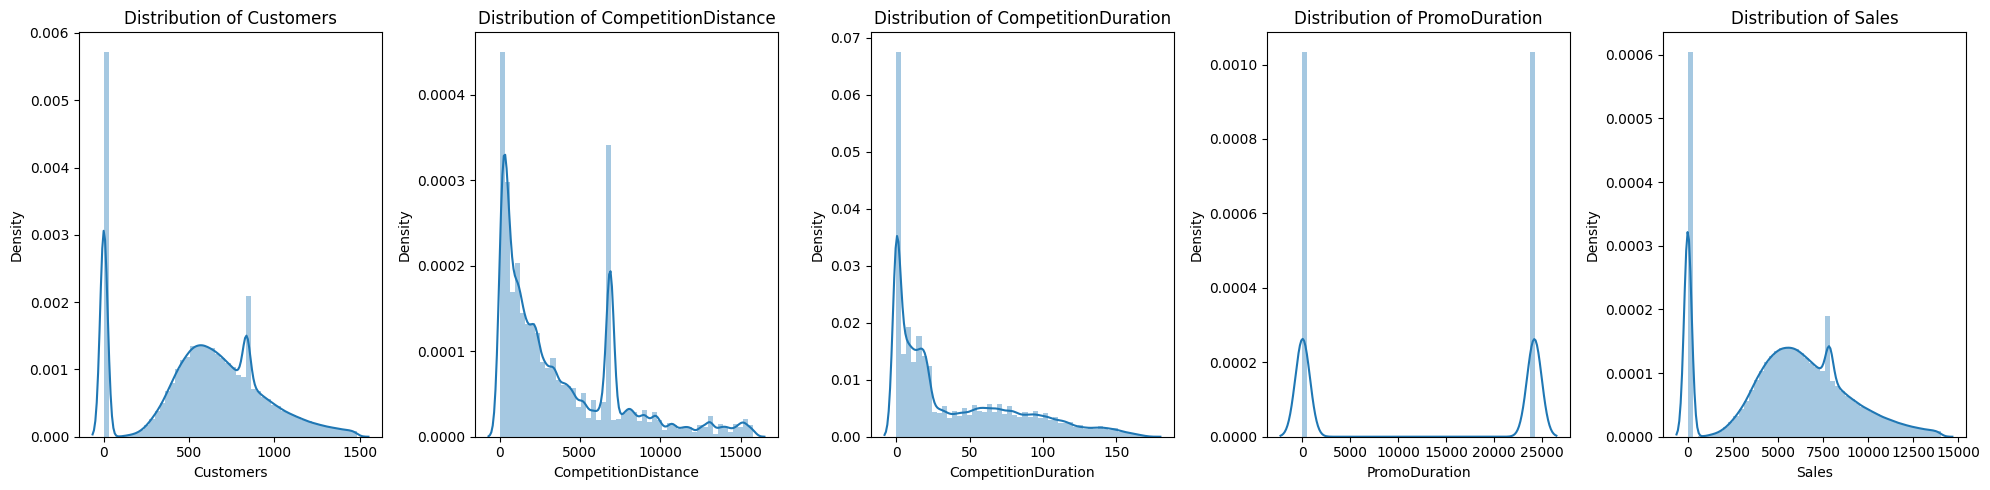

time: 26.9 s (started: 2023-06-06 15:01:01 +00:00)


In [ ]:
# define the continuous feature (which unique value greater than 100)
continuous_features = ['Customers','CompetitionDistance','CompetitionDuration','PromoDuration','Sales']
# Checking the distribution of each continuous feature
plt.figure(figsize= (20,5))
print('Before applying the transformation')
for index,column in enumerate(continuous_features):
  plt.subplot(1,5,index+1)
  sns.distplot(final_dataset[column])
  plt.title(f'Distribution of {column}')
  plt.tight_layout()

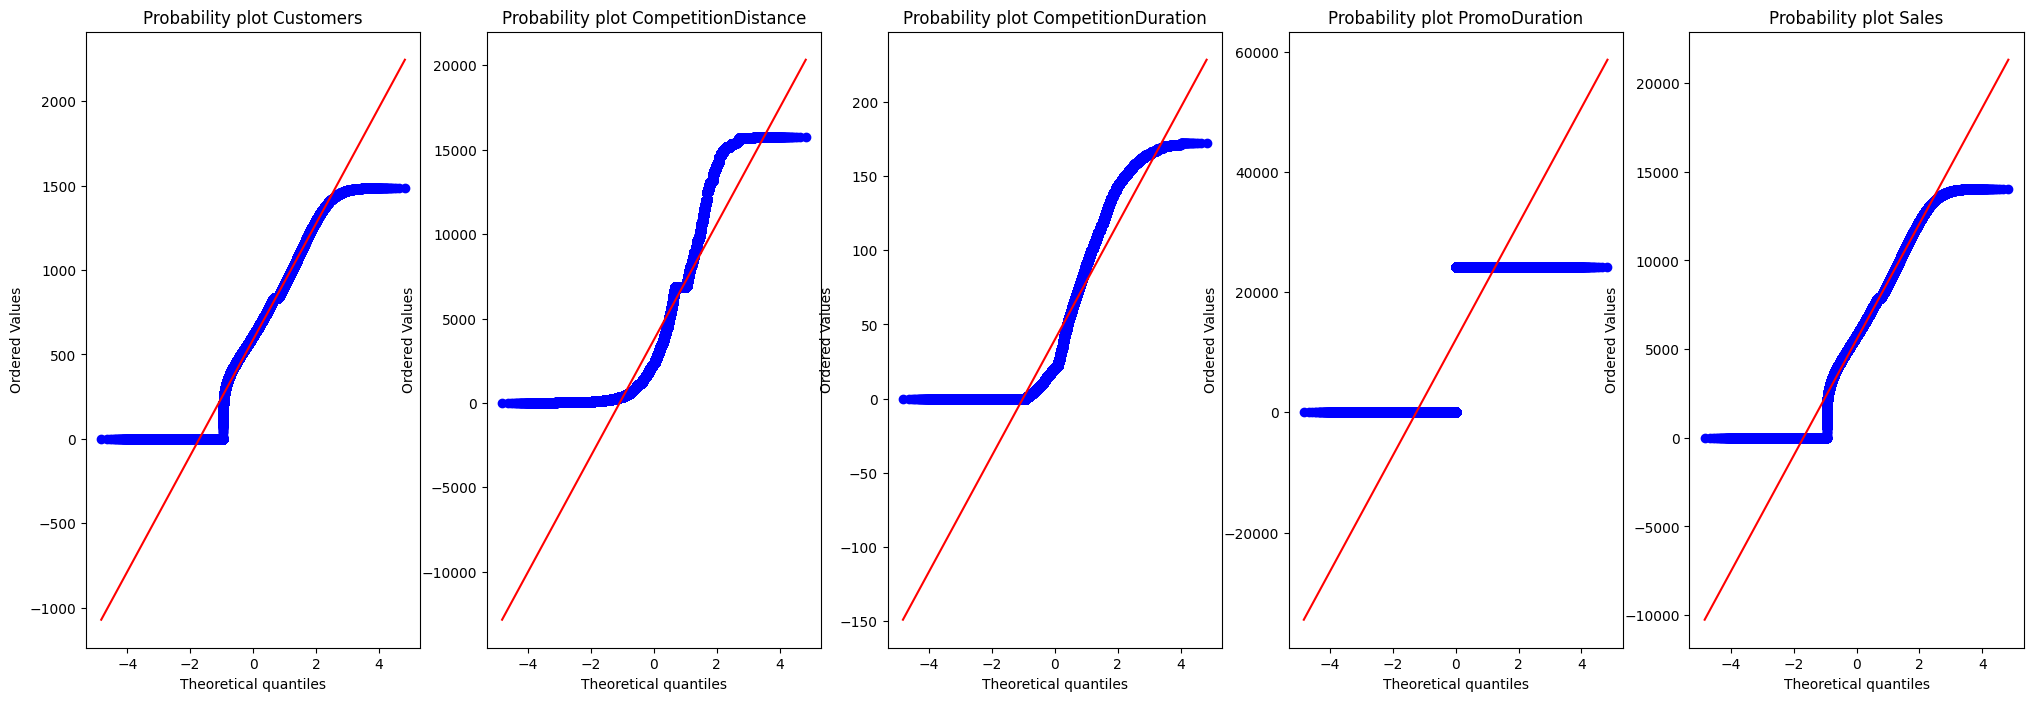

time: 14.4 s (started: 2023-06-06 15:01:28 +00:00)


In [ ]:
# Import liberary for statics
import scipy.stats as stat
import pylab
# Q-Q ploting before transforming
plt.figure(figsize= (25,8))
for index,column in enumerate(continuous_features):
  plt.subplot(1,5,index+1)
  stat.probplot(final_dataset[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability plot {column}')
plt.show()

In [ ]:
# Copy the final dataset into test dataset
test_dataset1 = final_dataset.copy()
test_dataset2 = final_dataset.copy()
test_dataset3 = final_dataset.copy()
test_dataset4 = final_dataset.copy()
test_dataset5 = final_dataset.copy()

time: 383 ms (started: 2023-06-06 17:37:06 +00:00)


#### 1.Logrithmic Transform

In [ ]:
# Transform Your data on the above continuous features
test_dataset1['Sales'] = np.log(test_dataset1['Sales'] + 1)
test_dataset1['CompetitionDuration'] = np.log(test_dataset1['CompetitionDuration'] + 1)
test_dataset1['PromoDuration'] = np.log(test_dataset1['PromoDuration'] + 1)
test_dataset1['Customers'] = np.log(test_dataset1['Customers'] + 1)
test_dataset1['CompetitionDistance'] = np.log(test_dataset1['CompetitionDistance'] + 1)

time: 87 ms (started: 2023-06-06 16:26:28 +00:00)


<ipython-input-197-e07411ddab10>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset1[column])
<ipython-input-197-e07411ddab10>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset1[column])
<ipython-input-197-e07411ddab10>:5: UserWarning: 

`distplot` is a deprecated function

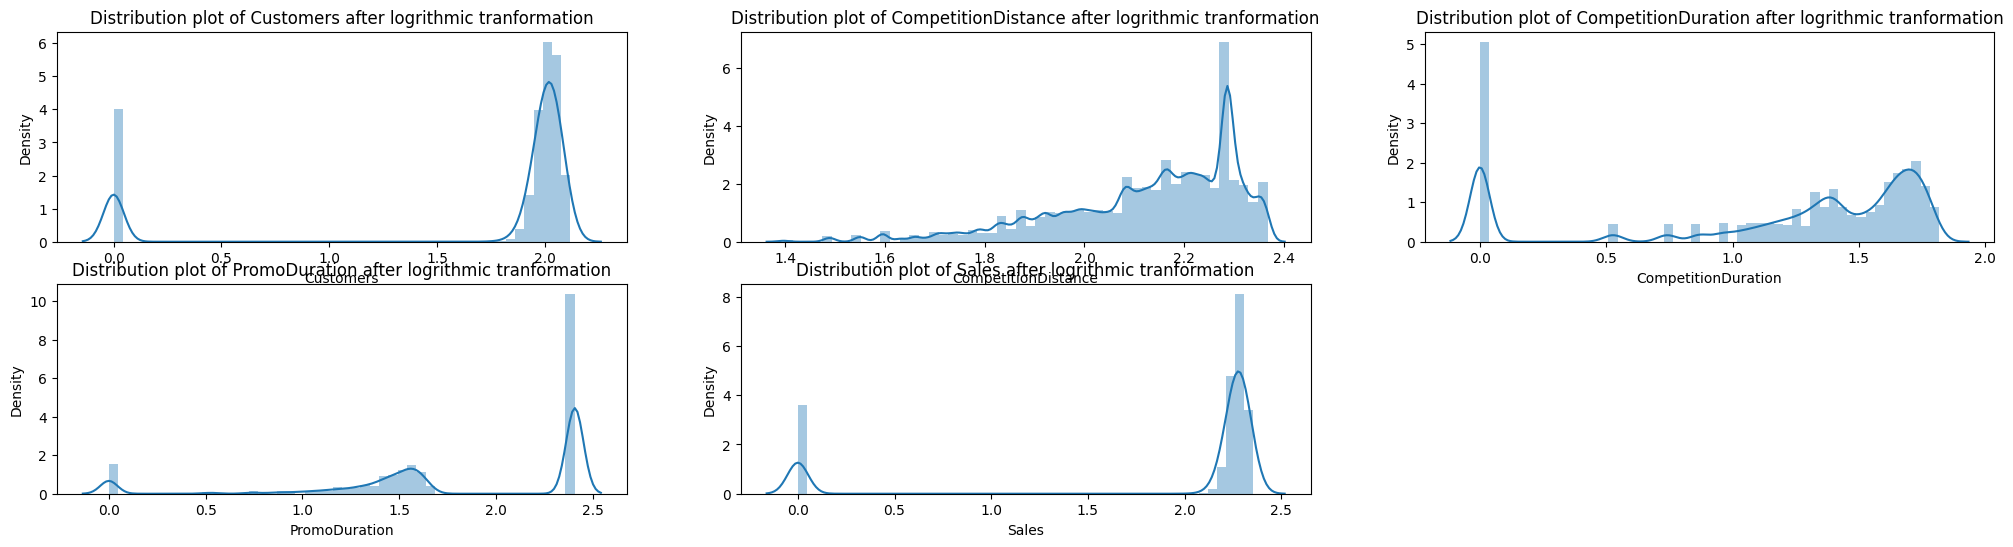

time: 43.6 s (started: 2023-06-06 16:27:04 +00:00)


In [ ]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  sns.distplot(test_dataset1[column])
  plt.title(f'Distribution plot of {column} after logrithmic tranformation')

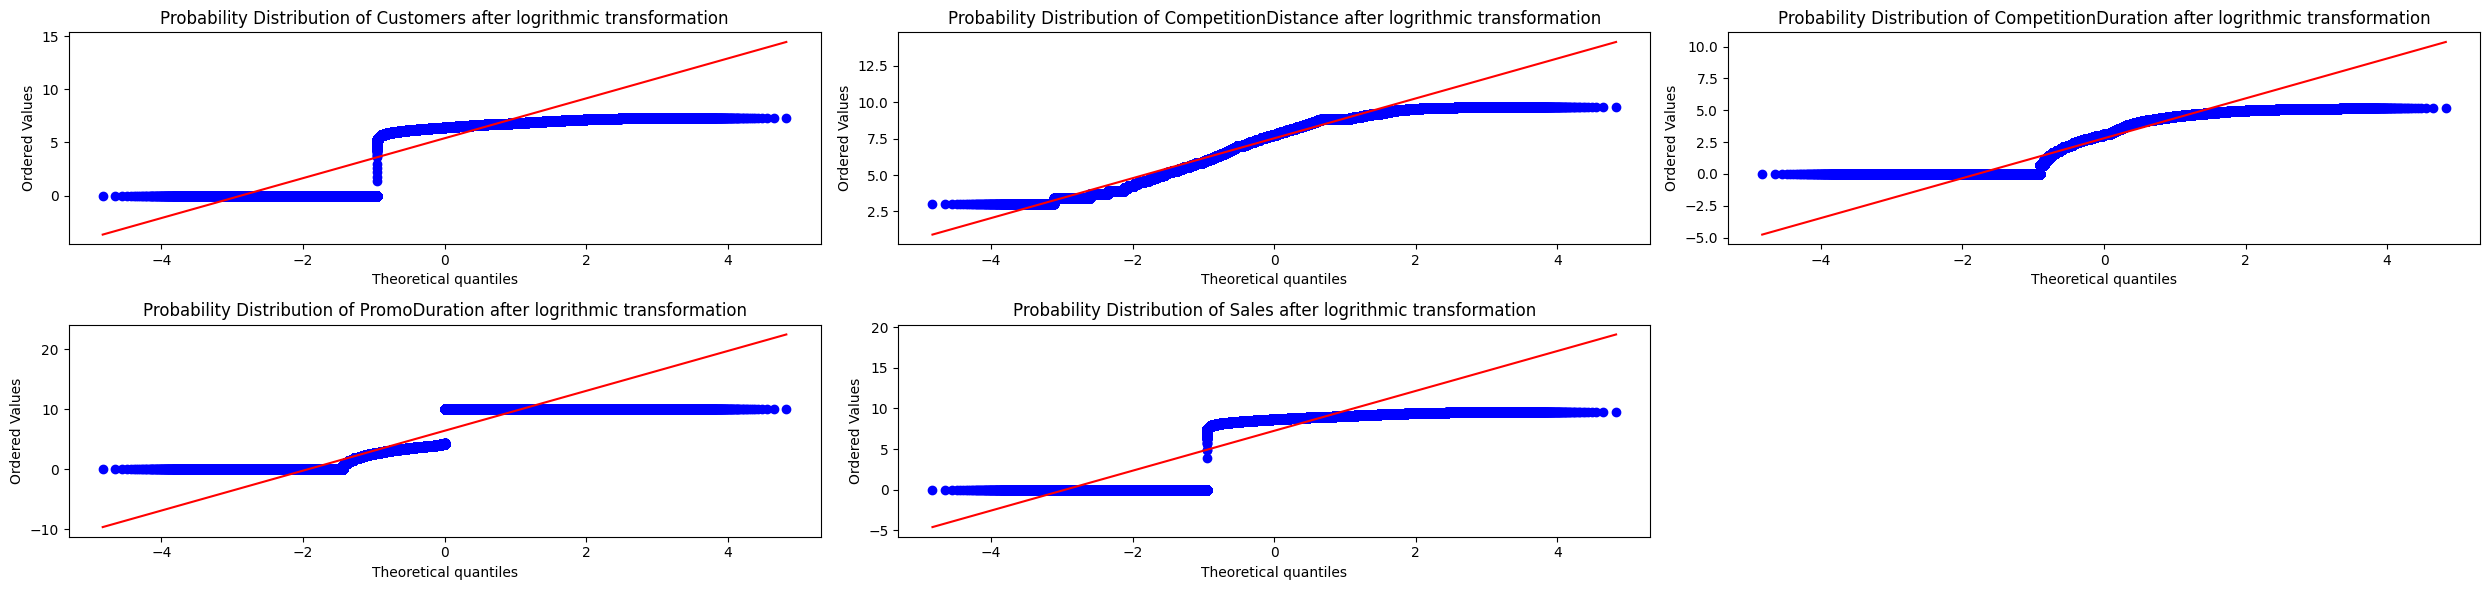

time: 26.3 s (started: 2023-06-06 16:24:11 +00:00)


In [ ]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  stat.probplot(test_dataset1[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after logrithmic transformation')
  plt.tight_layout()

#### 2.Exponent Transformation

In [ ]:
# Transform Your data on the above continuous features
test_dataset2['Sales'] = (test_dataset2['Sales'] +1)**(test_dataset2['Sales'] +1)
test_dataset2['CompetitionDuration'] = (test_dataset2['CompetitionDuration']+1)**(test_dataset2['CompetitionDuration']+1)
test_dataset2['PromoDuration'] = (test_dataset2['PromoDuration']+1)**(test_dataset2['PromoDuration']+1)
test_dataset2['Customers'] = (test_dataset2['Customers']+1)**(test_dataset2['Customers']+1)
test_dataset2['CompetitionDistance'] = (test_dataset2['CompetitionDistance']+1)**(test_dataset2['CompetitionDistance']+1)

time: 318 ms (started: 2023-06-06 17:33:47 +00:00)


<ipython-input-255-c3a8437aab5e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset2[column])
<ipython-input-255-c3a8437aab5e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset2[column])
<ipython-input-255-c3a8437aab5e>:5: UserWarning: 

`distplot` is a deprecated function

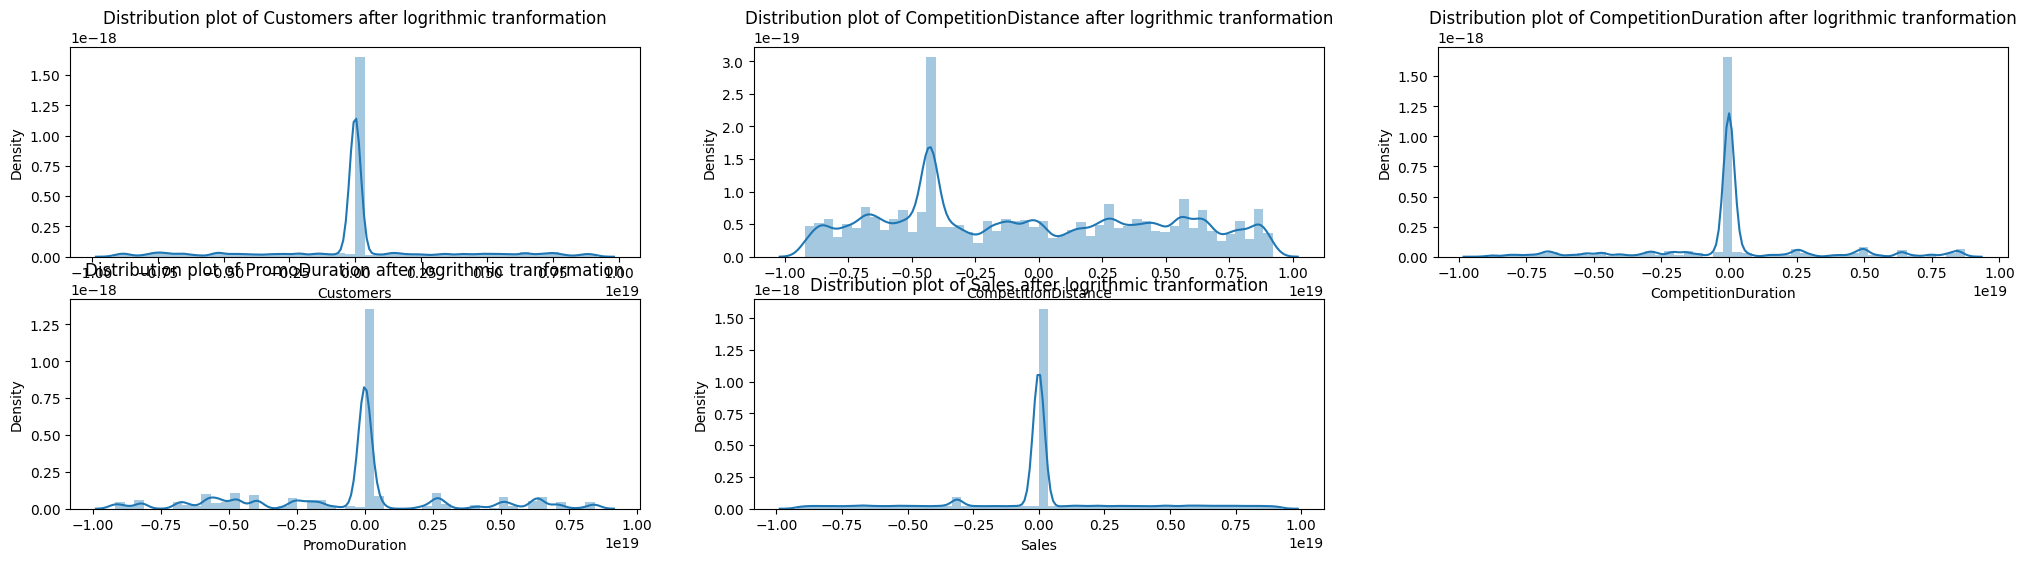

time: 28.7 s (started: 2023-06-06 17:33:49 +00:00)


In [ ]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  sns.distplot(test_dataset2[column])
  plt.title(f'Distribution plot of {column} after logrithmic tranformation')

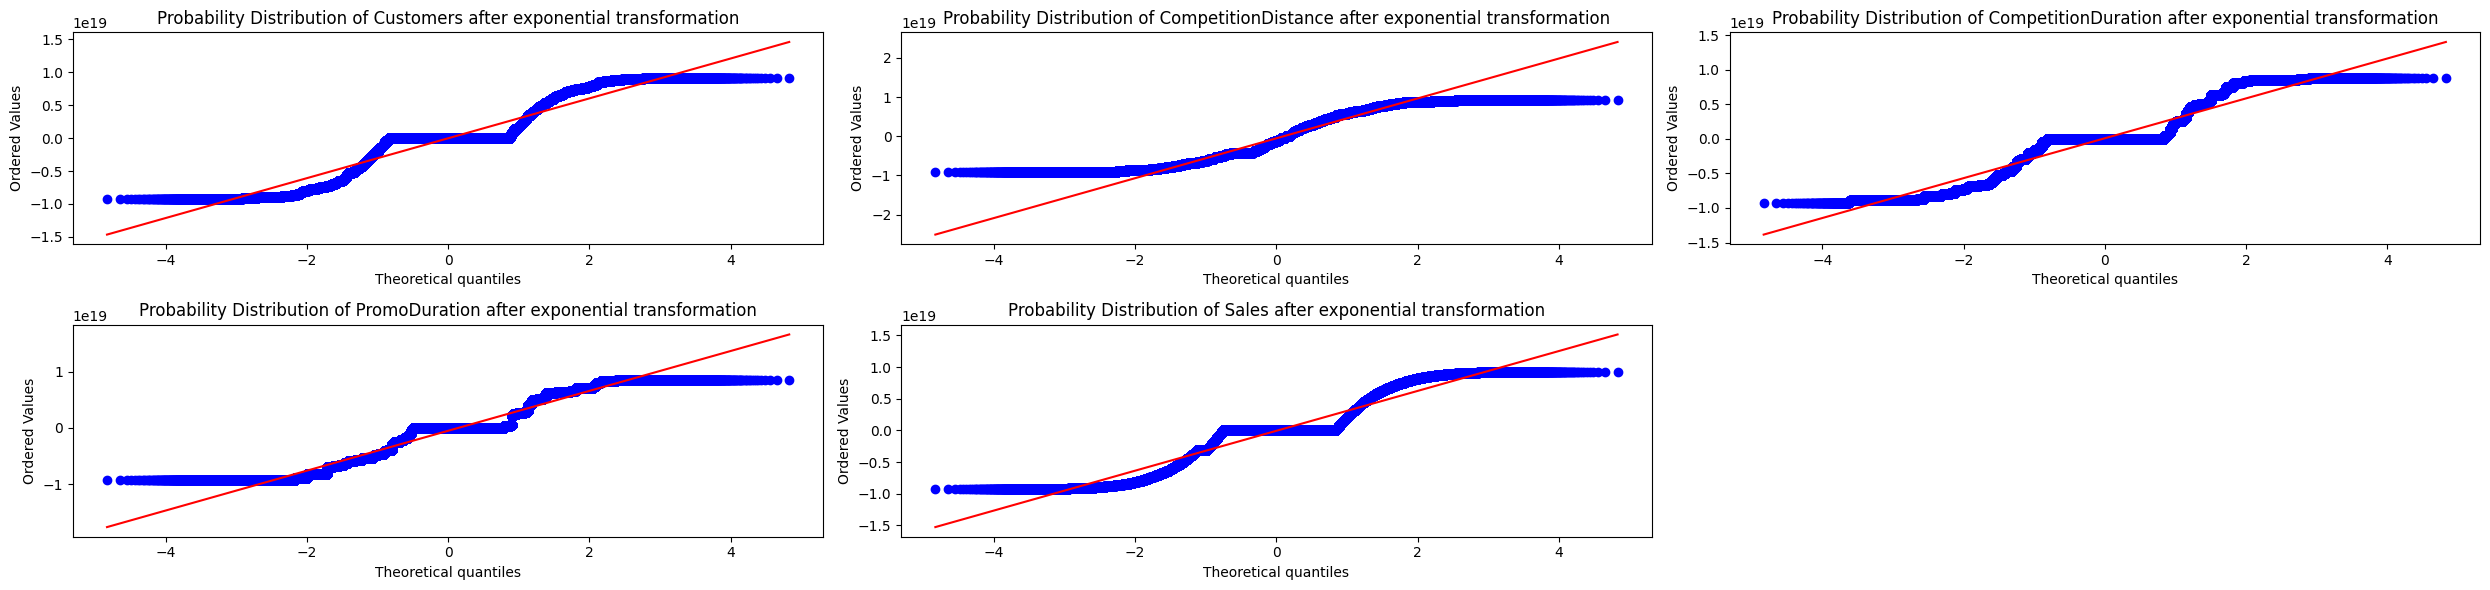

time: 26.2 s (started: 2023-06-06 17:34:17 +00:00)


In [ ]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  stat.probplot(test_dataset2[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after exponential transformation')
  plt.tight_layout()

#### 3. Square Root Transformation

In [ ]:
# Transform Your data on the above continuous features
test_dataset3['Sales'] = (test_dataset3['Sales'])** 0.5
test_dataset3['CompetitionDuration'] = (test_dataset3['CompetitionDuration'])**0.5
test_dataset3['PromoDuration'] = (test_dataset3['PromoDuration'])**0.5
test_dataset3['Customers'] = (test_dataset3['Customers'] + 1)**0.5
test_dataset3['CompetitionDistance'] = (test_dataset3['CompetitionDistance'])**0.5

time: 346 ms (started: 2023-06-06 17:34:44 +00:00)


<ipython-input-258-ac52b6b22d71>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset3[column])
<ipython-input-258-ac52b6b22d71>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset3[column])
<ipython-input-258-ac52b6b22d71>:5: UserWarning: 

`distplot` is a deprecated function

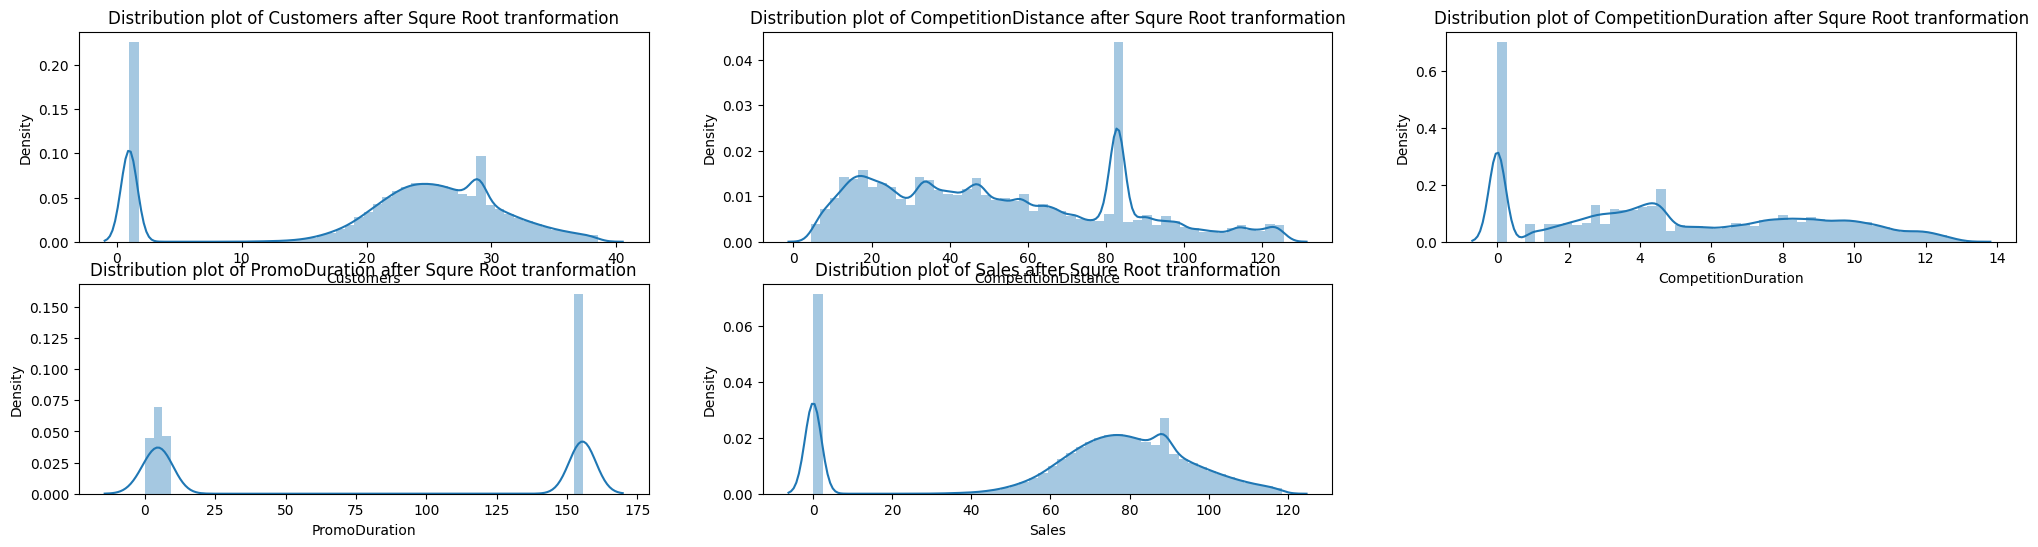

time: 23.9 s (started: 2023-06-06 17:34:44 +00:00)


In [ ]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  sns.distplot(test_dataset3[column])
  plt.title(f'Distribution plot of {column} after Squre Root tranformation')

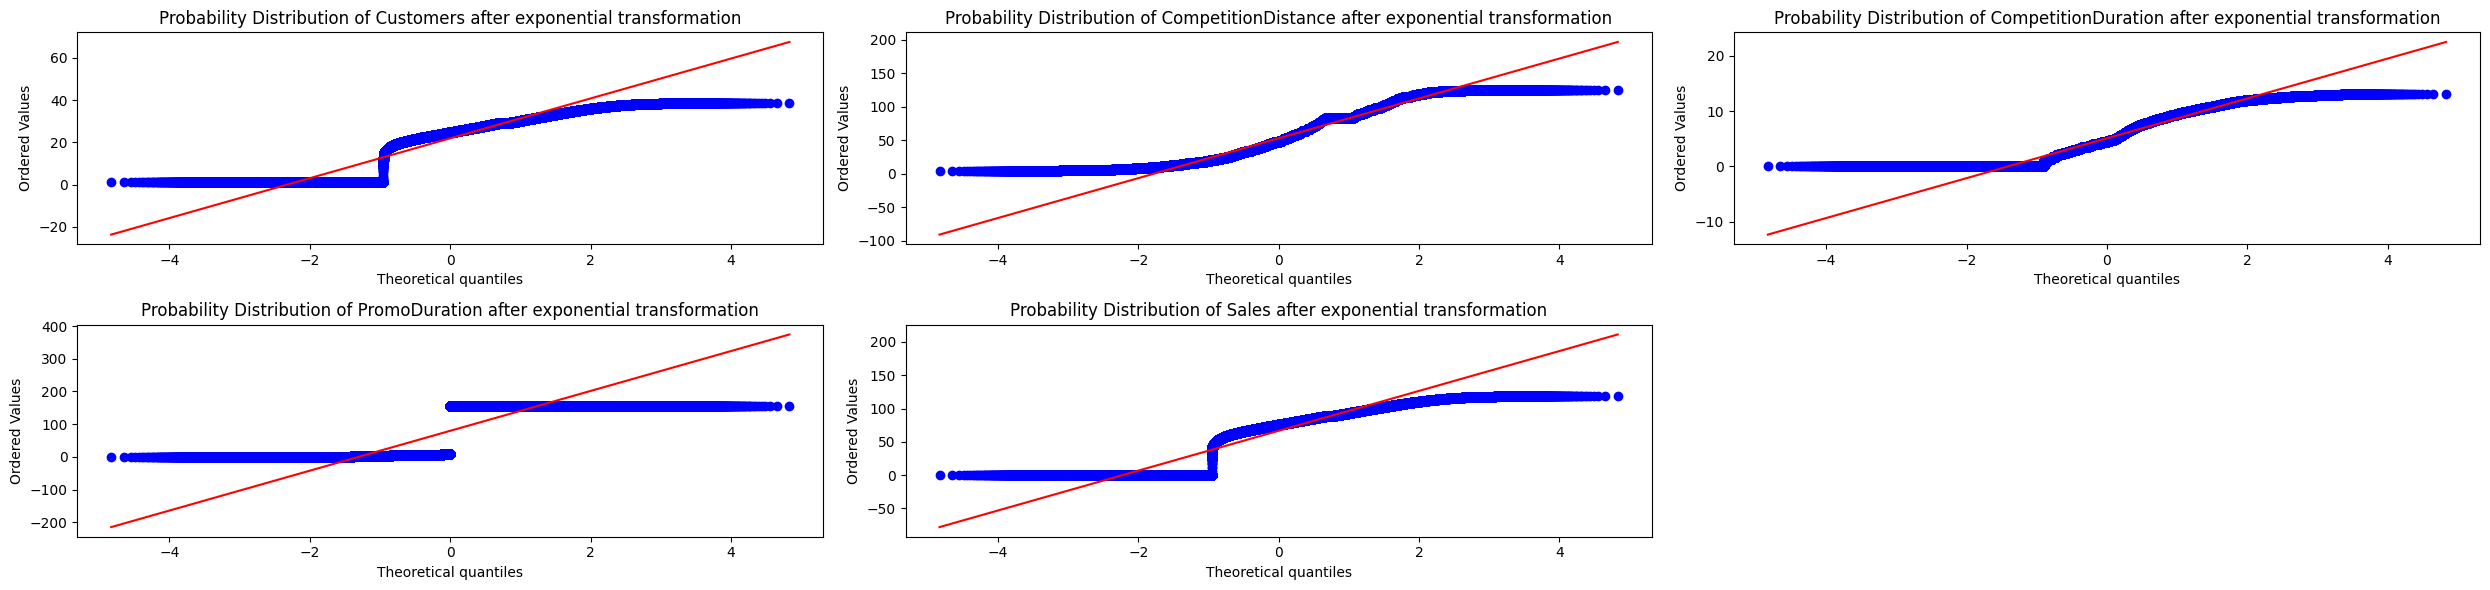

time: 26.4 s (started: 2023-06-06 17:35:08 +00:00)


In [ ]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  stat.probplot(test_dataset3[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after exponential transformation')
  plt.tight_layout()

#### 4.Reciprocal Transformation

In [ ]:
# Transform Your data on the above continuous features
test_dataset4['Sales'] =1/(test_dataset4['Sales'] +1)
test_dataset4['CompetitionDuration'] = 1/(test_dataset4['CompetitionDuration']+1)
test_dataset4['PromoDuration'] = 1/(test_dataset4['PromoDuration']+1)
test_dataset4['Customers'] = 1/(test_dataset4['Customers'] + 1)
test_dataset4['CompetitionDistance'] = 1/(test_dataset4['CompetitionDistance']+1)

time: 302 ms (started: 2023-06-06 17:35:34 +00:00)


<ipython-input-261-59c080b4ee1d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset4[column])
<ipython-input-261-59c080b4ee1d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset4[column])
<ipython-input-261-59c080b4ee1d>:5: UserWarning: 

`distplot` is a deprecated function

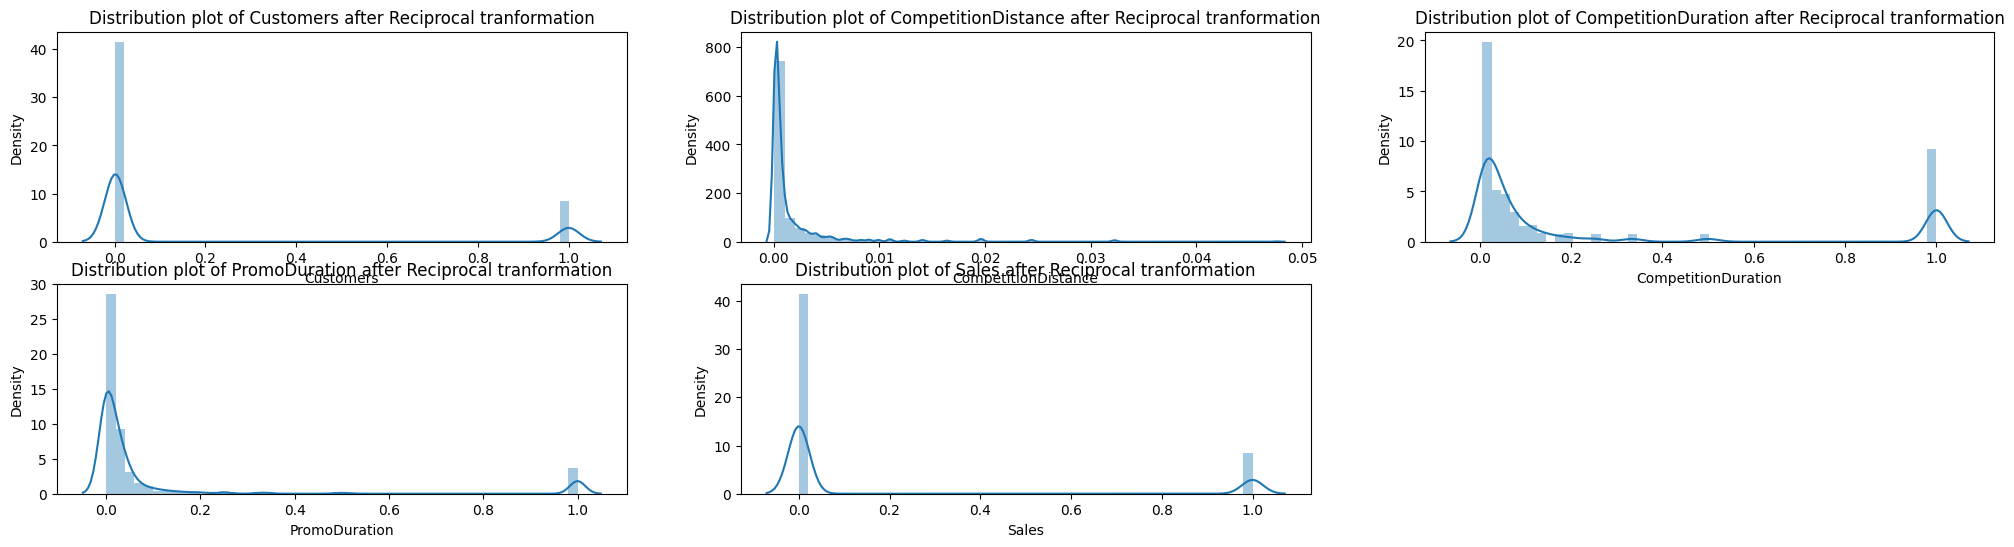

time: 27 s (started: 2023-06-06 17:35:35 +00:00)


In [ ]:
1 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize= (25,6))
for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  sns.distplot(test_dataset4[column])
  plt.title(f'Distribution plot of {column} after Reciprocal tranformation')

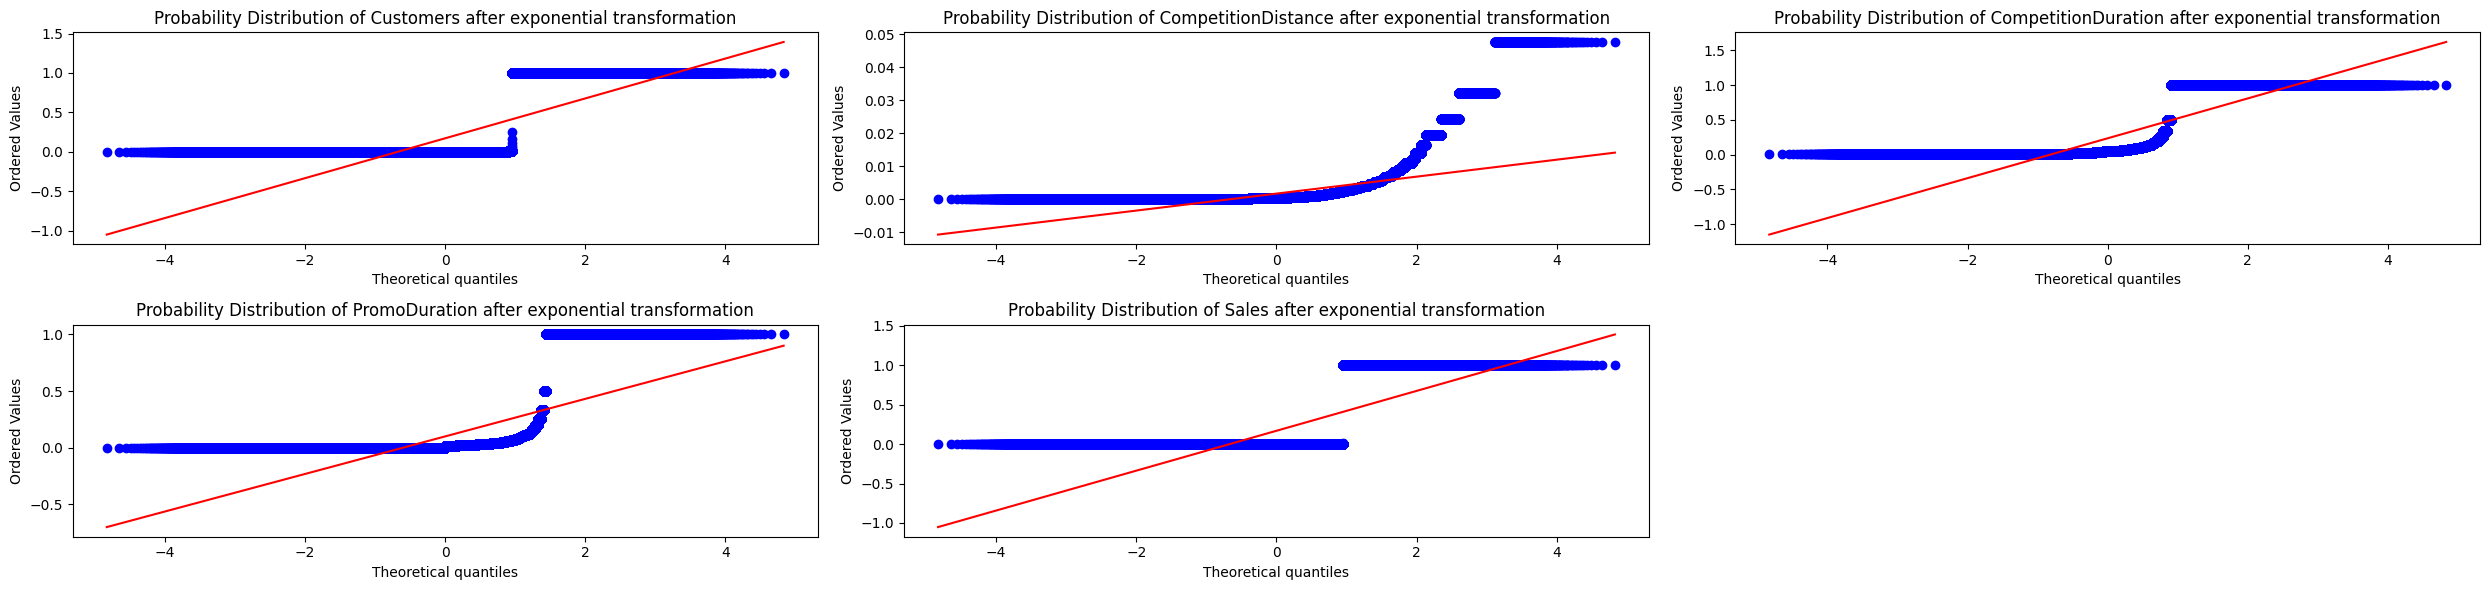

time: 26.3 s (started: 2023-06-06 17:36:02 +00:00)


In [ ]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  stat.probplot(test_dataset4[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after exponential transformation')
  plt.tight_layout()

#### 5. Box-cox Transformation

In [ ]:
test_dataset5['Sales'] = (test_dataset5['Sales']*(10 **test_dataset5['Sales'])-1)/(test_dataset5['Sales']+1)
test_dataset5['Customers'] = (test_dataset5['Customers']*(10 **test_dataset5['Customers'])-1)/(test_dataset5['Customers']+1)
test_dataset5['CompetitionDistance'] = (test_dataset5['CompetitionDistance']*(10 **test_dataset5['CompetitionDistance'])-1)/(test_dataset5['CompetitionDistance']+2)
test_dataset5['CompetitionDuration'] = (test_dataset5['CompetitionDuration']*(10 **test_dataset5['CompetitionDuration'])-1)/(test_dataset5['CompetitionDuration']+2)
test_dataset5['PromoDuration'] = (test_dataset5['PromoDuration']*(10 **test_dataset5['PromoDuration'])-1)/(test_dataset5['PromoDuration']+1)

time: 485 ms (started: 2023-06-06 17:37:21 +00:00)


<ipython-input-268-e2ebc3a99209>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset5[column])
<ipython-input-268-e2ebc3a99209>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_dataset5[column])
<ipython-input-268-e2ebc3a99209>:5: UserWarning: 

`distplot` is a deprecated function

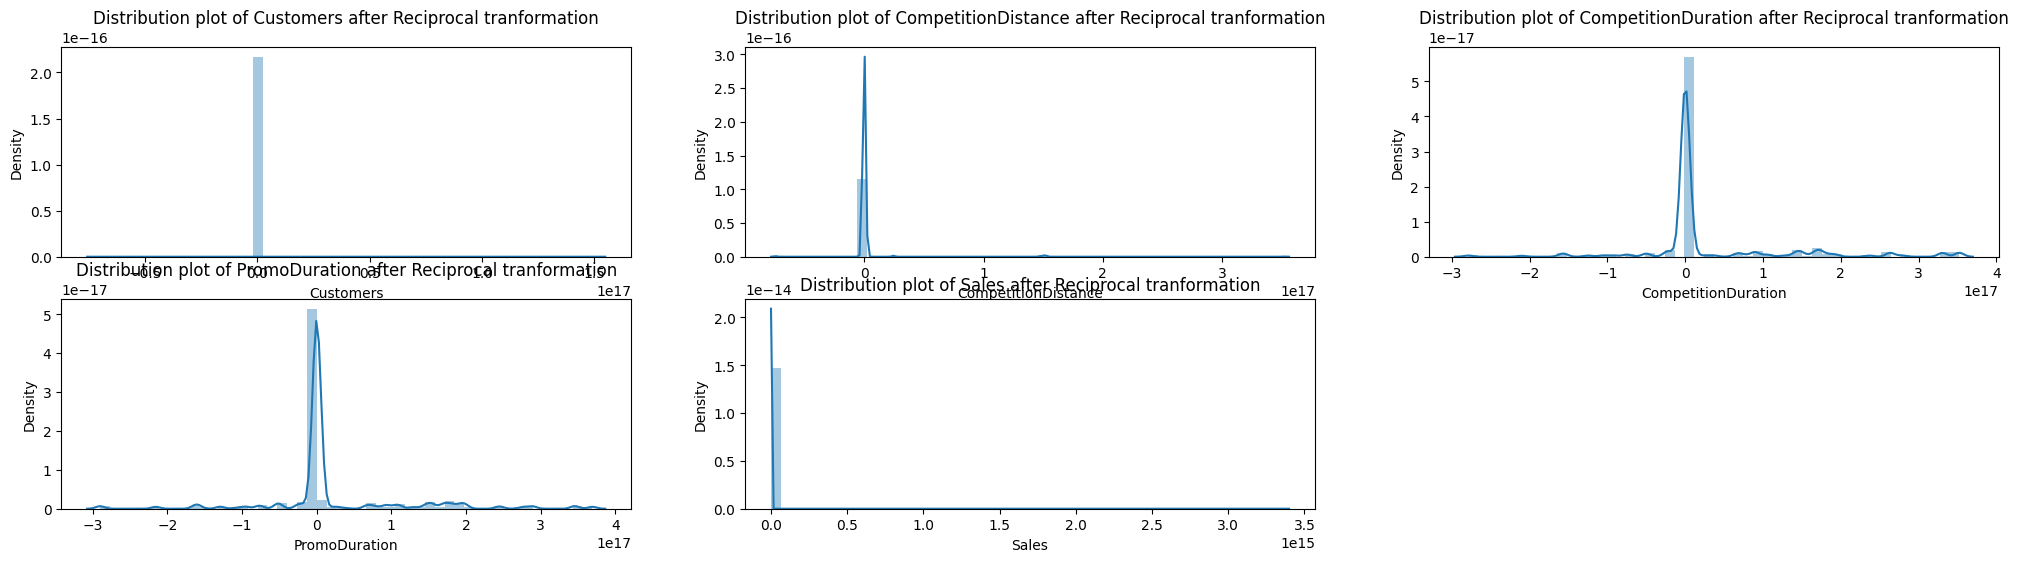

time: 26.9 s (started: 2023-06-06 17:37:24 +00:00)


In [ ]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  sns.distplot(test_dataset5[column])
  plt.title(f'Distribution plot of {column} after Reciprocal tranformation')

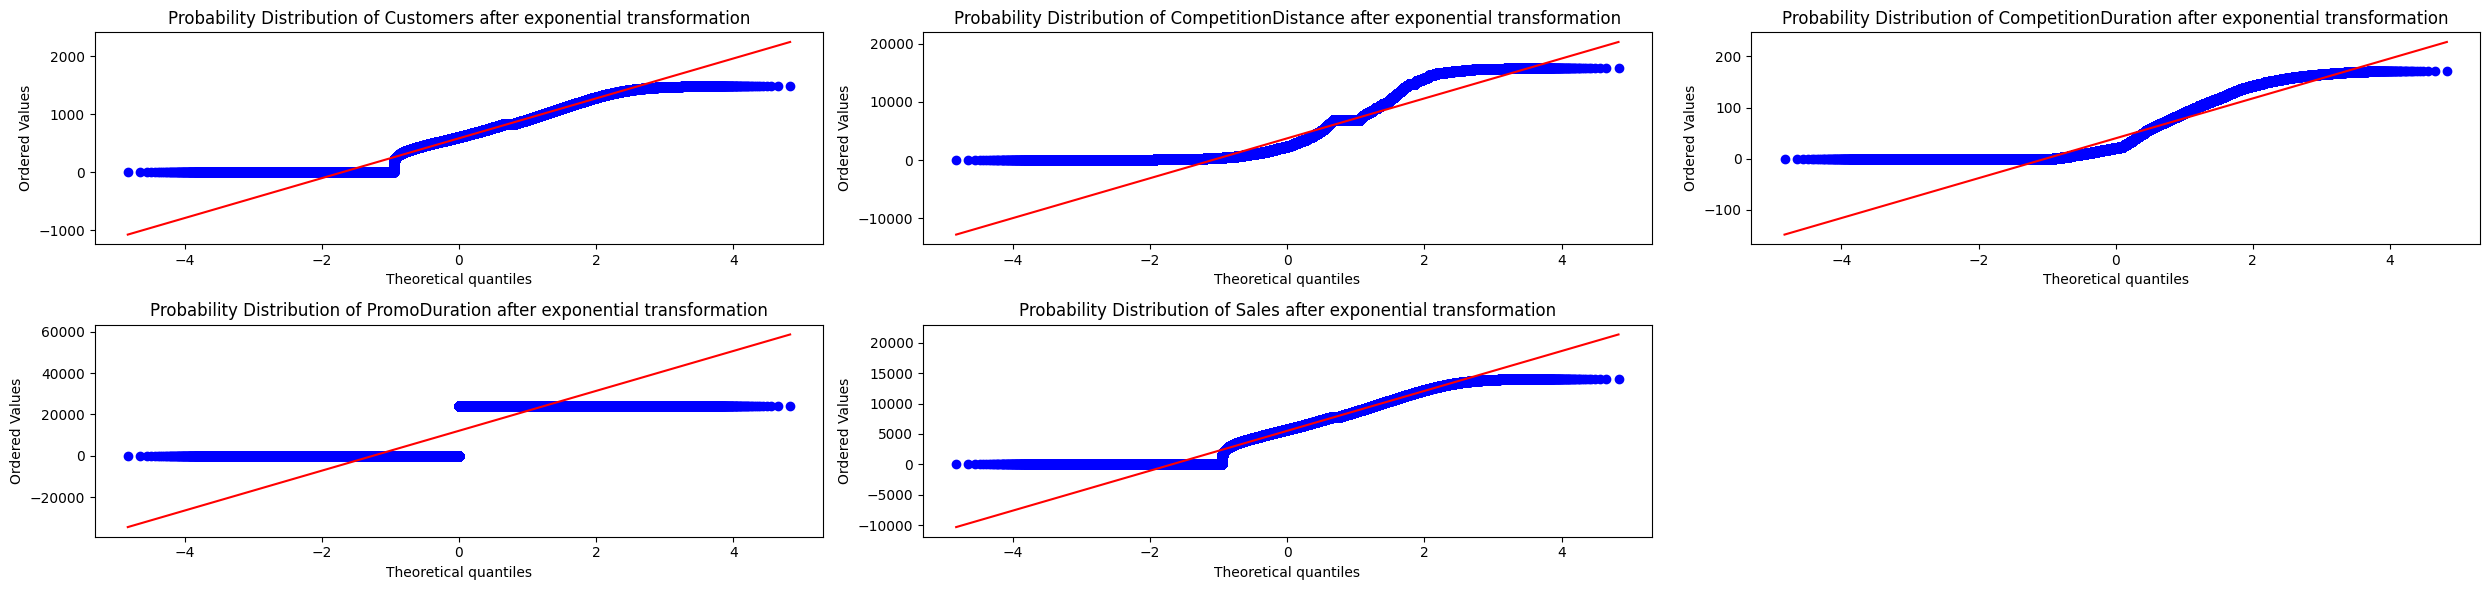

time: 26.9 s (started: 2023-06-06 17:37:59 +00:00)


In [ ]:
# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize= (25,6))
for index,column in enumerate(continuous_features):
  plt.subplot(2,3,index+1)
  stat.probplot(test_dataset4[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after exponential transformation')
  plt.tight_layout()

### 6. Data Scaling

Split the final dataset into independent variables and dependent variables or target variablea

In [ ]:
# Independent variables
independent_variables = list(set(final_dataset.columns) - {'Sales'})
independent_variables

['PromoInterval_Feb,May,Aug,Nov',
 'Promo',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'PromoDuration',
 'StoreType_d',
 'StoreType_b',
 'Assortment_c',
 'CompetitionDistance',
 'StoreType_c',
 'Promo2',
 'StateHoliday',
 'CompetitionDuration',
 'Customers',
 'DayOfWeek',
 'SchoolHoliday',
 'Day']

time: 4.21 ms (started: 2023-06-06 17:55:34 +00:00)


In [ ]:
# Dependent variables
dependent_variables = ['Sales']
dependent_variables

['Sales']

time: 11.4 ms (started: 2023-06-06 17:56:15 +00:00)


In [ ]:
# Independent variable Dataset
x = final_dataset[independent_variables]

time: 69 ms (started: 2023-06-06 17:58:51 +00:00)


In [ ]:
# Shape of the independent dataset
x.shape

(1017209, 16)

time: 4.36 ms (started: 2023-06-06 17:59:45 +00:00)


In [ ]:
# Independent variables
y = final_dataset[independent_variables]

time: 56.6 ms (started: 2023-06-06 18:00:55 +00:00)


In [ ]:
# Shape of the independent variable dataset
y.shape

(1017209, 16)

time: 5.56 ms (started: 2023-06-06 18:01:38 +00:00)


In [ ]:
# Scaling your data
# Import Scaling liberary
from sklearn.preprocessing import StandardScaler

time: 528 µs (started: 2023-06-06 18:03:54 +00:00)


In [ ]:
scaler = StandardScaler()

time: 691 µs (started: 2023-06-06 18:06:09 +00:00)


In [ ]:
# fit and transform
x = scaler.fit_transform(x)

time: 618 ms (started: 2023-06-06 18:07:29 +00:00)


In [ ]:
x.shape

(1017209, 16)

time: 5.63 ms (started: 2023-06-06 18:08:02 +00:00)


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Import the train test split liberary
from sklearn.model_selection import train_test_split

time: 676 µs (started: 2023-06-06 18:14:44 +00:00)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20, random_state= 0)

time: 907 ms (started: 2023-06-06 18:16:13 +00:00)


In [ ]:
# Shape of the train and test dataset
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((813767, 16), (203442, 16), (813767, 16), (203442, 16))

time: 13.9 ms (started: 2023-06-06 18:17:31 +00:00)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***